# 1. Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import missingno as msno

import regex as re
import eda_helper_functions

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [3]:
df = pd.read_csv('mg_cleaned_dataset.csv')


In [4]:
df.head()

id  \
0  cardid69429251   
1  cardid69427147   
2  cardid71764335   
3  cardid71631505   
4  cardid72558997   

                                                                                                                                            url  \
0      https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   
1   https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437   
2     https://www.magicbricks.com/propertydetails/2-bhk-623-sq-ft-multistorey-apartment-for-sale-dahisar-east-in-mumbai&id=4d423731373634333335   
3  https://www.magicbricks.com/propertydetails/2-bhk-702-sq-ft-multistorey-apartment-for-sale-jogeshwari-east-in-mumbai&id=4d423731363331353035   
4          https://www.magicbricks.com/propertydetails/1-bhk-608-sq-ft-multistorey-apartment-for-sale-govandi-in-mumbai&id=4d423732353538393937   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   
1                    https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg   
2                 https://img.staticmb.com/mbimages/project/photo_h310_w462/2021/11/30/project-photo-4-northern-hills-mumbai-5233377_600_800_310_462.jpg   
3             https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/02/29/project-photo-13-avant-heritage-v-mumbai-5419271_899_1600_310_462.jpg   
4                      https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/05/10/project-photo-5-centrionx-mumbai-5420523_533_800_310_462.jpg   

                                                                        name  \
0  2 bhk flat  for sale in  tenx habitat raymond realty, pokhran road, thane   
1  3 bhk flat  for sale in  paradise sai world empire, kharghar, navi mumbai   
2              2 bhk flat  for sale in  northern hills, dahisar east, mumbai   
3         2 bhk flat  for sale in  avant heritage v, jogeshwari east, mumbai   
4                        1 bhk flat  for sale in  centrionx, govandi, mumbai   

                                                    address  \
0                          pokhran road, thane, maharashtra   
1  kharghar, navi mumbai - central navi mumbai, maharashtra   
2        dahisar east, mumbai - western mumbai, maharashtra   
3     jogeshwari east, mumbai - western mumbai, maharashtra   
4               govandi, mumbai - harbour line, maharashtra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
df.shape

(11894, 49)

### observation 
- dataset consists of 11902 rows and 48 columns

In [6]:
#Columns in our dataset
df.columns

Index(['id', 'url', 'image', 'name', 'address', 'image_urls',
       'available_units', 'towers', 'locality_rank', 'locality_rating',
       'construction', 'overlooking', 'ownership', 'extra_rooms', 'bath',
       'parking', 'builder', 'project_name', 'furnish', 'price', 'area',
       'costpersqft', 'property_type', 'status', 'lift', 'flat_on_floor',
       'total_floor', 'balcony', 'facing', 'bed', 'lattitude', 'longitude',
       'seller', 'addressregion', 'price_category', 'amenities_cluster',
       'assigned_amenities_score', 'education', 'transport', 'shopping_centre',
       'commercial_hub', 'hospital', 'tourist', 'emi', 'project_in_acres',
       'flooring_cluster', 'assigned_flooring_score', 'place',
       'extracted_location'],
      dtype='object')

In [7]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

count          mean           std         min  \
available_units            6676.0    465.475584   1085.788012    6.000000   
towers                     6868.0      4.624199      6.940877    1.000000   
locality_rank              8063.0    122.406424    126.565803    1.000000   
locality_rating           11430.0      3.759361      1.067680    0.000000   
bath                      11864.0      2.315324      0.963525    1.000000   
parking                    5662.0      1.392088      0.722071    1.000000   
price                     11894.0      2.908627      4.238493    0.017000   
area                      11889.0    879.286231    697.556563    3.000000   
costpersqft               11888.0  28269.241813  51408.883998  147.000000   
lift                       6455.0      3.116809      1.714334    1.000000   
flat_on_floor              9602.0     10.870027     10.134959   -2.000000   
total_floor                9835.0     22.181495     16.214268    1.000000   
balcony                    6074.0      1.847218      1.049587    1.000000   
bed                       11894.0      2.162351      0.981263    1.000000   
lattitude                 11431.0     19.153594      0.735072    9.209138   
longitude                 11431.0     72.896409      0.715783   19.024462   
amenities_cluster         11894.0      1.472928      1.176109    0.000000   
assigned_amenities_score   6793.0    145.883115    100.515463    5.000000   
emi                       11892.0      1.312083      1.911849    0.007450   
project_in_acres           6144.0     27.368613    728.786747    0.000000   
flooring_cluster          11894.0      2.002606      1.027533    0.000000   
assigned_flooring_score    7448.0     12.932599     10.363827    4.000000   

                                   25%           50%           75%  \
available_units             120.000000    282.000000    550.000000   
towers                        1.000000      3.000000      5.000000   
locality_rank                16.000000     92.000000    186.000000   
locality_rating               3.900000      4.000000      4.200000   
bath                          2.000000      2.000000      3.000000   
parking                       1.000000      1.000000      2.000000   
price                         0.950000      1.780000      3.200000   
area                        540.000000    730.000000   1035.000000   
costpersqft               16909.250000  25581.000000  34286.000000   
lift                          2.000000      3.000000      4.000000   
flat_on_floor                 4.000000      8.000000     15.000000   
total_floor                   8.000000     19.000000     30.000000   
balcony                       1.000000      1.000000      3.000000   
bed                           1.000000      2.000000      3.000000   
lattitude                    19.062055     19.143882     19.210299   
longitude                    72.839809     72.872695     72.963374   
amenities_cluster             1.000000      1.000000      3.000000   
assigned_amenities_score     70.000000    113.000000    207.000000   
emi                           0.430000      0.800000      1.440000   
project_in_acres              1.000000      3.000000      8.499900   
flooring_cluster              1.000000      2.000000      3.000000   
assigned_flooring_score       7.000000      7.000000     16.000000   

                                   max  
available_units           4.000000e+04  
towers                    2.000000e+02  
locality_rank             8.390000e+02  
locality_rating           5.000000e+00  
bath                      1.000000e+01  
parking                   1.200000e+01  
price                     8.000000e+01  
area                      4.085200e+04  
costpersqft               5.333333e+06  
lift                      1.000000e+01  
flat_on_floor             7.500000e+01  
total_floor               9.200000e+01  
balcony                   8.000000e+00  
bed                       1.000000e+01  
lattitude                 7.28

In [8]:
df.skew(numeric_only=True)

available_units             25.469442
towers                       8.476354
locality_rank                1.399060
locality_rating             -3.030003
bath                         1.530905
parking                      3.085163
price                        6.195670
area                        18.541985
costpersqft                 92.538870
lift                         1.533098
flat_on_floor                1.861369
total_floor                  1.116462
balcony                      1.270163
bed                          0.998004
lattitude                   67.711361
longitude                  -73.892059
amenities_cluster            0.605688
assigned_amenities_score     1.012819
emi                          6.194895
project_in_acres            70.849690
flooring_cluster            -0.021486
assigned_flooring_score      2.294472
dtype: float64

In [9]:
#Let's look at the skewness of our dataset
df.skew(numeric_only=True)[df.skew(numeric_only=True) < -1].index

Index(['locality_rating', 'longitude'], dtype='object')


- Highly right-skewed (positively skewed): 'available_units', 'towers', 'parking', 'price', 'area', 'costpersqft', 'lattitude', 'emi', 'project_in_acres', 'assigned_flooring_score'
- Highly left-skewed (negatively skewed): 'locality_rating', 'longitude''

In [10]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11894 non-null  object 
 1   url                       11894 non-null  object 
 2   image                     11006 non-null  object 
 3   name                      11894 non-null  object 
 4   address                   11894 non-null  object 
 5   image_urls                7645 non-null   object 
 6   available_units           6676 non-null   float64
 7   towers                    6868 non-null   float64
 8   locality_rank             8063 non-null   float64
 9   locality_rating           11430 non-null  float64
 10  construction              10838 non-null  object 
 11  overlooking               7932 non-null   object 
 12  ownership                 8290 non-null   object 
 13  extra_rooms               6598 non-null   object 
 14  bath  

In [11]:
len(df.select_dtypes(include='object').columns)

27

### observation
- Our dataset features consists of three datatypes
  - float
  - integer
  - object
- Of which total numerical features are 21
- And categorical features are 27.
- some features datatype is incorrect, data type should be 'object' for this features : amenities_cluster , flooring_cluster

In [12]:
# change feature datatypes as object : amenities_cluster , flooring_cluster
df['flooring_cluster'] = df['flooring_cluster'].astype(str)
df['amenities_cluster'] = df['amenities_cluster'].astype(str)

# observation 
- all properties are 'flats'
- no missing values 

# project_name      

In [13]:
df['project_name'].value_counts()

project_name
oberoi sky city                                                   96
piramal vaikunth                                                  90
tata serein                                                       71
omkar alta monte                                                  67
rustomjee crown                                                   66
piramal mahalaxmi                                                 65
kanakia silicon valley                                            59
rustomjee la vie                                                  57
lodha amara                                                       53
dosti eastern bay                                                 51
godrej ascend                                                     50
godrej reserve                                                    49
piramal revanta                                                   46
dosti west county                                                 45
sethia pride         

In [14]:
df['project_name'].value_counts().shape

(2943,)

In [15]:
#Let's apply the cumulative sum to check how much data comes from how many project_name.
df['project_name'].value_counts(normalize = True).cumsum()

project_name
oberoi sky city                                                   0.011430
piramal vaikunth                                                  0.022145
tata serein                                                       0.030599
omkar alta monte                                                  0.038576
rustomjee crown                                                   0.046434
piramal mahalaxmi                                                 0.054173
kanakia silicon valley                                            0.061198
rustomjee la vie                                                  0.067984
lodha amara                                                       0.074295
dosti eastern bay                                                 0.080367
godrej ascend                                                     0.086320
godrej reserve                                                    0.092154
piramal revanta                                                   0.097631
dosti west c

In [16]:
df['project_name'].value_counts(normalize = True).cumsum().head(317)

project_name
oberoi sky city                                     0.011430
piramal vaikunth                                    0.022145
tata serein                                         0.030599
omkar alta monte                                    0.038576
rustomjee crown                                     0.046434
piramal mahalaxmi                                   0.054173
kanakia silicon valley                              0.061198
rustomjee la vie                                    0.067984
lodha amara                                         0.074295
dosti eastern bay                                   0.080367
godrej ascend                                       0.086320
godrej reserve                                      0.092154
piramal revanta                                     0.097631
dosti west county                                   0.102988
sethia pride                                        0.107870
lodha woods                                         0.112513
hiranandani

In [17]:
society_counts = df['project_name'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "High (50-100)": int(((society_counts >= 50) & (society_counts <= 100)).sum()),
    "Average (10-49)": int(((society_counts >= 10) & (society_counts < 50)).sum()),
    "Low (2-9)": int(((society_counts > 1) & (society_counts < 10)).sum()),
    "Very Low (1)": int((society_counts == 1).sum())
}
frequency_bins

{'High (50-100)': 11,
 'Average (10-49)': 142,
 'Low (2-9)': 1011,
 'Very Low (1)': 1779}

<Axes: xlabel='project_name'>

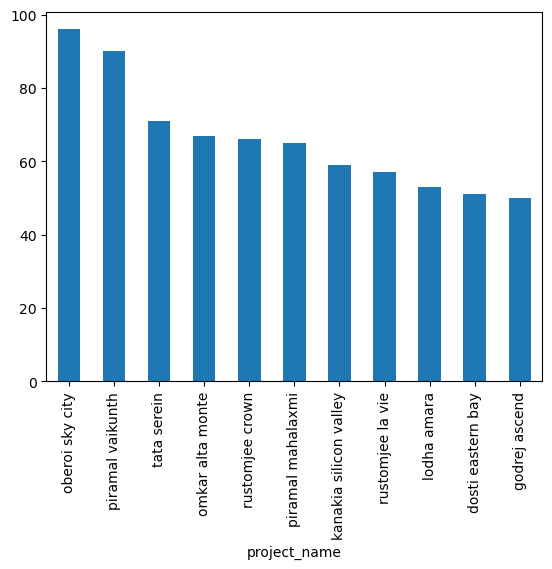

In [18]:
# top 10 socities
df['project_name'].value_counts().head(11).plot(kind='bar')

In [19]:
int(df['project_name'].isnull().sum())

3495

#### Observation
- High cardinality feature 
- total 2943 unique project_name   
- The top 317 project_names have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 2626 project_names
- while doing the train test split ensure that the train-test split maintains the same proportion of high-volume and low-volume projects to prevent bias during training and testing. i.e do statified sampling
  - High (50-100): 11 societies have between 50 to 100 listings.
  - Average (10-49): 142 societies fall in this range with 10 to 49 listings each.
  - Low (2-9): 1011 societies have between 2 to 9 listings.
  - Very Low (1): A significant number, 1779 societies, have only 1 listing.
- Total 3503 missing values 

# price

In [20]:
df['price'].isnull().sum()

0

In [21]:
df['price'].describe()

count    11894.000000
mean         2.908627
std          4.238493
min          0.017000
25%          0.950000
50%          1.780000
75%          3.200000
max         80.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

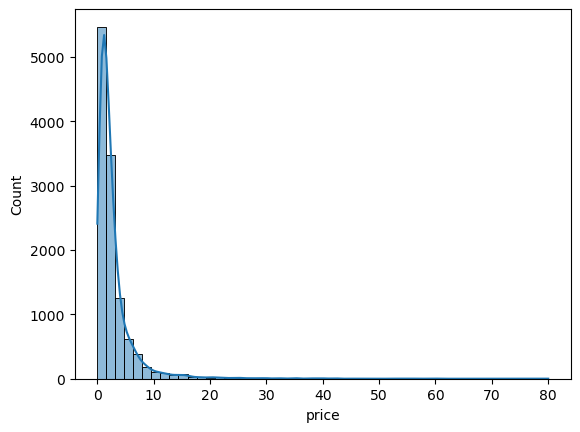

In [22]:
sns.histplot(df['price'],kde=True,bins=50)

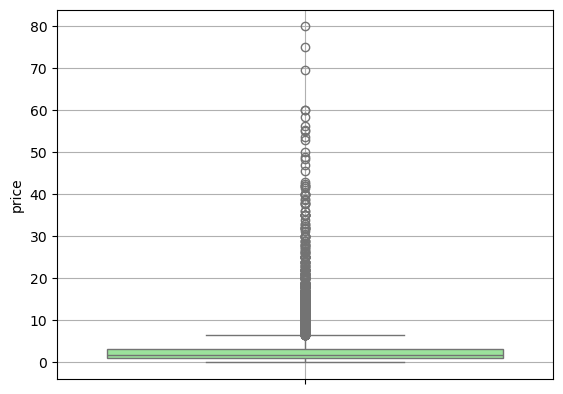

In [23]:
sns.boxplot(df['price'],color='lightgreen')
plt.grid()

### Observation on price

- Descriptive Statistics:

  - No missing values.
  - Mean Price: The average price is approximately 2.90 crores.
  - Median Price: The median (or 50th percentile) price is 1.78 crores.
  - The standard deviation is 4.24 Cr, indicating significant variation in prices.
  - Range: Prices range from a minimum of 0.01 crores to a maximum of 80 crores.
  - max price is 80 cr and 75 percentile is 3.20cr this clearly indicatie that there is outliers in the data
  - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 3.20 crores.

- Visualizations:
   - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
   - The histogram is right-skewed, indicating most prices are clustered near the lower end (closer to 0).
   - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
   - majority of prices fall within the interquartile range (approximately 0.95–3.2 Cr), with a dense cluster near the median.

#### conclusion and solution:
  - The data has a highly skewed distribution, with a few very high-priced properties influencing the mean and standard deviation.
  - The median (1.78 Cr) is much lower than the mean (2.90 Cr), which further highlights the impact of these high-price outliers.
  - Outlier detection or transformation (e.g., log transformation) may be necessary for further analysis to normalize the data or reduce skewness.

In [24]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

6.195670150214561 60.895881867187526


### Observations on Skewness and Kurtosis:

#### 1. **Skewness:**
   - The skewness value is **6.20**, which is highly positive.
   - A positive skewness indicates that the distribution is **right-skewed**:
     - Most values are concentrated on the lower end of the scale (closer to 0).
     - A few very high values (outliers) stretch the tail on the right side, as seen in the histogram and boxplot.

#### 2. **Kurtosis:**
   - The kurtosis value is **60.93**, which is extremely high.
   - High kurtosis indicates a **leptokurtic distribution**(leptokurtic = sample kurtosis -3 > 0 and in leptokurtic we have Heavy tails, sharp peak, more outliers than normal):
     - The distribution has heavy tails and a sharp peak around the mean.
     - This means there are many extreme values (outliers) compared to a normal distribution.

#### conclusion and solution  
The high skewness and kurtosis suggest that the `price` data is far from normally distributed.  
Analytical methods sensitive to non-normality may produce biased results.  
- **Potential Actions:**
- Consider **log transformation** or other scaling techniques to reduce skewness.
- Investigate the outliers for potential anomalies or domain-specific insights.
- Use non-parametric statistical methods (e.g., Mann-Whitney U, Spearman correlation) for hypothesis testing or correlations if normality cannot be assumed.

In [25]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.20
0.05     0.36
0.95     8.75
0.99    21.00
Name: price, dtype: float64

#### Quantile Analysis:

 - 1% Quantile: Only 1% of properties are priced below 0.20 crores.
 - 5% Quantile: 5% of properties are priced below 0.36 crores.
 - 95% Quantile: 95% of properties are priced below 8.75 crores.
 - 99% Quantile: 99% of properties are priced below 21 crores, indicating that very few properties are priced above this value.

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.95
Q3 (75th percentile): 3.2
IQR: 2.25


In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-2.425 6.575


In [28]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(989, 49)

In [29]:
outliers['price'].describe()

count    989.000000
mean      13.047088
std        9.007453
min        6.580000
25%        7.750000
50%        9.800000
75%       14.500000
max       80.000000
Name: price, dtype: float64

- Outliers Analysis (using IQR method):
  - Based on the IQR method, there are 989 properties considered as outliers.  
  - These outliers have an average price of approximately 13.04 crores.  
  - The range for these outliers is from 6.58 crores to 80 crores.  

<Axes: xlabel='price'>

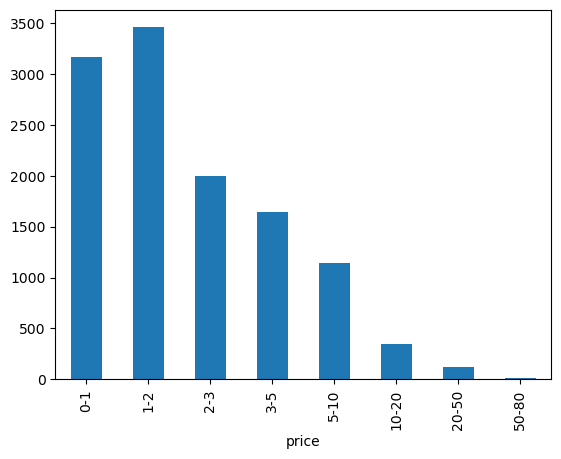

In [30]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50, 80]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50", "50-80"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2","2-3" and "3-5" crores" ranges.
- There is a noticeable decrease in the number of properties priced above 5 crores.

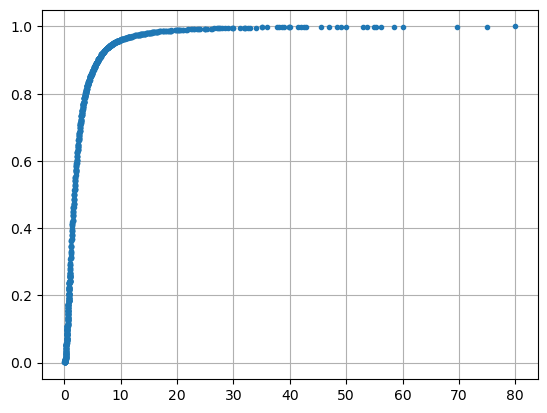

In [31]:
# ecdf plot(plotting cumulative percentages)
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

In [32]:
# Quantile Analysis
quantiles = df['price'].quantile([0.85,0.90])

quantiles

0.85    4.581
0.90    6.000
Name: price, dtype: float64

- 85% properties are below 4.577cr
- 90% properties are below 6cr 

In [33]:
#apply log transformation as it is right skewed data 

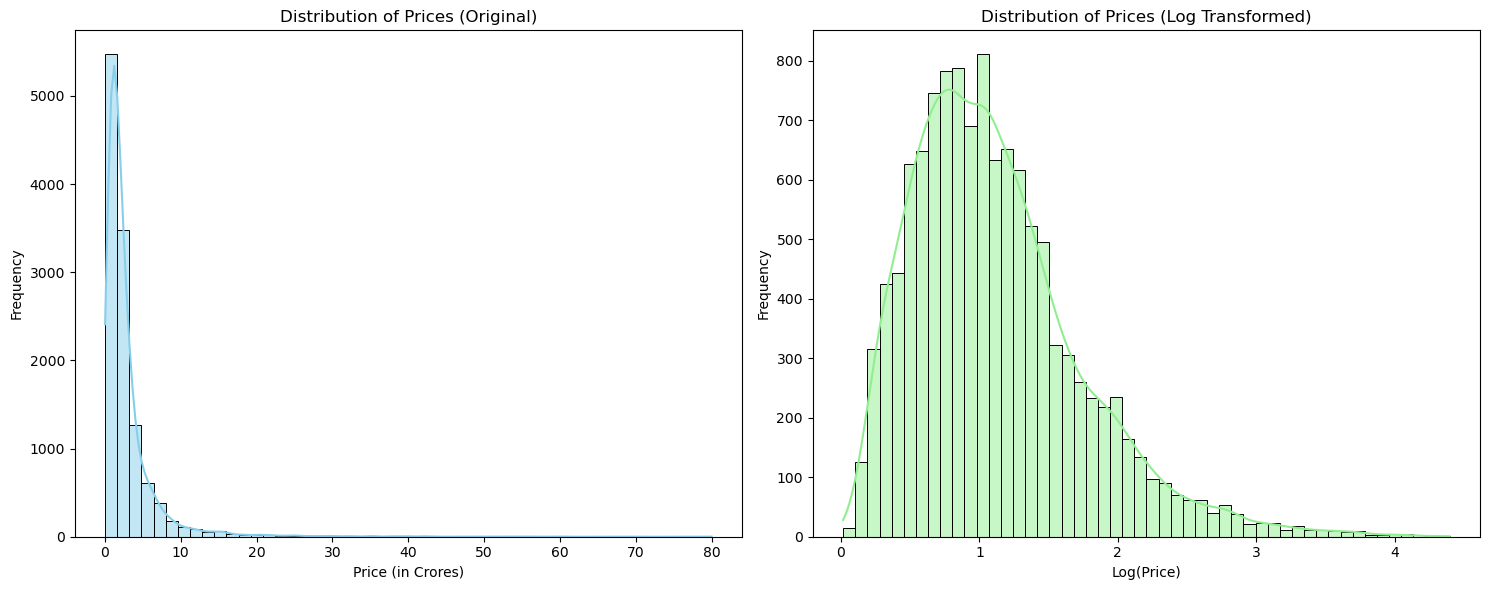

In [34]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- we use log1p and it means we are doing this log(1+x) with each values 

### observation
- After applying the logarithmic transformation (log(price)), the distribution becomes closer to normal
- The log transformation reduces the impact of extreme values (outliers) and compresses the wide range of prices into a more manageable scale.

In [35]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.10188680815024 1.7174592993316868


### Observation
- after log transformation skewness and kurtosis also get reduced 
- distribution is positively skewed (Acceptable range for near-normal data: −0.5 to 0.5. Beyond this, the data may not be considered symmetric.)
- Kurtosis<3: Light tails so it indicated that it is platykurtic. 
- kurtosis between 2 and 4 is often considered acceptable for near-normal distributions.

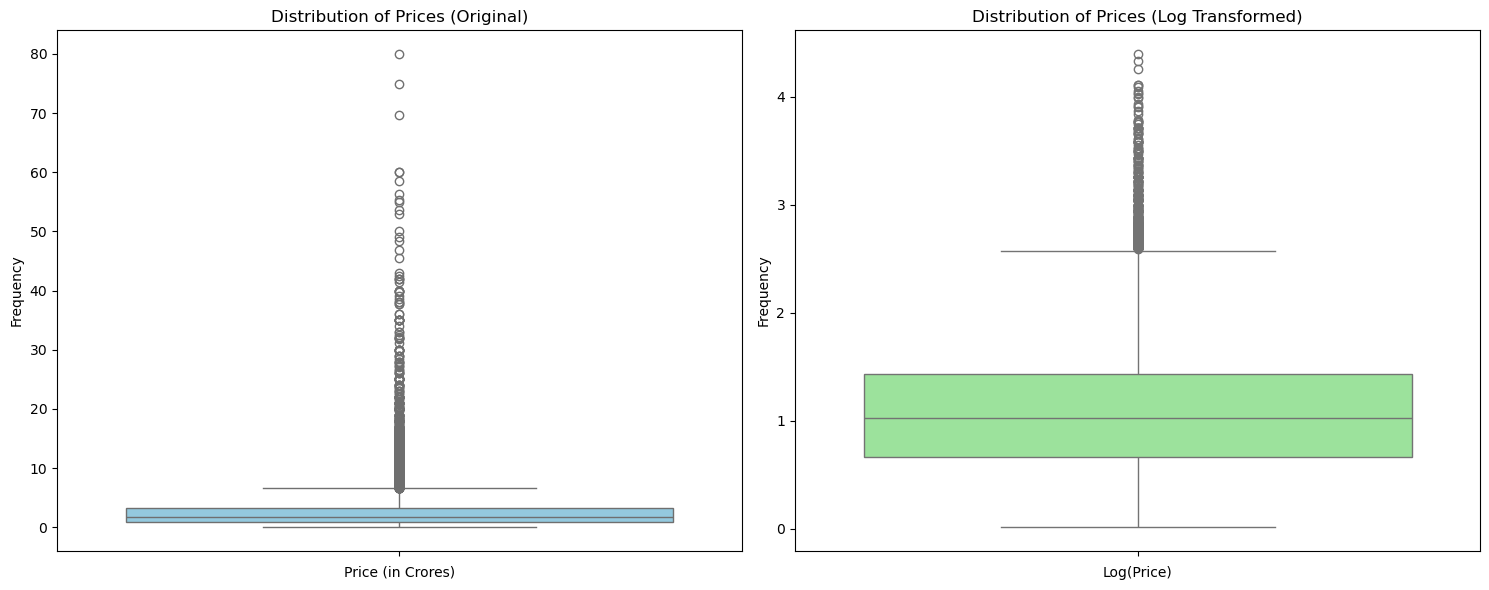

In [36]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observation

- The original data has a long tail, indicating high skewness. After the log transformation, the distribution becomes more compact and less skewed.
- After the log transformation, the data gets normalized, making the distribution more visible and interpretable.
- The log transformation brings outliers closer to the main data, reducing their impact.

# address region

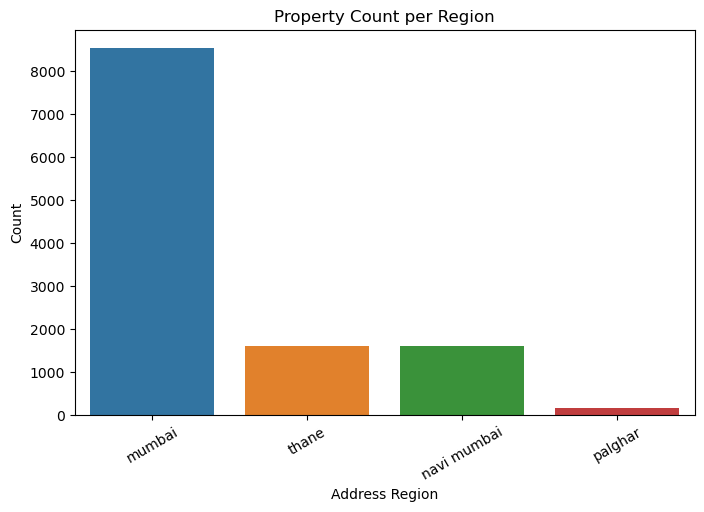

In [37]:
# Count occurrences
counts = df['addressregion'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette="tab10", legend=False)

# Labels
plt.xlabel("Address Region")
plt.ylabel("Count")
plt.title("Property Count per Region")
plt.xticks(rotation=30)
plt.show()

In [38]:
df_mumbai = df[df['addressregion'] == 'mumbai']

In [39]:
df_mumbai['price'].describe()

count    8519.000000
mean        3.552069
std         4.815195
min         0.035000
25%         1.250000
50%         2.210000
75%         3.950000
max        80.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

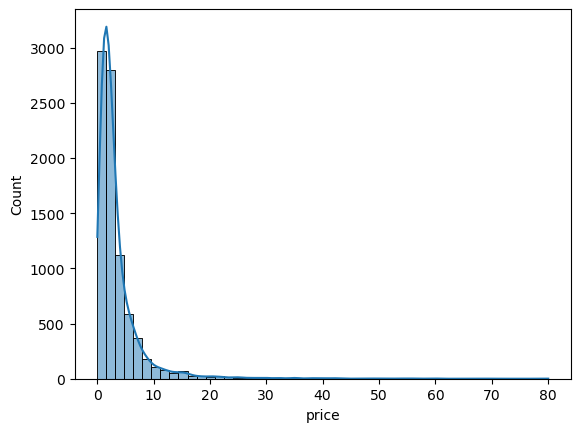

In [40]:
sns.histplot(df_mumbai['price'], kde=True, bins=50)

In [41]:
df_navimumbai = df[df['addressregion'] == 'navi mumbai']

In [42]:
df_navimumbai['price'].describe()

count    1599.000000
mean        1.262860
std         1.060342
min         0.075000
25%         0.540000
50%         0.930000
75%         1.635000
max         9.010000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

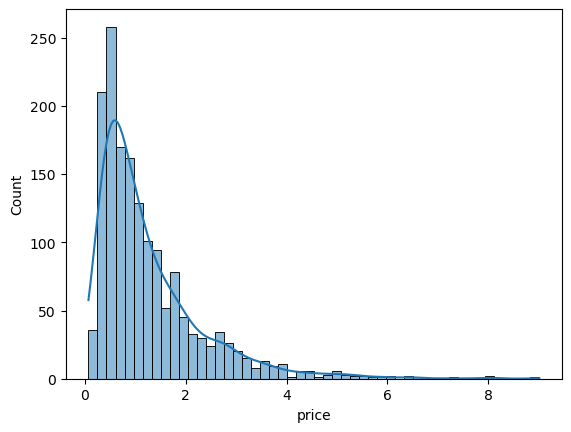

In [43]:
sns.histplot(df_navimumbai['price'], kde=True, bins=50)

In [44]:
df_thane = df[df['addressregion'] == 'thane']

In [45]:
df_thane['price'].describe()

count    1615.000000
mean        1.406286
std         1.037789
min         0.070000
25%         0.700000
50%         1.180000
75%         1.750000
max        10.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

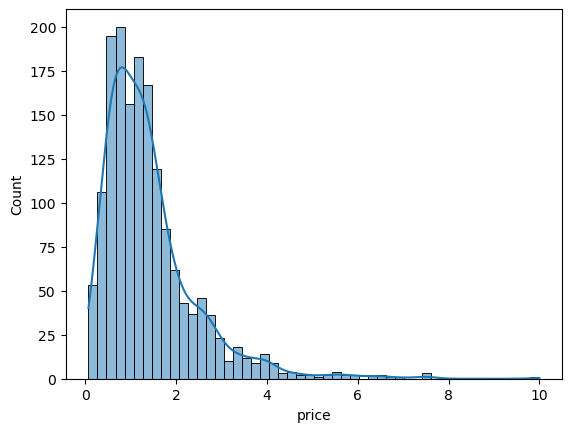

In [46]:
sns.histplot(df_thane['price'], kde=True, bins=50)

In [47]:
df_palghar = df[df['addressregion'] == 'palghar']

In [48]:
df_palghar['price'].describe()

count    161.000000
mean       0.277466
std        0.153432
min        0.017000
25%        0.186000
50%        0.230000
75%        0.320000
max        1.220000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

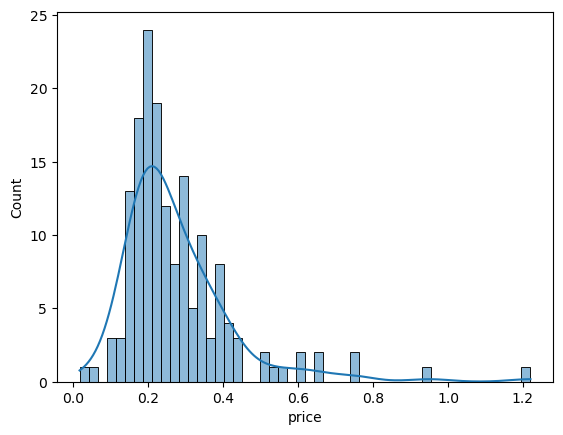

In [49]:
sns.histplot(df_palghar['price'], kde=True, bins=50)

<Axes: ylabel='proportion'>

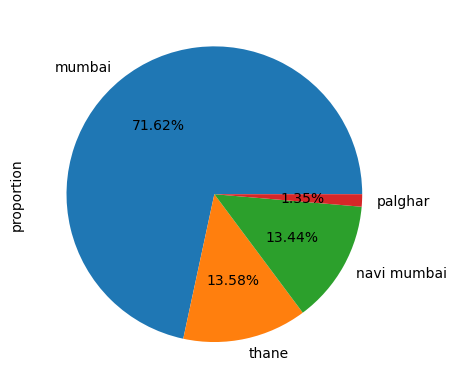

In [50]:
df['addressregion'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

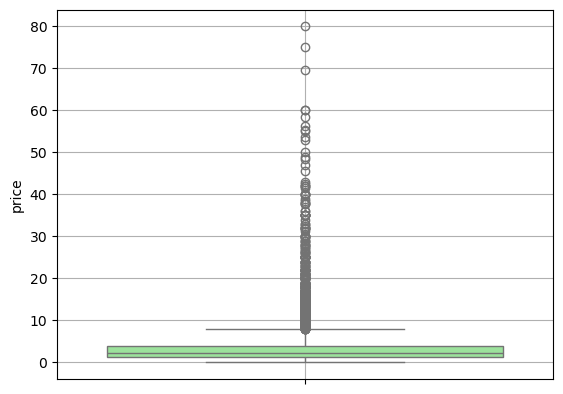

In [51]:
sns.boxplot(df_mumbai['price'],color='lightgreen')
plt.grid()

In [52]:
df_mumbai['price'].describe()

count    8519.000000
mean        3.552069
std         4.815195
min         0.035000
25%         1.250000
50%         2.210000
75%         3.950000
max        80.000000
Name: price, dtype: float64

In [53]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_mumbai['price'], 25)
Q3 = np.percentile(df_mumbai['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 1.25
Q3 (75th percentile): 3.95
IQR: 2.7


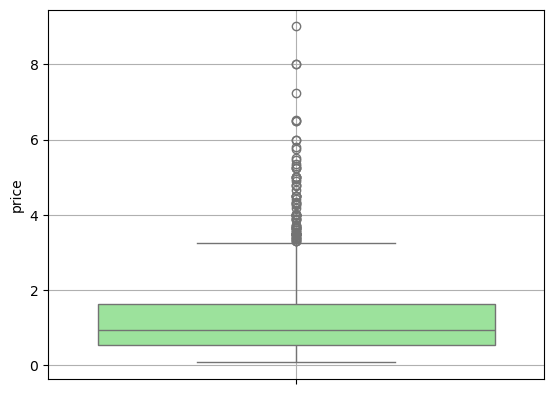

In [54]:
sns.boxplot(df_navimumbai['price'],color='lightgreen')
plt.grid()

In [55]:
df_navimumbai['price'].describe()

count    1599.000000
mean        1.262860
std         1.060342
min         0.075000
25%         0.540000
50%         0.930000
75%         1.635000
max         9.010000
Name: price, dtype: float64

In [56]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_navimumbai['price'], 25)
Q3 = np.percentile(df_navimumbai['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.54
Q3 (75th percentile): 1.6349999999999998
IQR: 1.0949999999999998


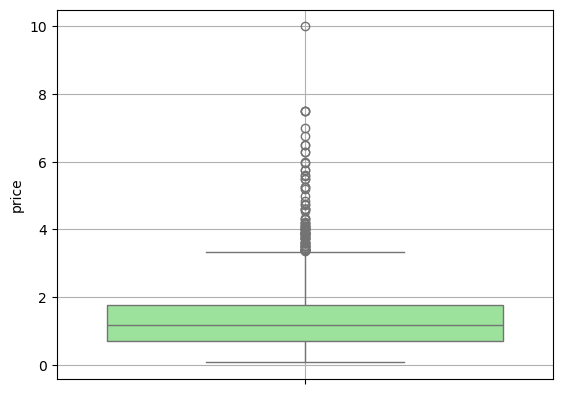

In [57]:
sns.boxplot(df_thane['price'],color='lightgreen')
plt.grid()

In [58]:
df_thane['price'].describe()

count    1615.000000
mean        1.406286
std         1.037789
min         0.070000
25%         0.700000
50%         1.180000
75%         1.750000
max        10.000000
Name: price, dtype: float64

In [59]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_thane['price'], 25)
Q3 = np.percentile(df_thane['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.7
Q3 (75th percentile): 1.75
IQR: 1.05


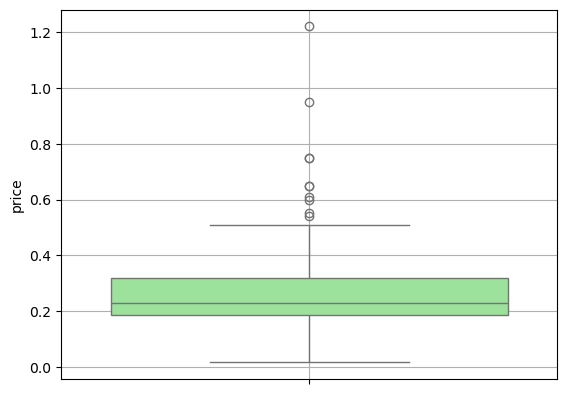

In [60]:
sns.boxplot(df_palghar['price'],color='lightgreen')
plt.grid()

In [61]:
df_palghar['price'].describe()

count    161.000000
mean       0.277466
std        0.153432
min        0.017000
25%        0.186000
50%        0.230000
75%        0.320000
max        1.220000
Name: price, dtype: float64

In [62]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_palghar['price'], 25)
Q3 = np.percentile(df_palghar['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.186
Q3 (75th percentile): 0.32
IQR: 0.134


### observation

- mean and median of all regions is different,this means there is prices according to region
    - Mean/median Price:
    - mumbai - 3.55/2.20
    - navi mumbai - 1.26/0.92
    - thane - 1.40/1.18
    - palghar - 0.27/0.23

- mean and median of the palghar properties is almost same indicates that data distribution is relatively symmetric and there are fewer outliers
- most properties fall in this particular region
    - mumbai - 0 to 5 cr
    - navi mumbai and thane - 0 to 2 cr
    - palghar - 0.1 to 0.4 cr

- mumbai : standard deviation greater than the mean indicates high variation, meaning property prices in Mumbai are significantly diverse.
- palghar,thane and navi mumbai : standard deviation less than the mean indicates low variation, meaning property prices are more uniform and predictable.
- Mumbai appears to have more significant outliers on the higher end of the price scale compared to other regions, leading to a higher mean.
- All regions exhibit right-skewed distributions, indicating that most properties fall within lower price ranges, with a few high-priced properties pulling the mean upwards.

##### from box plot
 - In all regions outliers beyond the whiskers of the boxplots.
 - Mumbai: IQR = 1.25, indicating a higher spread in prices compared to other regions.
 - Navi Mumbai: IQR = 0.64, suggesting moderate variability.
 - Thane: IQR = 1.05, showing a higher variability than Navi Mumbai but less than Mumbai.
 - Palghar: IQR = 0.14, the lowest among all, indicating a smaller variation in property prices.
 - The boxplots indicate right-skewed distributions (positive skewness) for all regions, with long tails on the higher side.

#### conclusion

- most of the data is from mumbai region and it can create bias
- mumbai property prices higher than other regions
- prices are according to the region
- expensiveness is like mumbai > thane > navi mumbai > palghar

### Solution:
1. **Address Bias**:
   - Use stratified sampling to ensure balanced representation across regions for analysis.
   - Normalize or standardize property prices to reduce the impact of Mumbai's dominance.

2. **Separate Regional Analysis**:
   - Analyze each region independently to derive region-specific insights.
   - Create separate predictive models or pricing strategies for each region.

3. **Outlier Handling**:
   - Remove or cap extreme outliers to minimize their impact on mean calculations.
   - Focus on the median for central tendency, as it is more robust to outliers.

# costpersqft

In [63]:
df['costpersqft'].head()

0    28346.0
1    12441.0
2    28892.0
3    23500.0
4    20724.0
Name: costpersqft, dtype: float64

In [64]:
df['costpersqft'].dtype

dtype('float64')

In [65]:
#no of missing values in costpersqft column
int(df['costpersqft'].isna().sum())

6

In [66]:
df['costpersqft'].describe()

count    1.188800e+04
mean     2.826924e+04
std      5.140888e+04
min      1.470000e+02
25%      1.690925e+04
50%      2.558100e+04
75%      3.428600e+04
max      5.333333e+06
Name: costpersqft, dtype: float64

- range of the sqft ranges from 147.00 sqft to  5333333 sqft
- mean is 28263 and median is 25577

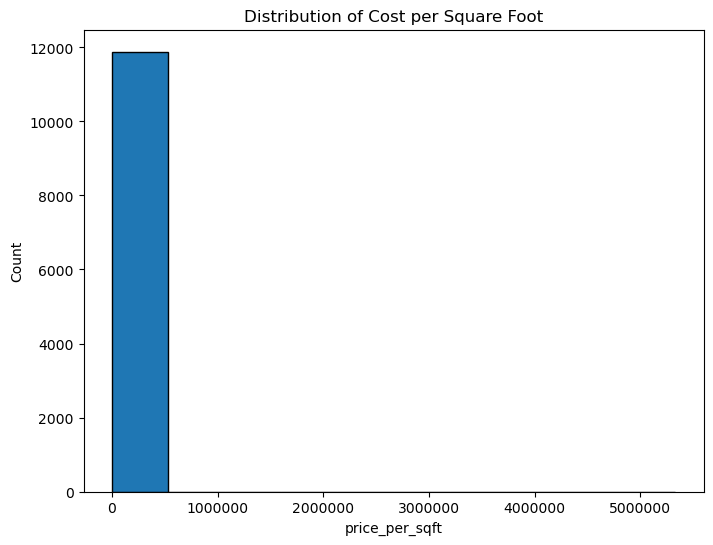

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Replace `costpersqft` with your column
plt.figure(figsize=(8, 6))
df['costpersqft'].plot(kind='hist', bins=10, edgecolor='black')

# Set standard x-axis format
plt.ticklabel_format(style='plain', axis='x')

# Add labels and title
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.title('Distribution of Cost per Square Foot')

plt.show()


In [68]:
# Skewness and Kurtosis
skewness = df['costpersqft'].skew()
kurtosis = df['costpersqft'].kurt()

print(skewness,kurtosis)

92.53886990843753 9541.837650858357


#### Observation

- there are few outliers which affect the whole distribution
- A positive skewness value (like 92.57) suggests a heavily right-skewed distribution, meaning there are extreme high values in the dataset pulling the tail to the right.
- A high kurtosis value (like 9547.57) indicates that the distribution has heavy tails and possibly significant outliers.

In [69]:
#drop outliers
df = df.drop(df[df['costpersqft'].isin([5333333, 208333, 344262, 270543])].index)


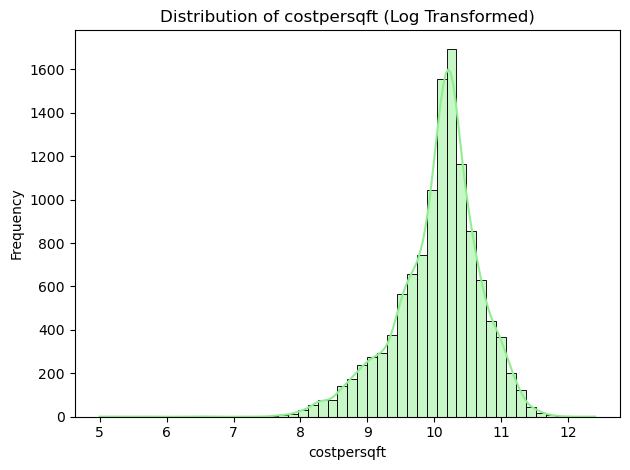

In [70]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['costpersqft']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of costpersqft (Log Transformed)')
plt.xlabel('costpersqft')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [71]:
skewness = np.log1p(df['costpersqft']).skew()
kurtosis = np.log1p(df['costpersqft']).kurt()

print(skewness,kurtosis)

-0.7445471990577865 1.3674235565670858


### observation

- A skewness of -0.744 suggests that the data is moderately negatively skewed after the log transformation.
- This means the tail on the left side of the distribution (smaller values) is slightly longer than the right side.
- Log transformation has reduced the skewness compared to the original data, which is a common transformation for positively skewed distributions.
- A kurtosis value of 1.366 indicates the distribution is light-tailed compared to a normal distribution (which has a kurtosis of 3).
- This suggests fewer outliers in the transformed data, implying a flatter peak and thinner tails than the normal distribution.

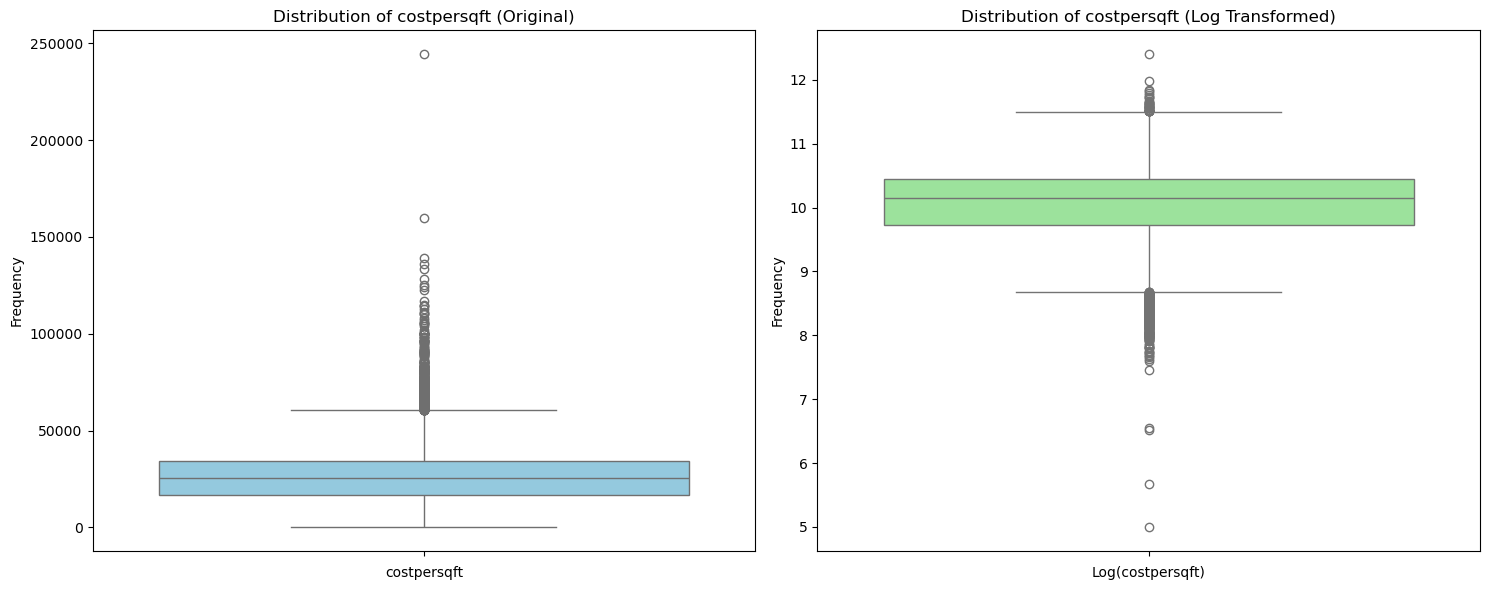

In [72]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['costpersqft'], color='skyblue')
plt.title('Distribution of costpersqft (Original)')
plt.xlabel('costpersqft')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['costpersqft']), color='lightgreen')
plt.title('Distribution of costpersqft (Log Transformed)')
plt.xlabel('Log(costpersqft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [73]:
# Drop NaN values from the column
cleaned_data = df['costpersqft'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data, 25)
Q3 = np.percentile(cleaned_data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")


Q1 (25th percentile): 16898.75
Q3 (75th percentile): 34286.0
IQR: 17387.25


In [74]:
# Quantile Analysis
quantiles = df['costpersqft'].quantile([0.85,0.95])

quantiles

0.85    41667.00
0.95    59146.35
Name: costpersqft, dtype: float64

### Observation
- The boxplot(left) shows significant outliers (data points far above the upper whisker)
- The log transformation(right) reduced the skewness significantly, making the distribution more symmetric.
- However, some outliers are still present, though their effect on the overall distribution has been minimized.

# bed

In [75]:
df['bed'].head()

0    2.0
1    3.0
2    2.0
3    2.0
4    1.0
Name: bed, dtype: float64

In [76]:
df['bed'].value_counts()

bed
2.0     4854
1.0     3183
3.0     2898
4.0      756
5.0      127
6.0       55
7.0        8
8.0        5
10.0       4
Name: count, dtype: int64

In [77]:
df['bed'].isna().sum()

0

<Axes: xlabel='bed'>

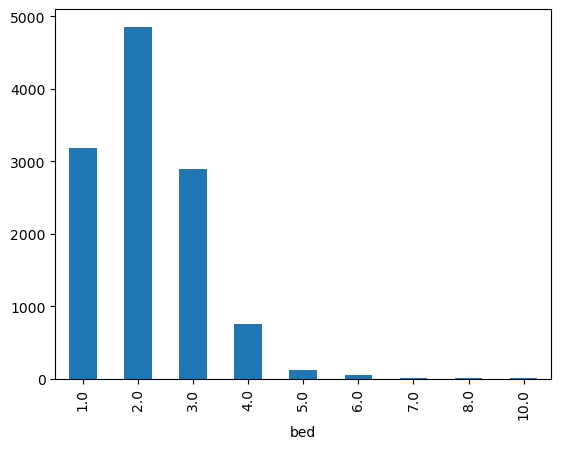

In [78]:
df['bed'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

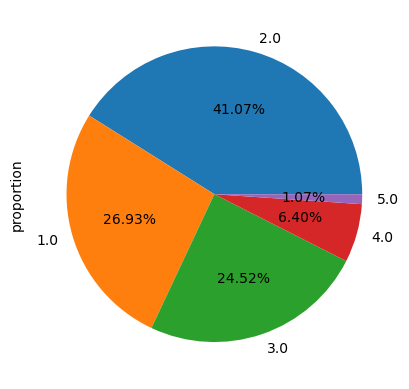

In [79]:
df['bed'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [80]:
df['bed'].value_counts(normalize=True).cumsum()

bed
2.0     0.408242
1.0     0.675946
3.0     0.919680
4.0     0.983263
5.0     0.993944
6.0     0.998570
7.0     0.999243
8.0     0.999664
10.0    1.000000
Name: proportion, dtype: float64

### obserbvation 

- no missing values
- 92% of the properties have 1, 2, or 3 bedrooms.

# bath

In [81]:
df['bath'].head()

0    2.0
1    3.0
2    2.0
3    2.0
4    2.0
Name: bath, dtype: float64

In [82]:
df['bath'].value_counts()

bath
2.0     6553
3.0     2483
1.0     1651
4.0      781
5.0      278
6.0       88
7.0       11
10.0       7
8.0        7
9.0        1
Name: count, dtype: int64

In [83]:
df['bath'].isna().sum()

30

<Axes: xlabel='bath'>

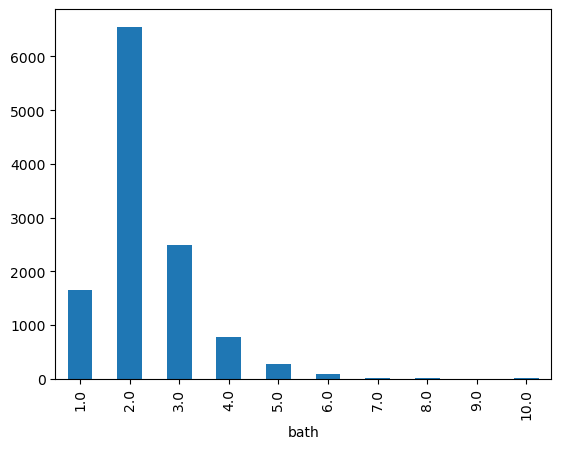

In [84]:
df['bath'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

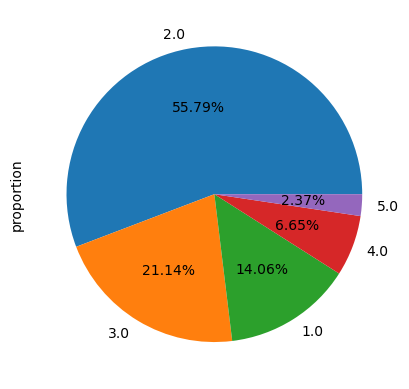

In [85]:
df['bath'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [86]:
df['bath'].value_counts(normalize=True).cumsum()

bath
2.0     0.552530
3.0     0.761889
1.0     0.901096
4.0     0.966948
5.0     0.990388
6.0     0.997808
7.0     0.998735
10.0    0.999325
8.0     0.999916
9.0     1.000000
Name: proportion, dtype: float64

### observation

- 30 missing values
- 99% of the properties have 1,2,3,4 and 5 bathrooms.
- 55% properties have 2 bathrooms

# balcony

In [87]:
df['balcony'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: balcony, dtype: float64

In [88]:
df['balcony'].value_counts()

balcony
1.0    3063
2.0    1468
3.0    1101
4.0     332
5.0      76
6.0      21
7.0       7
8.0       4
Name: count, dtype: int64

In [89]:
df['balcony'].isnull().sum()

5818

<Axes: xlabel='balcony'>

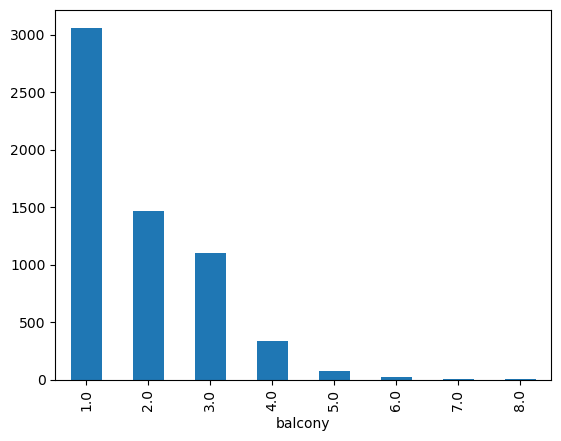

In [90]:
df['balcony'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

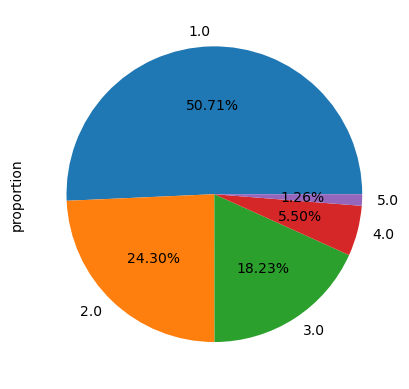

In [91]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [92]:
df['balcony'].value_counts(normalize=True).cumsum()

balcony
1.0    0.504447
2.0    0.746212
3.0    0.927536
4.0    0.982213
5.0    0.994730
6.0    0.998188
7.0    0.999341
8.0    1.000000
Name: proportion, dtype: float64

### observation
- 5826 missing values
- 99% of the properties have 1,2,3,4 and 5 balconies.
- 50% properties have 1 balcony 

# parking

In [93]:
df['parking'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
Name: parking, dtype: float64

In [94]:
df['parking'].value_counts()

parking
1.0     3958
2.0     1350
3.0      243
4.0       82
5.0       17
6.0        7
10.0       1
9.0        1
12.0       1
8.0        1
Name: count, dtype: int64

In [95]:
df['parking'].isna().sum()

6229

<Axes: xlabel='parking'>

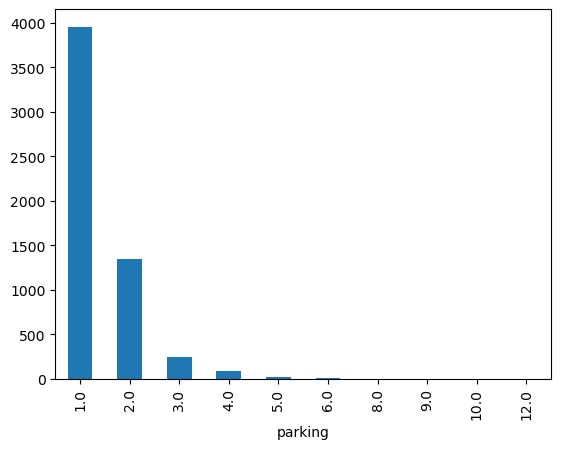

In [96]:
df['parking'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

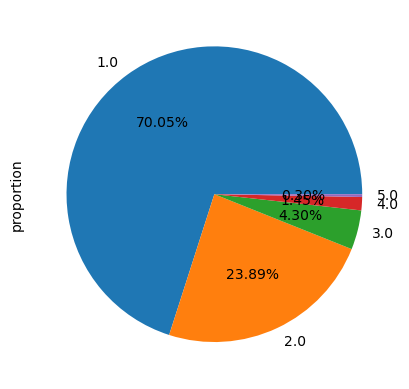

In [97]:
df['parking'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### observation
- 6237 missing values
- 70% of properties have only 1 parking followed by 23.89% properties have 2 parking
- feature engineering of the categories which has value_counts less than 7

# available_units

In [98]:
df['available_units'].head()

0    1512.0
1     810.0
2     412.0
3     339.0
4     174.0
Name: available_units, dtype: float64

In [99]:
df['available_units'].describe()

count     6672.000000
mean       465.644934
std       1086.089688
min          6.000000
25%        120.000000
50%        282.000000
75%        550.000000
max      40000.000000
Name: available_units, dtype: float64

In [100]:
df['available_units'].isna().sum()

5218

<Axes: xlabel='available_units', ylabel='Count'>

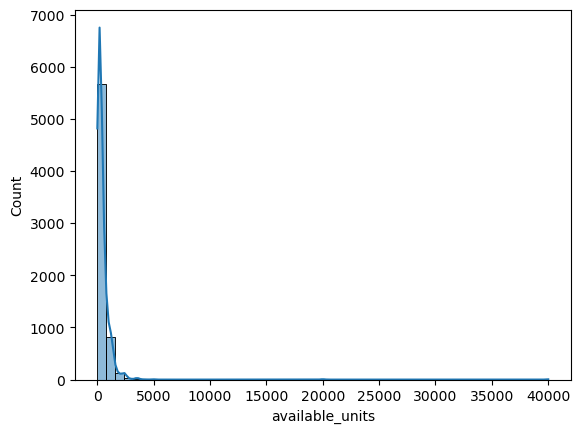

In [101]:
sns.histplot(df['available_units'],kde=True,bins=50)

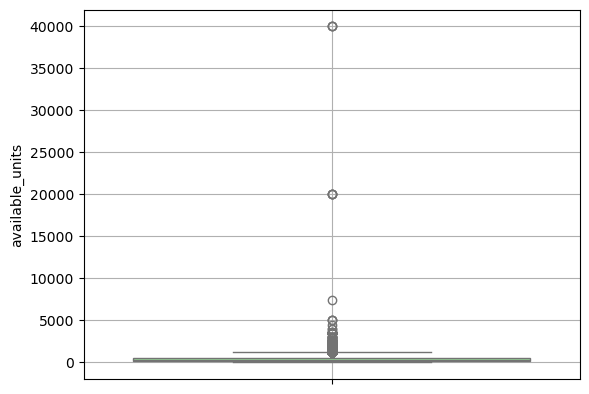

In [102]:
sns.boxplot(df['available_units'],color='lightgreen')
plt.grid()

In [103]:
# Skewness and Kurtosis
skewness = df['available_units'].skew()
kurtosis = df['available_units'].kurt()

print(skewness,kurtosis)

25.46303296979051 850.8755981748383


#### Observation


- there are few outliers which affect the whole distribution
- A positive skewness value (like 25.46) suggests a heavily right-skewed distribution, meaning there are extreme high values in the dataset pulling the tail to the right.
- A high kurtosis value (like 850.87) indicates that the distribution has heavy tails and possibly significant outliers.

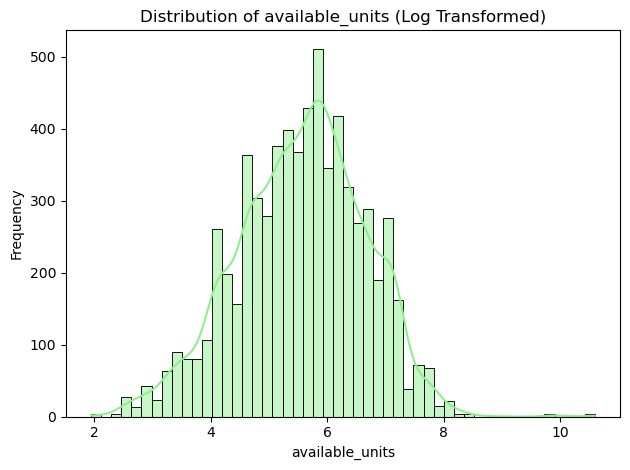

In [104]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['available_units']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of available_units (Log Transformed)')
plt.xlabel('available_units')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [105]:
skewness = np.log1p(df['available_units']).skew()
kurtosis = np.log1p(df['available_units']).kurt()

print(skewness,kurtosis)

-0.16552145576745805 0.029543952670652462


### observation

- 5226 missing values
- A skewness of -0.166 indicates that the data is nearly symmetric after the log transformation.
- A kurtosis of 0.030 is very close to 0, indicating that the distribution is neither heavily tailed nor strongly peaked.

# tower

In [106]:
df['towers'].head()

0    10.0
1     6.0
2     2.0
3     1.0
4     1.0
Name: towers, dtype: float64

In [107]:
df['towers'].value_counts()

towers
1.0      1991
2.0      1191
3.0      1057
5.0       489
4.0       475
6.0       429
8.0       322
7.0       151
9.0       115
15.0      110
11.0       79
20.0       56
10.0       54
12.0       51
16.0       37
28.0       31
14.0       29
19.0       25
13.0       23
17.0       20
25.0       15
40.0       15
22.0       13
34.0       10
27.0       10
90.0        9
18.0        8
24.0        7
30.0        5
31.0        5
38.0        4
56.0        4
26.0        4
21.0        4
55.0        3
36.0        3
100.0       3
23.0        2
45.0        2
200.0       1
42.0        1
35.0        1
Name: count, dtype: int64

In [108]:
df['towers'].isna().sum()

5026

<Axes: xlabel='towers', ylabel='Count'>

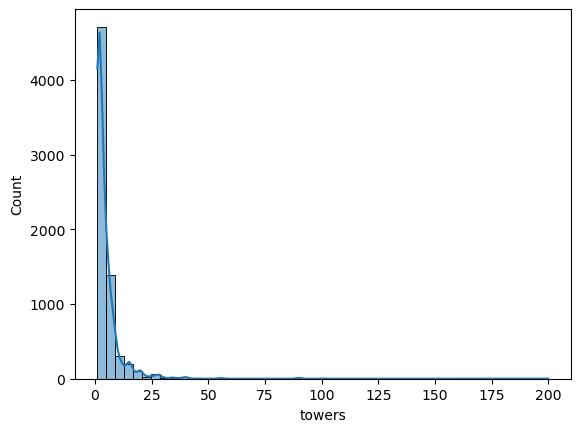

In [109]:
sns.histplot(df['towers'], kde=True, bins =50)

<Axes: xlabel='towers'>

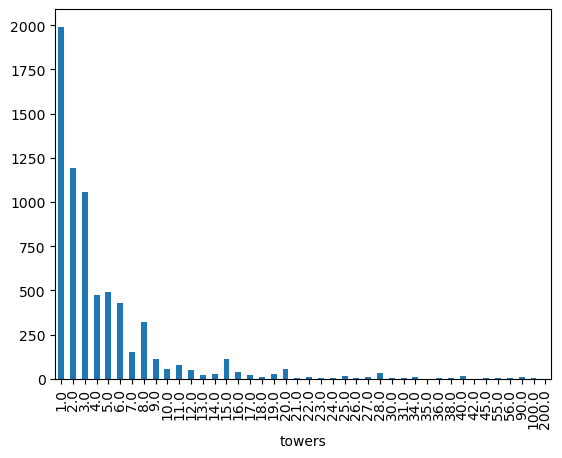

In [110]:
df['towers'].value_counts().sort_index().plot(kind='bar')

### observation

- 5034 missing values
- most of the builders make less than 20 towers
- The highest frequency is observed for lower values of towers (e.g., 1, 2, or 3 towers).
- As the number of towers increases, the frequency decreases significantly.
- The distribution is right-skewed.

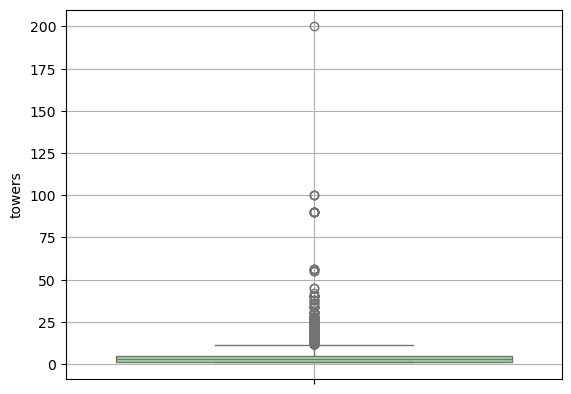

In [111]:
sns.boxplot(df['towers'] , color = 'lightgreen' )
plt.grid()

In [112]:
#skewness and kurtosis
skewness = df['towers'].skew()
kurtosis = df['towers'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 8.474374828937181
kurtosis : 141.8690163403882


### Observation

- there are few outliers which affect the whole distribution
- A positive skewness value (like 8.47) suggests a heavily right-skewed distribution, meaning there are extreme high values in the dataset pulling the tail to the right.
- A high kurtosis value (like 141.86) indicates that the distribution has heavy tails and possibly significant outliers.

# locality_rank

In [113]:
df['locality_rank'].head()

0     14.0
1     11.0
2    401.0
3    118.0
4    376.0
Name: locality_rank, dtype: float64

In [114]:
df['locality_rank'].value_counts()

locality_rank
186.0    412
4.0      371
46.0     336
8.0      301
155.0    291
92.0     277
11.0     266
230.0    245
102.0    239
236.0    238
170.0    232
7.0      219
126.0    213
16.0     209
3.0      200
17.0     199
239.0    189
408.0    181
269.0    180
127.0    164
13.0     133
232.0    124
12.0     122
135.0    116
1.0      112
22.0     102
68.0     100
48.0      92
77.0      90
318.0     84
83.0      81
133.0     79
43.0      71
131.0     63
484.0     59
401.0     57
29.0      56
2.0       55
121.0     51
34.0      51
40.0      50
132.0     48
128.0     46
5.0       44
193.0     41
18.0      40
9.0       36
474.0     36
14.0      35
19.0      31
54.0      31
37.0      30
15.0      30
24.0      30
322.0     30
6.0       28
539.0     28
130.0     25
187.0     24
512.0     24
45.0      24
475.0     24
36.0      23
39.0      23
277.0     21
53.0      18
260.0     18
524.0     17
85.0      17
118.0     17
499.0     16
35.0      15
441.0     15
25.0      15
483.0     15
20.0      1

In [115]:
df['locality_rank'].isna().sum()

3831

In [116]:
df['locality_rank'].describe()

count    8059.000000
mean      122.383422
std       126.504555
min         1.000000
25%        16.000000
50%        92.000000
75%       186.000000
max       839.000000
Name: locality_rank, dtype: float64

### observation
- 3839 missing values
- Min rank is 1, max is 839.  
- Mean rank is 122.38, median is 92 (right-skewed).  
- 25% of localities have ranks ≤ 16; 50% ≤ 92.  
- Standard deviation is 126.50; high variability.  
- Data covers 1–839 ranks out of 3015 total ranks.  

<Axes: xlabel='locality_rank', ylabel='Count'>

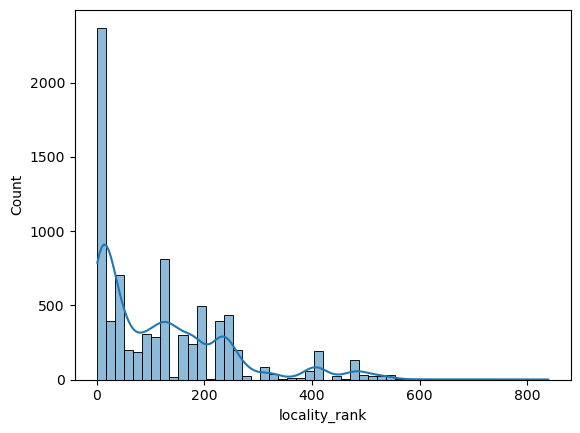

In [117]:
sns.histplot(df['locality_rank'],kde=True,bins=50)

### observation

- The distribution is right-skewed, with most localities having lower ranks.
- A significant number of localities have ranks close to 1–50.
- Ranks above 200 are relatively sparse, with a gradual decline towards the maximum rank (839).
- The highest frequency is observed for ranks near 1.
- The presence of multiple peaks indicates possible clustering in locality ranks.

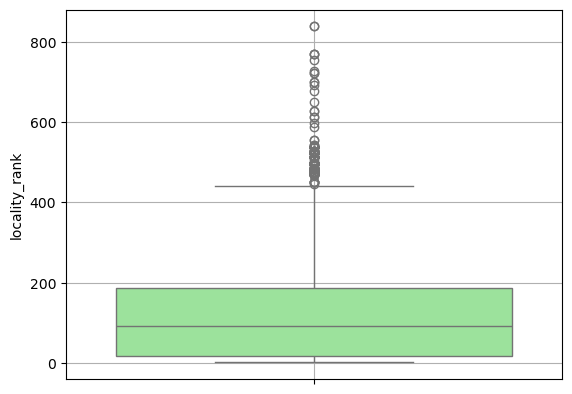

In [118]:
sns.boxplot(df['locality_rank'],color='lightgreen')
plt.grid()

### observations
- The IQR (green box) lies between ranks 16 and 186.
- The median rank is approximately 92.
- Ranks above 400 are outliers, with a few reaching the maximum rank (839).
- The distribution is right-skewed, as evident from the longer whisker on the upper side.
- Most data points are concentrated in the lower rank range (1–200).

In [119]:
#skewness and kurtosis
skewness = df['locality_rank'].skew()
kurtosis = df['locality_rank'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.3984851109800602
kurtosis : 1.9973850618338687


- Skewness (1.398): The data is positively skewed, with a longer tail on the right.  
- Most locality ranks are concentrated at lower values.
- Kurtosis (1.997): The distribution has light tails compared to a normal distribution (kurtosis < 3).  
- Indicates fewer extreme outliers than a heavy-tailed distribution.  

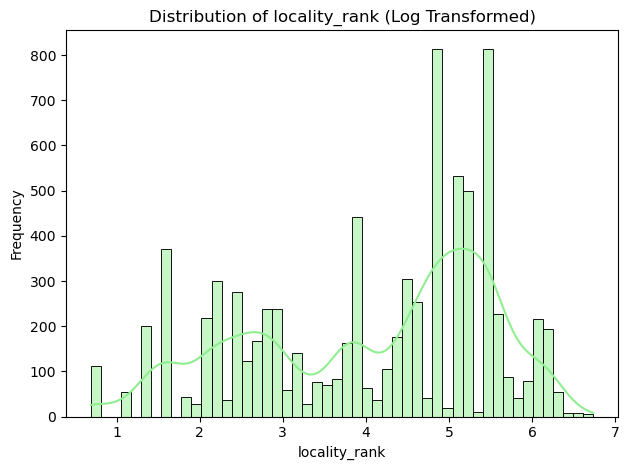

In [120]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['locality_rank']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of locality_rank (Log Transformed)')
plt.xlabel('locality_rank')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observations 
- The log transformation reduces skewness, making the distribution more symmetric.
- Peaks are observed around log values 2–5, indicating clustering in these ranges.
- Outliers in the original data are compressed, improving interpretability.
- The spread of ranks is now more balanced, highlighting patterns in the middle range.
- The transformation emphasizes the lower ranks, previously overshadowed by the skewness.

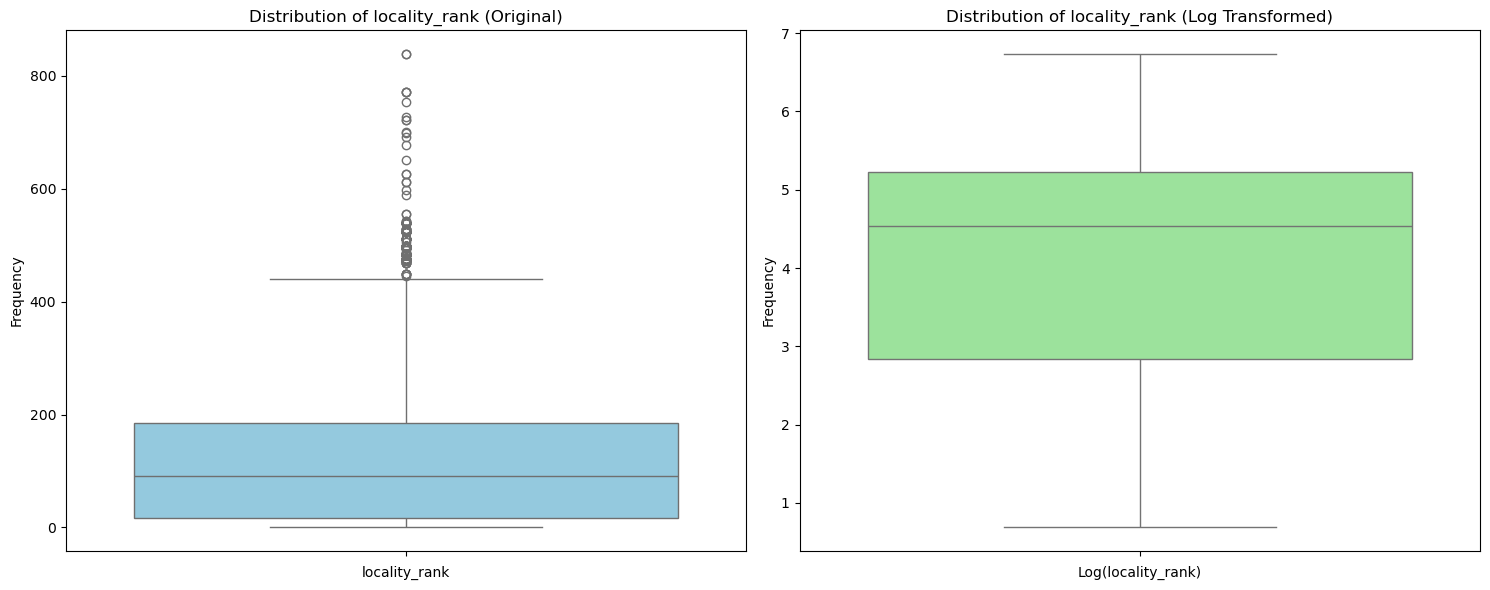

In [121]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['locality_rank'], color='skyblue')
plt.title('Distribution of locality_rank (Original)')
plt.xlabel('locality_rank')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['locality_rank']), color='lightgreen')
plt.title('Distribution of locality_rank (Log Transformed)')
plt.xlabel('Log(locality_rank)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation

- The data shows a right-skewed distribution with many outliers above the upper whisker.
- Most values are concentrated in the lower range.
- The logarithmic transformation reduces skewness and compresses extreme values, resulting in a more symmetric distribution with fewer visible outliers.

In [122]:
skewness = np.log1p(df['locality_rank']).skew()
kurtosis = np.log1p(df['locality_rank']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -0.4851451513358241
kurtosis : -0.9468942016046178


### observation

- A skewness value close to 0 indicates that the data is nearly symmetric.
- The slight negative value suggests a minor left-skewed distribution.
- A negative kurtosis indicates that the distribution is flatter than a normal distribution (platykurtic), with lighter tails and fewer extreme outliers.

# locality_url_rating

In [123]:
df['locality_rating'].head()

0    3.9
1    4.1
2    4.4
3    3.8
4    3.5
Name: locality_rating, dtype: float64

In [124]:
df['locality_rating'].isna().sum()

464

In [125]:
df['locality_rating'].value_counts()

locality_rating
4.1    2020
4.0    1949
3.9    1535
4.2    1366
3.8    1127
0.0     809
4.4     631
4.3     544
3.7     414
4.5     297
3.3     204
4.7     113
4.6      96
3.5      76
3.6      71
3.4      63
5.0      49
4.8      38
3.0       7
3.1       5
4.9       4
3.2       3
1.7       2
2.6       1
2.4       1
2.7       1
Name: count, dtype: int64

In [126]:
df['locality_rating'].describe()

count    11426.000000
mean         3.759330
std          1.067857
min          0.000000
25%          3.900000
50%          4.000000
75%          4.200000
max          5.000000
Name: locality_rating, dtype: float64

### observation
- 467 missing values
- Min locality_rating is 0, max is 5.  
- Mean locality_rating is 3.75, median is 4
- 25% of locality_rating have rating ≤ 3.90; 50% ≤ 4.0.  
- Standard deviation is 1.06; indicating moderate to high variability in ratings.
- Data covers 0–5 continuous rating out of 5 rating.  

<Axes: xlabel='locality_rating'>

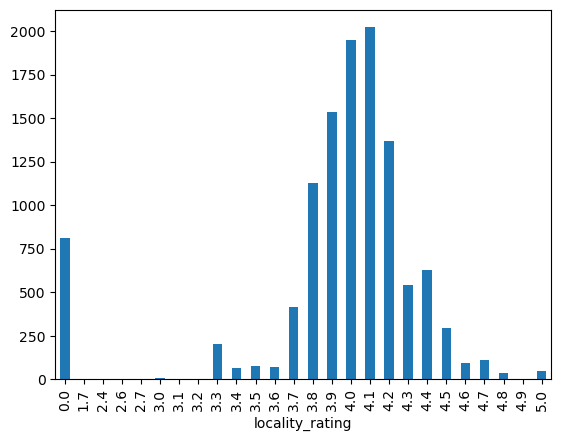

In [127]:
df['locality_rating'].value_counts().sort_index().plot(kind='bar')

### observation

- The ratings are concentrated between 3.8 and 4.3, with a peak at 4.0-4.1.
- The distribution is slightly left-skewed, indicating more high ratings than low.
- Outliers at extremes (e.g., 0.0, 1.0, >4.8) are minimal and infrequent.

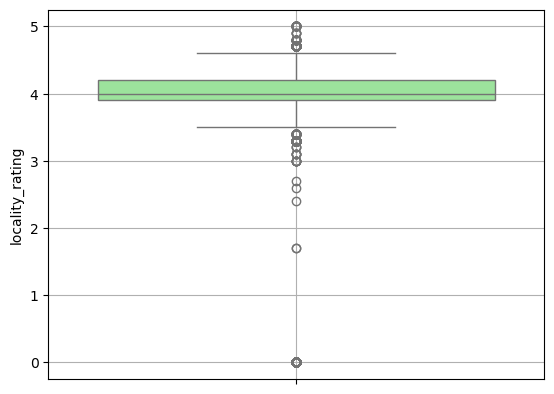

In [128]:
sns.boxplot(df['locality_rating'],color='lightgreen')
plt.grid()

In [129]:
# Drop NaN values from the column
cleaned_data_locality_rating = df['locality_rating'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_locality_rating, 25)
Q3 = np.percentile(cleaned_data_locality_rating, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 3.9
Q3 (75th percentile): 4.2
IQR: 0.30000000000000027
Lower Whisker: 3.4499999999999993
Upper Whisker: 4.65


In [130]:
# Quantile Analysis
quantiles = df['locality_rating'].quantile([0.30,0.95])

quantiles

0.30    3.9
0.95    4.5
Name: locality_rating, dtype: float64

### observation 

- the iqr green box lies between 3.90 and 4(50% data)
- the median rank is 4.00
- rating below 3.5 and above 4.65 are outliers
- iqr 0.3 indicate middle 50% of the ratings are tightly clustered, suggesting low variability in this range.
- The distribution is left-skewed, as slightly longer whisker from the lower side

In [131]:
#skewness and kurtosis
skewness = df['locality_rating'].skew()
kurtosis = df['locality_rating'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -3.0294711367447897
kurtosis : 7.927614663672985


### observation
- -3.03 negative skewness indicates strong left-skewed distribution caused by small number of low ratings pulling the tail to the left
- kurtosis > 3 leptokurtic distribution. This reflects a sharp peak and heavy tails, meaning there are more extreme values (outliers) compared to a normal distribution.
- try to apply transformations like reglection transform ,power transform,Box-Cox or Yeo-Johnson Transform

# construction

In [132]:
df['construction'].head()

0    under construction
1    under construction
2    under construction
3    under construction
4    under construction
Name: construction, dtype: object

In [133]:
df['construction'].isna().sum()

1056

In [134]:
df['construction'].value_counts()

construction
under construction    4557
less than 5 years     1508
new construction      1467
5 to 10 years         1405
10 to 15 years         944
above 20 years         495
15 to 20 years         458
Name: count, dtype: int64

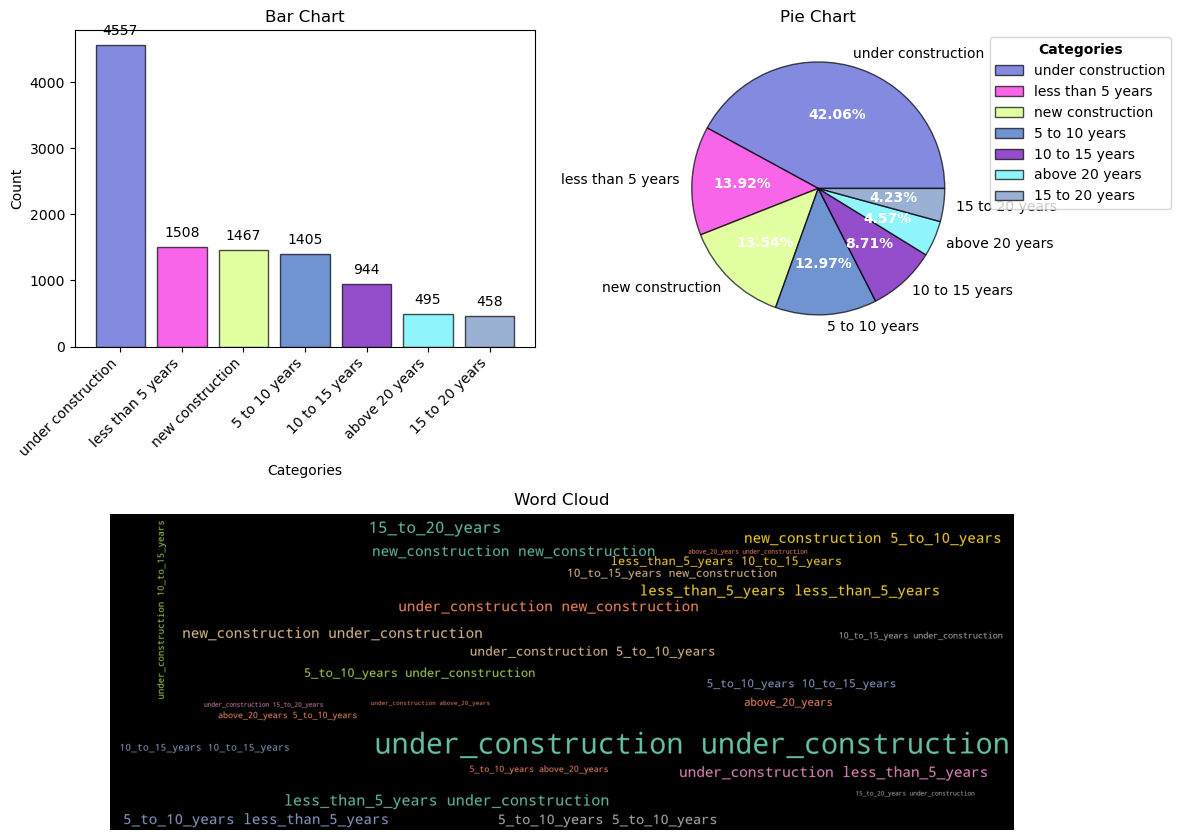

In [135]:
eda_helper_functions.cat_univar_plots(df, "construction")

In [136]:
df['construction'].notna().sum()

10834

In [137]:
df[df['construction'] == 'less than 5 years'].shape

(1508, 49)

In [138]:
df[df['construction'] == 'under construction'].shape

(4557, 49)

In [139]:
df[df['construction'] == 'new construction'].shape

(1467, 49)

In [140]:
df[df['construction'] == '5 to 10 years'].shape[0] + df[df['construction'] == '10 to 15 years'].shape[0] +df[df['construction'] == 'above 20 years'].shape[0] + df[df['construction'] == '15 to 20 years'].shape[0]

3302

### observation 
- 1063 missing values
- 3302 properties are older more than 5 years
- 1508 properties older less than 5 years
- 4558 are under construction properties
- 1467 are new construction properties
- 42% properties are under construction and all other are completed properties
- make above 10 years as separate category 

# overlooking 

In [141]:
df['overlooking'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: overlooking, dtype: object

In [142]:
df['overlooking'].isna().sum()

3961

In [143]:
df['overlooking'].value_counts()

overlooking
main road                       2242
garden/park, main road          1790
garden/park, main road, pool    1749
garden/park                     1536
garden/park, pool                451
pool                             102
main road, pool                   59
Name: count, dtype: int64

In [144]:
# Remove the phrase 'not available' from the 'overlooking' column
df['overlooking'] = df['overlooking'].str.replace(',? *not available', '', regex=True)

<Axes: xlabel='overlooking'>

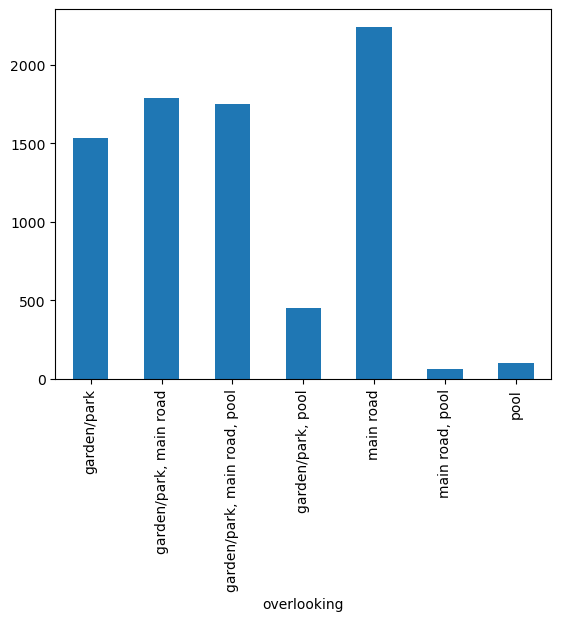

In [145]:
df['overlooking'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

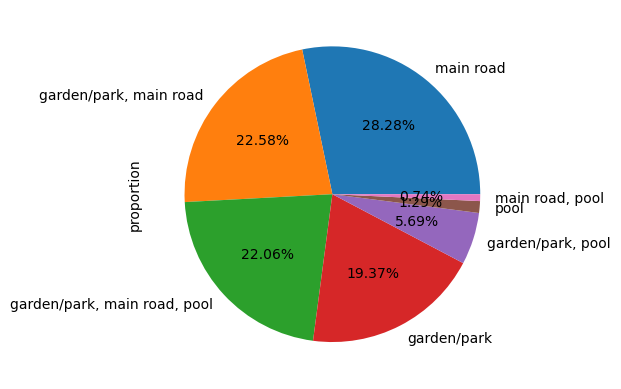

In [146]:
df['overlooking'].value_counts(normalize=True).head(7).plot(kind='pie',autopct='%0.2f%%')

### observation
- 3969 missing values
- main road and garden/park are the most common "overlooking" categories
- make 5th category as other(pool) which can have this combination garden/park, pool or main road, pool

# ownership

In [147]:
df['ownership'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ownership, dtype: object

In [148]:
df['ownership'].value_counts()

ownership
freehold                5921
co-operative society    2021
leasehold                317
power of attorney         28
Name: count, dtype: int64

In [149]:
df['ownership'].isna().sum()

3603

<Axes: xlabel='ownership'>

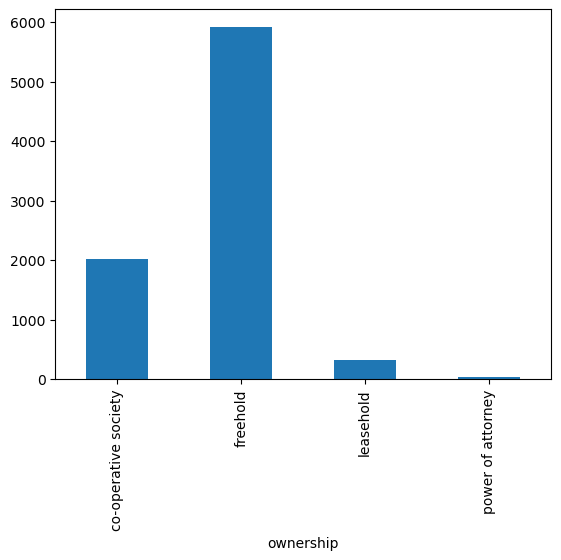

In [150]:
df['ownership'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

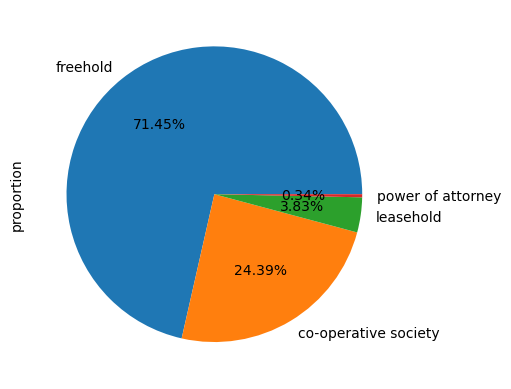

In [151]:
df['ownership'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

- freehold - owner has complete ownership of both the building and the land it is built on.
- leasehold - buyer owns the building but not the land it is built on.the land is leased from a landlord (often referred to as the freeholder) for a specific period, typically ranging from 30 to 99 years or more.
- Co-operative society in property ownership refers to a housing arrangement where the property (e.g., an apartment building) is owned and managed by a co-operative society
- Power of Attorney (PoA) in property allows a person (the principal) to authorize another (the agent) to manage, sell, lease, or transfer property on their behalf, without granting ownership.

### observation

- 3611 missing values
- most of the properties are from freehold properties 71.45% followed by the co-op society 

# extra_rooms

In [152]:
df['extra_rooms'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: extra_rooms, dtype: object

In [153]:
df['extra_rooms'].value_counts()

extra_rooms
none of these                  3005
store                          1112
puja                            743
puja, servant, store, study     316
study                           309
servant                         296
puja, store                     229
puja, store, study              132
store, study                     89
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64

In [154]:
df['extra_rooms'].isna().sum()

5292

<Axes: xlabel='extra_rooms'>

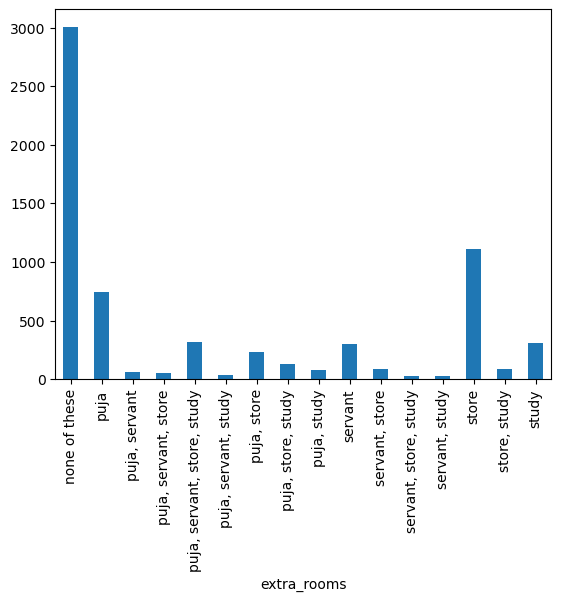

In [155]:
df['extra_rooms'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

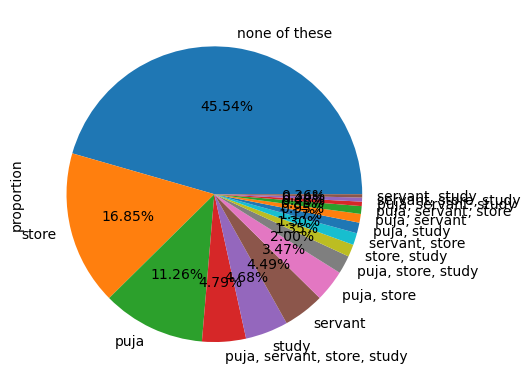

In [156]:
df['extra_rooms'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [157]:
import pandas as pd

# Sample data
data = {
    'rooms': [
        'none of these', 'store', 'puja', 'puja, servant, store, study', 'study',
        'servant', 'puja, store', 'puja, store, study', 'store, study', 'servant, store',
        'puja, study', 'puja, servant', 'puja, servant, store', 'puja, servant, study',
        'servant, store, study', 'servant, study'
    ],
    'count': [
        3005, 1112, 743, 316, 309, 296, 229, 132, 89, 86, 77, 63, 56, 32, 29, 24
    ]
}

df1 = pd.DataFrame(data)

# Splitting each 'rooms' entry into individual rooms and summing the counts
room_counts = {}

for index, row in df1.iterrows():
    rooms = row['rooms'].split(', ')
    count = row['count']
    
    for room in rooms:
        if room not in room_counts:
            room_counts[room] = 0
        room_counts[room] += count

# Displaying the final counts for each room
room_counts_df = pd.DataFrame(list(room_counts.items()), columns=['room', 'total_count']).sort_values(by='total_count', ascending=False)
print(room_counts_df)


            room  total_count
0  none of these         3005
1          store         2049
2           puja         1648
4          study         1008
3        servant          902


### observation
- 5300 missing values
- 45.54% properties dont have extra rooms
- most properties have store room followed by puja,study,servant
- feature engineering for this column eg: puja,servant so consider this as 2 rooms 

# builder

In [158]:
df['builder'].head()

0                 raymond realty
1                 paradise group
2    n rose developers pvt. ltd.
3                    avant group
4                        mj shah
Name: builder, dtype: object

In [159]:
df['builder'].value_counts()

builder
lodha group                                                       468
godrej properties                                                 277
rustomjee                                                         241
piramal realty                                                    227
oberoi realty ltd.                                                199
hiranandani group                                                 171
l&t realty                                                        153
runwal group                                                      144
kalpataru ltd.                                                    138
dosti realty                                                      131
kanakia spaces realty pvt. ltd.                                    92
cooperative group housing society                                  86
omkar realtors                                                     84
ashwin sheth group                                                 74
tata housing

In [160]:
df['builder'].value_counts().shape

(1146,)

In [161]:
df['builder'].isna().sum()

4273

In [162]:
#Let's apply the cumulative sum to check how much data comes from how many project_name.
df['builder'].value_counts(normalize = True).cumsum()

builder
lodha group                                                       0.061442
godrej properties                                                 0.097808
rustomjee                                                         0.129447
piramal realty                                                    0.159249
oberoi realty ltd.                                                0.185375
hiranandani group                                                 0.207825
l&t realty                                                        0.227911
runwal group                                                      0.246816
kalpataru ltd.                                                    0.264934
dosti realty                                                      0.282132
kanakia spaces realty pvt. ltd.                                   0.294210
cooperative group housing society                                 0.305501
omkar realtors                                                    0.316529
ashwin sheth grou

In [163]:
df['builder'].value_counts(normalize = True).cumsum().head(49)

builder
lodha group                              0.061442
godrej properties                        0.097808
rustomjee                                0.129447
piramal realty                           0.159249
oberoi realty ltd.                       0.185375
hiranandani group                        0.207825
l&t realty                               0.227911
runwal group                             0.246816
kalpataru ltd.                           0.264934
dosti realty                             0.282132
kanakia spaces realty pvt. ltd.          0.294210
cooperative group housing society        0.305501
omkar realtors                           0.316529
ashwin sheth group                       0.326244
tata housing development company ltd.    0.335696
raheja universal                         0.344493
ruparel realty                           0.352632
sethia infrastructure                    0.360247
mahindra lifespace developers ltd.       0.367730
sunteck realty ltd.                      0

In [164]:
project_counts = df['builder'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "High (50-100)": int(((project_counts >= 50) & (project_counts <= 100)).sum()),
    "Average (10-49)": int(((project_counts >= 10) & (project_counts < 50)).sum()),
    "Low (2-9)": int(((project_counts > 1) & (project_counts < 10)).sum()),
    "Very Low (1)": int((project_counts == 1).sum())
}
frequency_bins

{'High (50-100)': 12,
 'Average (10-49)': 124,
 'Low (2-9)': 499,
 'Very Low (1)': 501}

<Axes: xlabel='builder'>

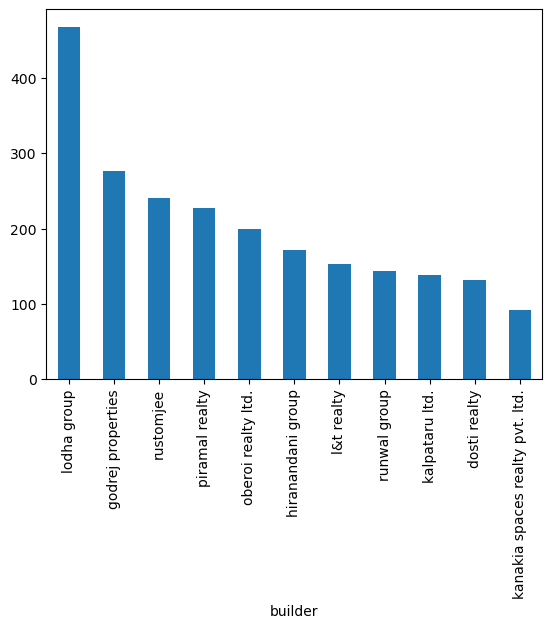

In [165]:
# top 10 socities
df['builder'].value_counts().head(11).plot(kind='bar')

### Observation
- High cardinality feature 
- total 1146 unique builders   
- The top 49 builders have 50 percent of the projects and the rest 50 percent of the properties come under the remaining 1097 builders
- while doing the train test split ensure that the train-test split maintains the same proportion of high-volume and low-volume projects to prevent bias during training and testing. i.e do statified sampling
  - High (50-100): 12 builders have done 50 to 100 projects 
  - Average (10-49): 124 builders have done 10 to 149 projects 
  - Low (2-9): 499 builders have done 2 to 9 projects 
  - Very Low (1): 501 builders have done only 1 project
- Total 4281 missing values 

# furnish 

In [166]:
df['furnish'].head()

0    unfurnished
1    unfurnished
2    unfurnished
3    unfurnished
4    unfurnished
Name: furnish, dtype: object

In [167]:
df['furnish'].value_counts()

furnish
unfurnished       7479
semi-furnished    3198
furnished         1174
Name: count, dtype: int64

In [168]:
df['furnish'].isna().sum()

39

<Axes: xlabel='furnish'>

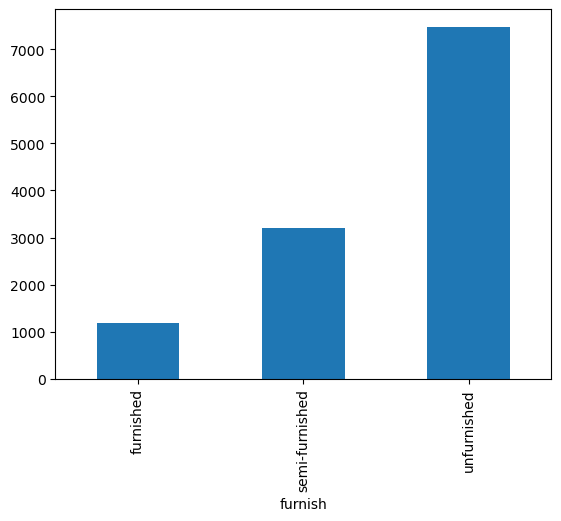

In [169]:
df['furnish'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

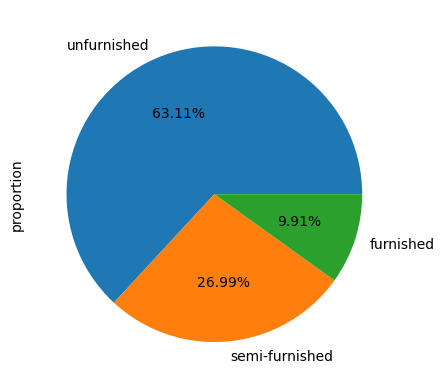

In [170]:
df['furnish'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### observation 
- 39 missing values
- unfurnished(63.10%) properties are more followed by semi-furnished(26.99%) and furnished(9.91%)

# area

In [171]:
df['area'].head()

0     635.0
1    1905.0
2     623.0
3     702.0
4     608.0
Name: area, dtype: float64

In [172]:
df['area'].isna().sum()

5

In [173]:
df['area'].value_counts()

area
650.0      225
750.0      207
450.0      186
700.0      175
600.0      144
400.0      144
800.0      141
850.0      130
550.0      117
500.0      115
1100.0     115
1200.0     112
900.0      109
1000.0      98
430.0       84
1050.0      77
950.0       76
680.0       68
1250.0      65
620.0       65
425.0       64
640.0       62
410.0       61
1150.0      61
350.0       57
420.0       57
740.0       54
1300.0      54
660.0       53
380.0       51
720.0       48
780.0       48
670.0       47
710.0       47
560.0       47
2000.0      47
440.0       46
690.0       43
480.0       43
610.0       42
630.0       41
470.0       41
770.0       41
675.0       40
580.0       39
2100.0      39
1800.0      38
570.0       38
760.0       38
1600.0      38
460.0       36
525.0       36
540.0       36
1500.0      35
435.0       35
415.0       35
520.0       35
840.0       35
625.0       34
575.0       34
300.0       34
590.0       34
1400.0      34
725.0       33
390.0       33
490.0       32
1450.

In [174]:
df['area'].describe()

count    11885.000000
mean       879.489272
std        697.552353
min        100.000000
25%        540.000000
50%        730.000000
75%       1036.000000
max      40852.000000
Name: area, dtype: float64

### observation 
- 5 missing values
- min area is 100 and max is 40852
- mean area is 879.45 and median is 730
- 75% properties have area less than 1036 and max area is 40852
- Standard deviation is 697.36; high variability. 

<Axes: xlabel='area', ylabel='Count'>

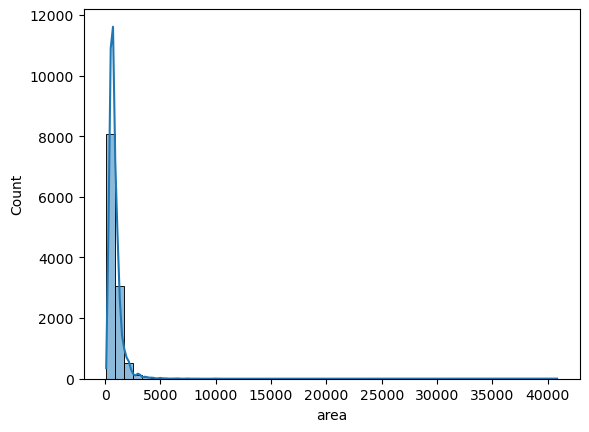

In [175]:
sns.histplot(df['area'],kde=True,bins=50)

### observation 
- The distribution is right-skewed, with most properties having lower area.
- A significant number of localities have area close to 1–1500.

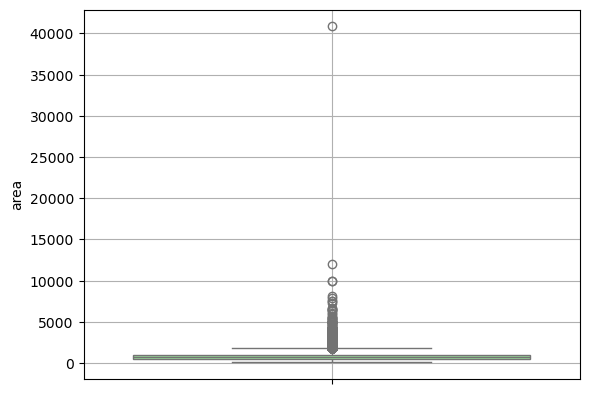

In [176]:
sns.boxplot(df['area'],color='lightgreen')
plt.grid()

### observation 
- only 1 outlier make the distribution heavily right-skewed
- the IOR(green box) lies between area 540 to 1036
- the median area is 730
- area above 1780 are outliers, with few reaching the max area 40852
- The distribution is right-skewed, as evident from the longer whisker on the upper side.
- Most data points are concentrated in the lower area range (1–1500).

In [177]:
#skewness and kurtosis
skewness = df['area'].skew()
kurtosis = df['area'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 18.548100210553702
kurtosis : 927.2478226943982


### observation 
- Skewness (18.55):  
  - Highly positively skewed.  
  - Indicates extreme values (outliers) on the higher end.  
- Kurtosis (927.63):  
  - Extremely high kurtosis.  
  - Suggests heavy tails with many extreme outliers.
  - leptokurtic distribution (high peak and heavy tails).
- Next Steps:  
  - Apply transformations (e.g., log or Box-Cox) to reduce skewness.  
  - Investigate and handle outliers to improve data quality.  

In [178]:
# Drop NaN values from the column
cleaned_data_area = df['area'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_area, 25)
Q3 = np.percentile(cleaned_data_area, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 540.0
Q3 (75th percentile): 1036.0
IQR: 496.0
Lower Whisker: -204.0
Upper Whisker: 1780.0


In [179]:
# Quantile Analysis
quantiles = df['area'].quantile([0.75,0.90,0.95,0.98,0.99,1.00])

quantiles

0.75     1036.00
0.90     1450.00
0.95     1869.80
0.98     2500.00
0.99     3114.72
1.00    40852.00
Name: area, dtype: float64

### observation 
- large jump between the 99th and 100th percentiles suggests extreme outliers in the data.

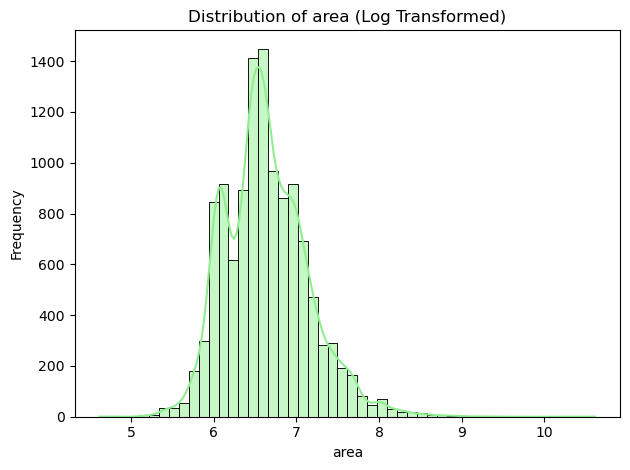

In [180]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['area']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of area (Log Transformed)')
plt.xlabel('area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation
- The distribution is roughly bell-shaped, centered around log-transformed values of 6.5–7.
- Most data points lie between 5.5 and 8, with a slight right-skew.
- The highest frequency bin has around 1400 observations.
- The KDE curve fits the histogram well, indicating a smooth distribution.
- A few outliers are present in the right tail (log-transformed values > 9).

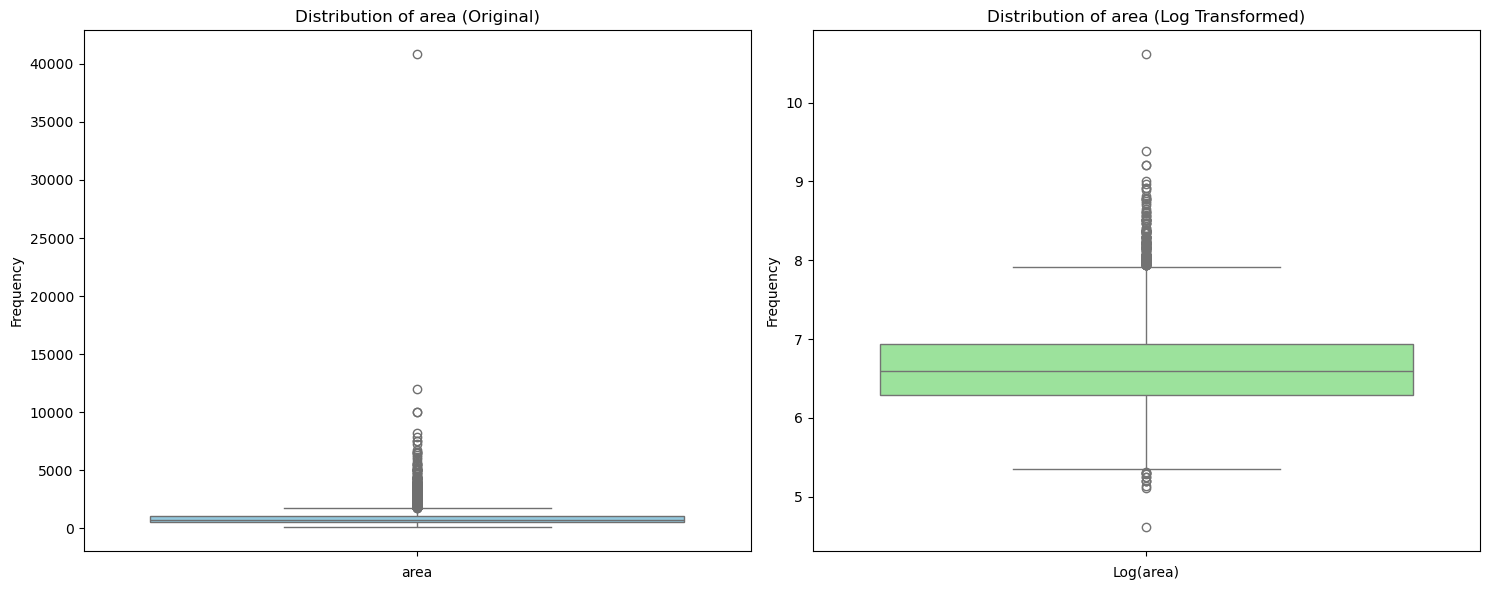

In [181]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['area'], color='skyblue')
plt.title('Distribution of area (Original)')
plt.xlabel('area')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['area']), color='lightgreen')
plt.title('Distribution of area (Log Transformed)')
plt.xlabel('Log(area)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation

- Original Data:
  - The area data is highly skewed with extreme outliers visible at the upper end.
  - Most values are clustered near the lower range.
- Log-Transformed Data:
  - The log transformation reduces skewness, condensing the range of values.
  - Outliers are still present but are less extreme and more interpretable.
  - The interquartile range (IQR) is more centralized, making the distribution more symmetric.

In [182]:
skewness = np.log1p(df['area']).skew()
kurtosis = np.log1p(df['area']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 0.6353947047222845
kurtosis : 1.190308650900632


### observation
- after log transformation skewness and kurtosis also get reduced
- A skewness value close to 0 indicates that the data is nearly symmetric.
- Close to normal distribution kurtosis less than 3, showing fewer extreme outliers

# property_type

In [183]:
df['property_type'].head()

0    new property
1    new property
2    new property
3    new property
4    new property
Name: property_type, dtype: object

In [184]:
df['property_type'].isna().sum()

3

In [185]:
df['property_type'].value_counts()

property_type
resale          6721
new property    5166
Name: count, dtype: int64

<Axes: xlabel='property_type'>

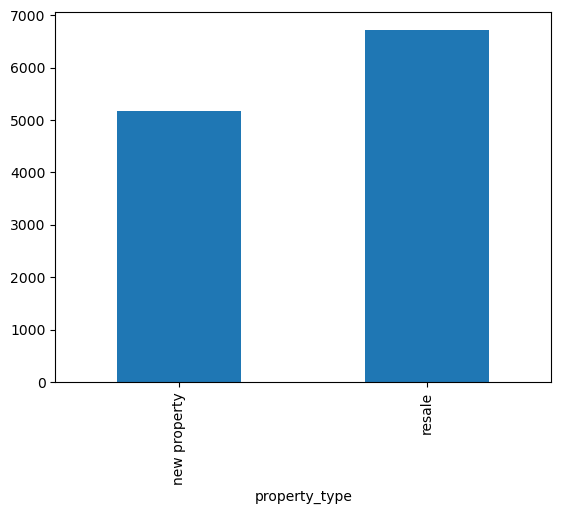

In [186]:
df['property_type'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

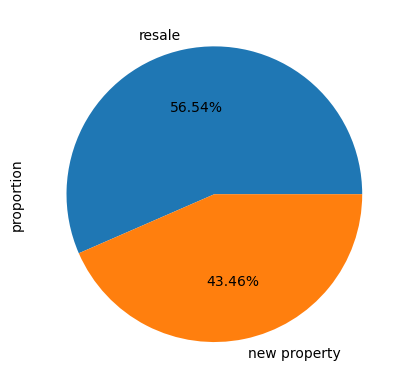

In [187]:
df['property_type'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### observation 
- 3 missing values 
- 56.50% data is resale
- 43.43% data is new property
- and remaining 0.069% is other,nan and rent properties 

# status

In [188]:
df['status'].head()

0    under construction
1    under construction
2    under construction
3    under construction
4    under construction
Name: status, dtype: object

In [189]:
df['status'].value_counts()

status
ready to move         7247
under construction    4557
ongoing                  3
Name: count, dtype: int64

In [190]:
df['status'].isna().sum()

83

<Axes: xlabel='status'>

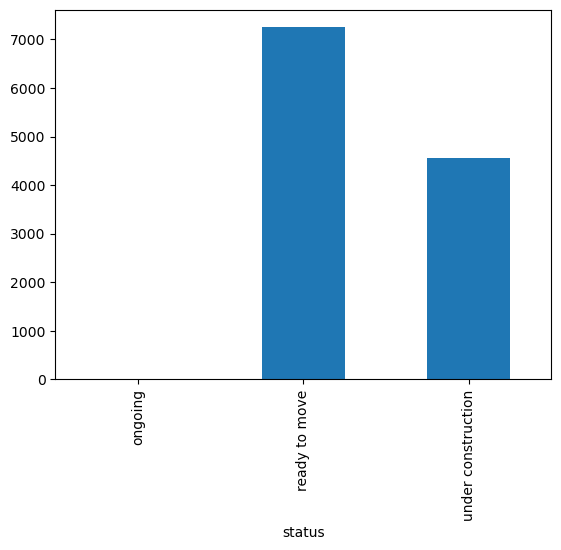

In [191]:
df['status'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

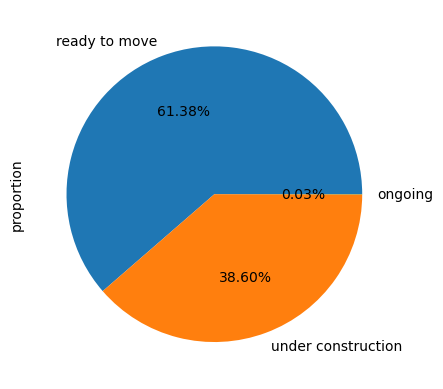

In [192]:
df['status'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### observation 
- 83 missing values
- 61.39% are ready to move properties
- 38.58% under construction properties
- 0.030 are ongoing,immediatly and nan properties 

# lift 

In [193]:
df['lift'].head()

0    4.0
1    4.0
2    2.0
3    NaN
4    3.0
Name: lift, dtype: float64

In [194]:
df['lift'].value_counts()

lift
2.0     2386
3.0     1333
4.0     1138
1.0      619
5.0      385
6.0      305
8.0       85
7.0       78
10.0      69
9.0       56
Name: count, dtype: int64

In [195]:
df['lift'].isna().sum()

5436

<Axes: xlabel='lift'>

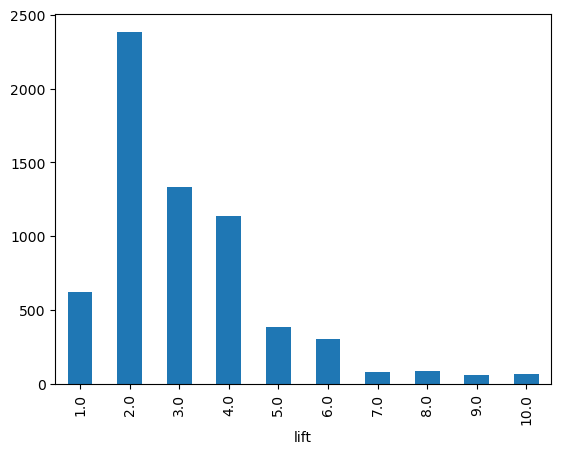

In [196]:
df['lift'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

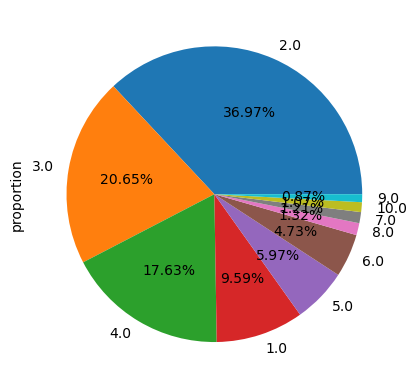

In [197]:
df['lift'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [198]:
df['lift'].value_counts(normalize=True).cumsum()

lift
2.0     0.369693
3.0     0.576232
4.0     0.752557
1.0     0.848466
5.0     0.908119
6.0     0.955377
8.0     0.968547
7.0     0.980632
10.0    0.991323
9.0     1.000000
Name: proportion, dtype: float64

### observation
- 5444 missing values 
- 36.97% properties have 2 lifts
- 84% properties have less than 4 lifts
- very few properties have more than 4 lifts
- no of lifts are ranges from 1 to 10

# flat_on_floor

In [199]:
df['flat_on_floor'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: flat_on_floor, dtype: float64

In [200]:
df['flat_on_floor'].isna().sum()

2292

In [201]:
df['flat_on_floor'].value_counts()

flat_on_floor
 3.0     677
 2.0     671
 5.0     637
 1.0     632
 4.0     604
 10.0    587
 7.0     560
 6.0     513
 9.0     388
 12.0    369
 8.0     363
 15.0    334
 11.0    318
 14.0    241
 20.0    228
 16.0    214
 18.0    201
 0.0     187
 13.0    174
 21.0    144
 17.0    144
 19.0    131
 22.0    125
 25.0    121
 23.0     97
-2.0      82
 30.0     81
 24.0     77
 27.0     63
 26.0     58
 28.0     42
 35.0     38
 40.0     37
 29.0     35
 33.0     32
 36.0     31
 32.0     30
 34.0     30
 50.0     29
 45.0     26
-1.0      24
 37.0     21
 38.0     19
 39.0     18
 41.0     17
 42.0     17
 31.0     17
 44.0     13
 47.0      9
 48.0      8
 60.0      8
 46.0      7
 43.0      7
 52.0      7
 62.0      6
 68.0      6
 55.0      6
 57.0      5
 56.0      4
 51.0      4
 70.0      3
 66.0      3
 49.0      3
 58.0      3
 54.0      3
 53.0      3
 61.0      2
 73.0      1
 75.0      1
 71.0      1
 65.0      1
Name: count, dtype: int64

In [202]:
df['flat_on_floor'].describe()

count    9598.000000
mean       10.871744
std        10.136616
min        -2.000000
25%         4.000000
50%         8.000000
75%        15.000000
max        75.000000
Name: flat_on_floor, dtype: float64

### observation 
- 2292 missing values
- min is -2 and max is 75(below ground there is -1 and -2 and ground floor is 0 and so on till 75th floor we have properties)
- mean is 10.86 and median is 8
- 75% properties are on below 15th floor and max is 75
- std dev is 10.13; high variability

In [203]:
df['flat_on_floor'].value_counts(normalize=True).cumsum()

flat_on_floor
 3.0     0.070536
 2.0     0.140446
 5.0     0.206814
 1.0     0.272661
 4.0     0.335591
 10.0    0.396749
 7.0     0.455095
 6.0     0.508543
 9.0     0.548969
 12.0    0.587414
 8.0     0.625234
 15.0    0.660033
 11.0    0.693165
 14.0    0.718275
 20.0    0.742030
 16.0    0.764326
 18.0    0.785268
 0.0     0.804751
 13.0    0.822880
 21.0    0.837883
 17.0    0.852886
 19.0    0.866535
 22.0    0.879558
 25.0    0.892165
 23.0    0.902271
-2.0     0.910815
 30.0    0.919254
 24.0    0.927277
 27.0    0.933840
 26.0    0.939883
 28.0    0.944259
 35.0    0.948218
 40.0    0.952073
 29.0    0.955720
 33.0    0.959054
 36.0    0.962284
 32.0    0.965409
 34.0    0.968535
 50.0    0.971557
 45.0    0.974265
-1.0     0.976766
 37.0    0.978954
 38.0    0.980934
 39.0    0.982809
 41.0    0.984580
 42.0    0.986351
 31.0    0.988123
 44.0    0.989477
 47.0    0.990415
 48.0    0.991248
 60.0    0.992082
 46.0    0.992811
 43.0    0.993540
 52.0    0.994270
 62.0    0.994

### observation 
- 90% properties are on this floor - 0 to 23 and 25 

<Axes: xlabel='flat_on_floor', ylabel='Count'>

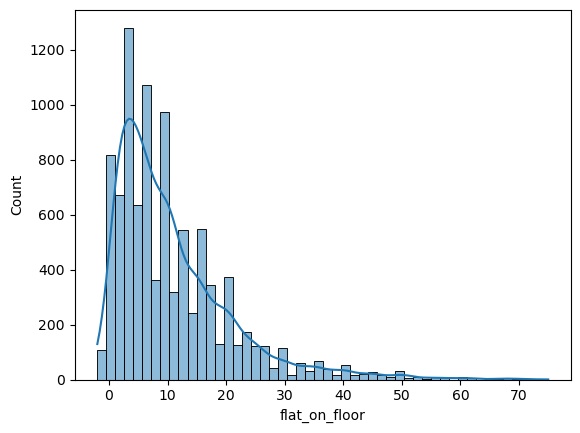

In [204]:
sns.histplot(df['flat_on_floor'],kde=True,bins=50)

### observation 
- Most flats are concentrated on lower floors (near 0–10).
- The distribution is right-skewed, with fewer flats on higher floors.
- There is a sharp peak around floor 1, indicating a large number of flats on the first floor.
- The data has outliers on higher floors.

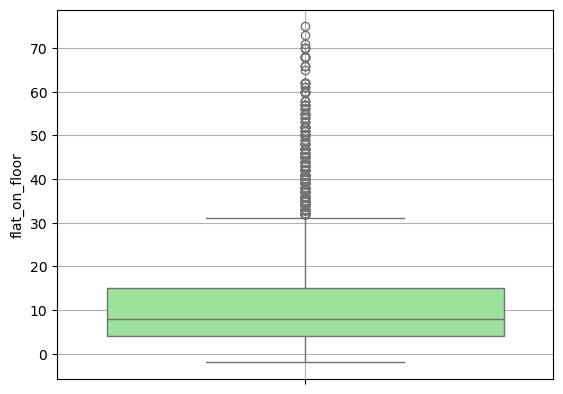

In [205]:
sns.boxplot(df['flat_on_floor'],color='lightgreen')
plt.grid()

### Observations:
- most flats are located on floors within a range of approximately 0–15.
- There are significant outliers above the upper whisker, indicating some flats are on very high floors.
- The interquartile range (IQR) is between floor 4 and floor 15.
- The median floor level is around 8.
- presence of outliers in higher floors.

In [206]:
#skewness and kurtosis
skewness = df['flat_on_floor'].skew()
kurtosis = df['flat_on_floor'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.8607822155680664
kurtosis : 4.732494419594865


### Observations:  
- Skewness (1.86): The data is moderately right-skewed, indicating a longer tail towards higher floor levels.  
- Kurtosis (4.73): The data has higher peakedness compared to a normal distribution, with significant outliers on higher floors.  

In [207]:
# Drop NaN values from the column
cleaned_data_flat_on_floor = df['flat_on_floor'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_flat_on_floor, 25)
Q3 = np.percentile(cleaned_data_flat_on_floor, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 4.0
Q3 (75th percentile): 15.0
IQR: 11.0
Lower Whisker: -12.5
Upper Whisker: 31.5


In [208]:
def signed_log1p(x):
    return np.sign(x) * np.log1p(abs(x))

In [209]:
transformed_flat_on_floor = df['flat_on_floor'].apply(signed_log1p)

A signed log transformation is a variation of the regular logarithmic transformation that allows us to handle both positive and negative values. It is typically used when we want to preserve the sign (positive or negative) of the values while applying a log-like transformation.

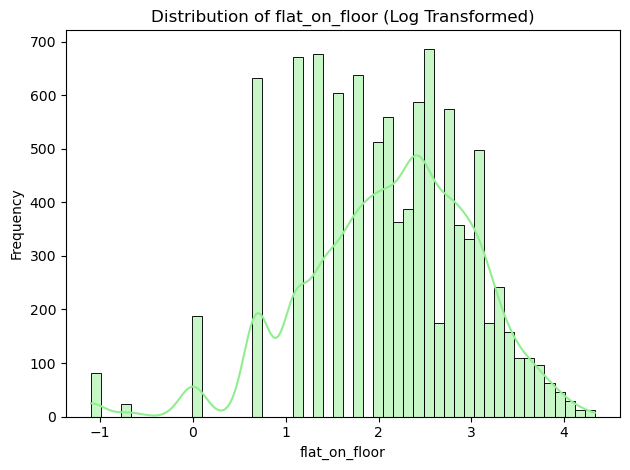

In [210]:
# Distribution plot with log transformation
sns.histplot(transformed_flat_on_floor,kde=True,bins=50,color='lightgreen')
plt.title('Distribution of flat_on_floor (Log Transformed)')
plt.xlabel('flat_on_floor')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
- Distribution is more symmetric, with reduced skewness.  
- Negative values handled effectively.  
- Outliers impact reduced.  
- Compressed range for better interpretation.  

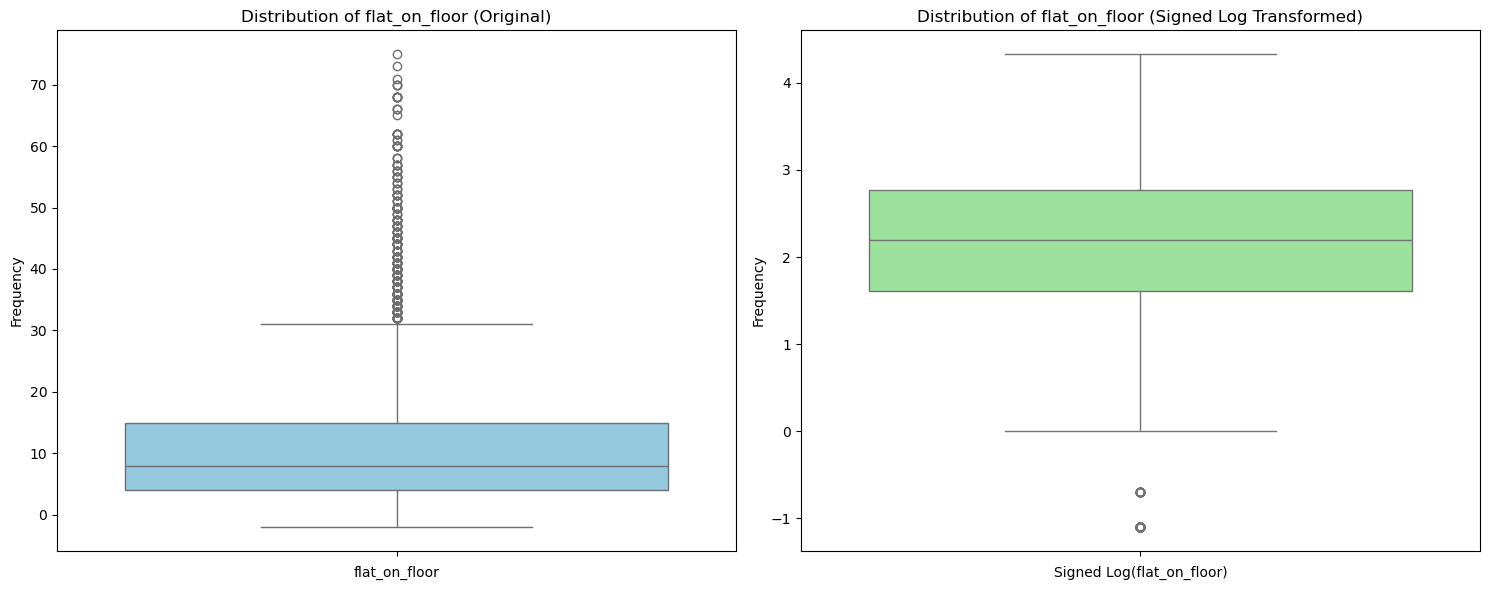

In [211]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['flat_on_floor'], color='skyblue')
plt.title('Distribution of flat_on_floor (Original)')
plt.xlabel('flat_on_floor')
plt.ylabel('Frequency')

# Distribution plot with signed log transformation
plt.subplot(1, 2, 2)
sns.boxplot(transformed_flat_on_floor, color='lightgreen')
plt.title('Distribution of flat_on_floor (Signed Log Transformed)')
plt.xlabel('Signed Log(flat_on_floor)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### observation 

- Left Plot (Original):  
  - Highly skewed distribution.  
  - Many upper outliers.  
  - Small interquartile range (IQR).  
- Right Plot (Signed Log Transformed):  
  - Reduced skewness, more symmetric.  
  - Fewer outliers, compressed range.  
  - Suitable for analyses requiring normality.  

In [212]:
skewness = transformed_flat_on_floor.skew()
kurtosis = transformed_flat_on_floor.kurt()
print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")


skewness : -0.5562196811169337
kurtosis : 0.5988185456041539


### observation:  
- Skewness: -0.556 (slightly negatively skewed, close to symmetric).  
- Kurtosis: 0.597 (close to normal kurtosis, indicating a moderate tail thickness).  
These values suggest the transformed data is relatively well-behaved for statistical analysis.

# total_floor

In [213]:
df['total_floor'].head()

0     NaN
1     NaN
2     NaN
3    23.0
4     NaN
Name: total_floor, dtype: float64

In [214]:
df['total_floor'].value_counts()

total_floor
7.0     1017
4.0      554
22.0     541
20.0     378
23.0     330
14.0     319
15.0     310
8.0      288
16.0     277
12.0     276
21.0     258
18.0     242
3.0      241
30.0     222
40.0     221
13.0     211
5.0      199
6.0      199
17.0     171
35.0     154
9.0      152
36.0     150
10.0     148
24.0     141
28.0     140
19.0     137
45.0     136
25.0     134
27.0     132
11.0     121
29.0     121
50.0     119
42.0     103
33.0      98
38.0      98
31.0      97
32.0      89
37.0      83
60.0      80
34.0      76
39.0      75
26.0      68
2.0       49
41.0      48
44.0      47
47.0      47
61.0      47
51.0      45
46.0      44
55.0      41
49.0      41
43.0      39
63.0      31
48.0      30
65.0      30
78.0      28
67.0      28
54.0      27
57.0      25
62.0      23
53.0      22
69.0      21
52.0      21
68.0      20
75.0      19
58.0      18
72.0      17
56.0      16
77.0      16
1.0       15
70.0      14
64.0      13
66.0      11
76.0       6
59.0       6
81.0       4


In [215]:
df['total_floor'].isna().sum()

2059

In [216]:
df['total_floor'].describe()

count    9831.000000
mean       22.183501
std        16.215634
min         1.000000
25%         8.000000
50%        19.000000
75%        30.000000
max        92.000000
Name: total_floor, dtype: float64

### observation 
- column for how many floor building has 
- 2059 missing values
- min is 1 and max is 92
- mean is 22.18 and median is 19
- 75% properties are on below 30th floor and max is 92
- std dev is 16.21; high variability

In [217]:
df['total_floor'].value_counts(normalize=True).cumsum()

total_floor
7.0     0.103448
4.0     0.159801
22.0    0.214831
20.0    0.253280
23.0    0.286848
14.0    0.319296
15.0    0.350829
8.0     0.380124
16.0    0.408300
12.0    0.436375
21.0    0.462618
18.0    0.487234
3.0     0.511749
30.0    0.534330
40.0    0.556810
13.0    0.578273
5.0     0.598515
6.0     0.618757
17.0    0.636151
35.0    0.651816
9.0     0.667277
36.0    0.682535
10.0    0.697589
24.0    0.711932
28.0    0.726172
19.0    0.740108
45.0    0.753942
25.0    0.767572
27.0    0.780999
11.0    0.793307
29.0    0.805615
50.0    0.817719
42.0    0.828197
33.0    0.838165
38.0    0.848133
31.0    0.858000
32.0    0.867053
37.0    0.875496
60.0    0.883633
34.0    0.891364
39.0    0.898993
26.0    0.905910
2.0     0.910894
41.0    0.915777
44.0    0.920557
47.0    0.925338
61.0    0.930119
51.0    0.934696
46.0    0.939172
55.0    0.943342
49.0    0.947513
43.0    0.951480
63.0    0.954633
48.0    0.957685
65.0    0.960736
78.0    0.963585
67.0    0.966433
54.0    0.969179
57

In [218]:
# Compute cumulative sum of normalized value counts
cumulative_sum = df['total_floor'].value_counts(normalize=True).cumsum()

# Filter values where cumulative sum is <= 90%
filtered_numbers = cumulative_sum[cumulative_sum <= 0.9].index.tolist()

# Sort the filtered numbers
sorted_numbers = sorted(filtered_numbers)

print(sorted_numbers)

[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 42.0, 45.0, 50.0, 60.0]


### observation 
- 90% of the projects consist of buildings with 3 to 40 floors, along with specific buildings having 42, 45, 50, and 60 floors.

<Axes: xlabel='total_floor', ylabel='Count'>

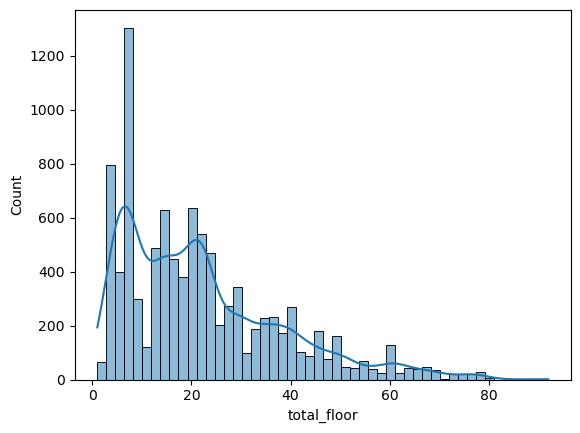

In [219]:
sns.histplot(df['total_floor'],kde=True,bins=50)

### observation 
- Most projects are concentrated on lower floors (near 1–25).
- The distribution is right-skewed, with fewer projects are of higher floors.
- There is a sharp peak around 7 floor building, indicating most of the buildings are of 7 floor
- The data has outliers for higher floors.

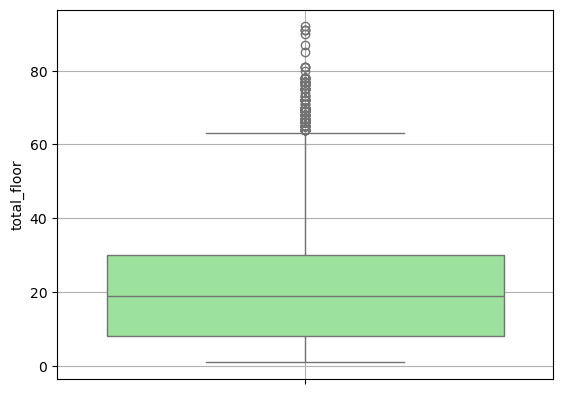

In [220]:
sns.boxplot(df['total_floor'],color='lightgreen')
plt.grid()

### Observations:
- most projects are located on floors within a range of approximately 0–30.
- There are significant outliers above the upper whisker, indicating some flats are of many floors.
- The interquartile range (IQR) is between floor 8 and floor 30.
- The median project floor level is around 19.
- presence of outliers in higher flat floors.

In [221]:
#skewness and kurtosis
skewness = df['total_floor'].skew()
kurtosis = df['total_floor'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.1163399744362896
kurtosis : 0.9331291145038825


### Observations:

- Skewness: 1.1165:  
  - The data is moderately positively skewed, indicating that more projects are concentrated at lower floor levels, with a few extreme values on higher floors causing a longer right tail.  
- Kurtosis: 0.9350  
  - The data is platykurtic (kurtosis < 3), with lighter tails and fewer extreme outliers.  

In [222]:
# Drop NaN values from the column
cleaned_data_total_floor = df['total_floor'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_total_floor, 25)
Q3 = np.percentile(cleaned_data_total_floor, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 8.0
Q3 (75th percentile): 30.0
IQR: 22.0
Lower Whisker: -25.0
Upper Whisker: 63.0


In [223]:
# Quantile Analysis
quantiles = df['total_floor'].quantile([0.10,0.75,0.80,0.90,0.95,0.98,0.99,1.00])

quantiles

0.10     5.0
0.75    30.0
0.80    35.0
0.90    45.0
0.95    55.0
0.98    66.0
0.99    72.0
1.00    92.0
Name: total_floor, dtype: float64

### observation 
- 80% of the projects have less than 35 floors

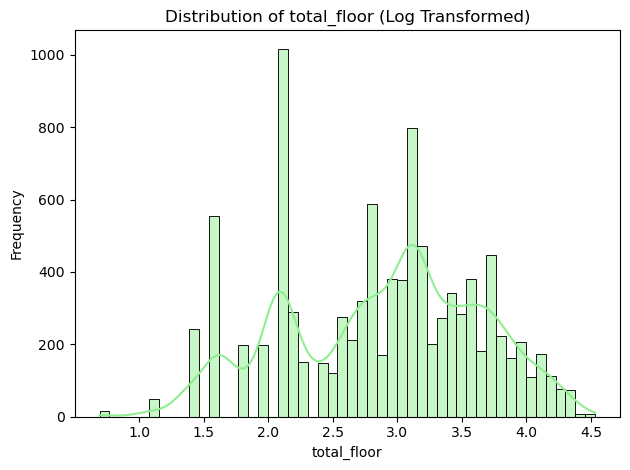

In [224]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['total_floor']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of total_floor (Log Transformed)')
plt.xlabel('total_floor')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
- Distribution is more symmetric, with reduced skewness.  
- Negative values handled effectively.  
- Outliers impact reduced.  
- Compressed range for better interpretation.  

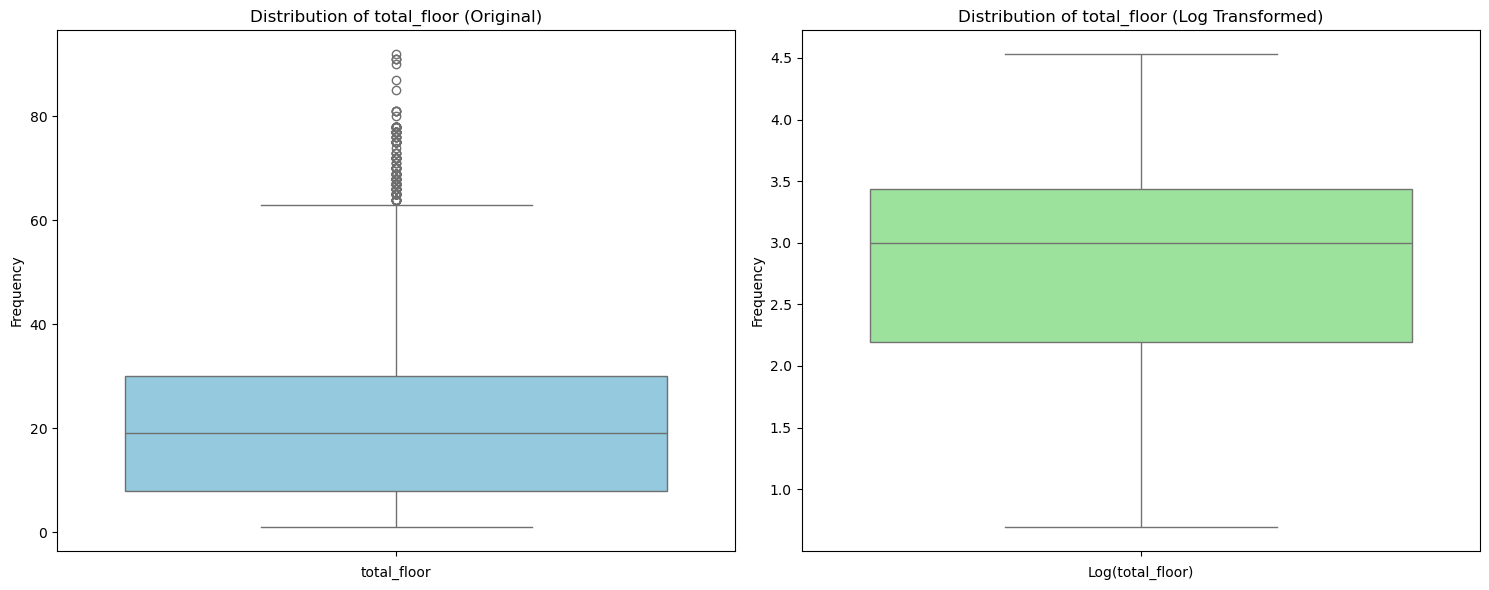

In [225]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['total_floor'], color='skyblue')
plt.title('Distribution of total_floor (Original)')
plt.xlabel('total_floor')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['total_floor']), color='lightgreen')
plt.title('Distribution of total_floor (Log Transformed)')
plt.xlabel('Log(total_floor)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 

- Left Plot (Original):  
  - Highly skewed distribution.  
  - Many upper outliers.   
- Right Plot:  
  - Reduced skewness, more symmetric.  
  - Fewer outliers, compressed range.  
  - Suitable for analyses requiring normality.  

In [226]:
skewness = np.log1p(df['total_floor']).skew()
kurtosis = np.log1p(df['total_floor']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -0.25461650165009103
kurtosis : -0.7266101955921487


### observation:

- Skewness (-0.25): Data is slightly negatively skewed, with a minor left tail, close to symmetric.  
- Kurtosis (-0.73): Platykurtic distribution with flatter peaks and lighter tails.  

# facing

In [227]:
df['facing'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: facing, dtype: object

In [228]:
df['facing'].value_counts()

facing
east            4736
north - east    1264
west             916
north            665
north - west     192
south -west      133
south - east     128
south            126
Name: count, dtype: int64

In [229]:
df['facing'].isna().sum()

3730

<Axes: xlabel='facing'>

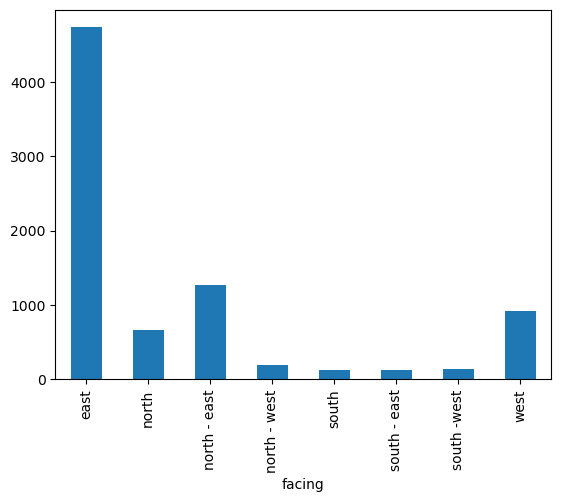

In [230]:
df['facing'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

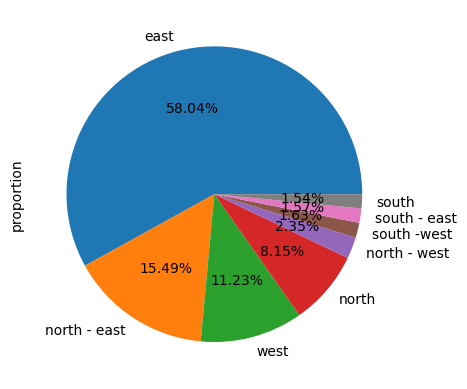

In [231]:
df['facing'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### observation 
- 3738 missing values
- 58.04% properties have east facing followed by north-est(15.49%) and west(11.23%)
- all other facing are less than 10%

# lattitude 

In [232]:
df['lattitude'].head()

0    19.207777
1    19.080605
2    19.248778
3    19.138704
4    19.055308
Name: lattitude, dtype: float64

In [233]:
df['lattitude'].value_counts()

lattitude
19.205002    235
19.119677    230
19.174954    206
19.227262    186
19.282975    176
18.989401    176
19.115491    167
19.194035    158
19.163092    140
19.210131    139
19.045918    134
19.137370    129
19.003649    125
19.232162    119
19.079070    118
19.065672    106
19.233532    104
18.986562     97
19.015859     90
19.215866     89
19.180237     87
18.976305     85
19.062055     80
19.218154     79
19.208310     75
19.149901     75
19.130346     75
19.251692     74
19.282927     73
19.132720     73
19.221466     69
19.013532     69
19.156211     63
19.012216     59
19.188973     56
18.975094     54
19.159008     52
19.184872     51
19.100463     49
19.013492     49
19.110489     48
19.079998     48
19.061164     47
19.162992     44
18.998243     40
19.055229     40
19.200741     39
19.090806     39
19.038812     37
19.200484     37
19.047322     37
19.153103     36
19.081256     35
18.998269     35
19.463877     34
19.089410     34
19.034973     32
19.399540     32
19.0

In [234]:
df['lattitude'].isna().sum()

463

In [235]:
df['lattitude'].describe()

count    11427.000000
mean        19.153596
std          0.735201
min          9.209138
25%         19.062055
50%         19.143882
75%         19.210299
max         72.875061
Name: lattitude, dtype: float64

### observation 
- 466 missing values
- 19.15, close to the median, indicating data is symmetrically distributed.
- std-dev 0.735, showing low variability within most of the data.
- 9.21, indicating a small subset of data significantly lower than the mean.
- 72.88, showing extreme outliers far above the upper whisker.
- 19.06, tightly packed with the 75th Percentile (Q3): 19.21, confirming low IQR.
- Data is heavily skewed due to the extreme max value.

<Axes: xlabel='lattitude', ylabel='Count'>

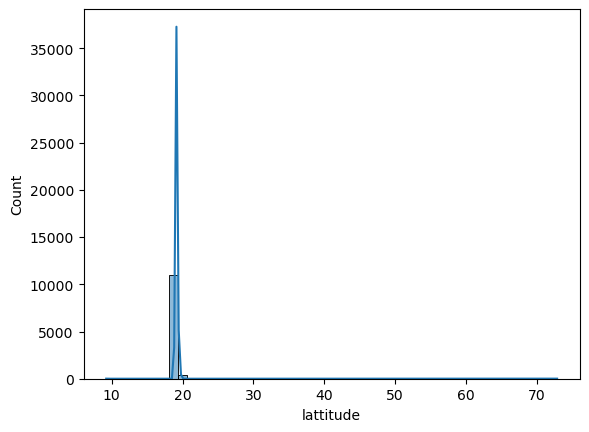

In [236]:
sns.histplot(df['lattitude'],kde=True,bins=50)

### observation
- The latitude distribution is highly concentrated between 19 and 20.  
- The data is heavily skewed, with minimal values beyond 20.  
- Indicates the dataset is focused on a specific geographical region.

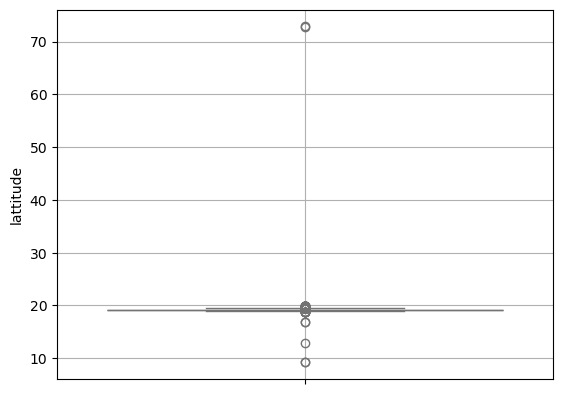

In [237]:
sns.boxplot(df['lattitude'],color='lightgreen')
plt.grid()

### observation 
- Values outside the whiskers are considered outliers.
- The latitude data is concentrated within a narrow interquartile range (IQR) near 10–20.
- The median latitude lies close to 19.

In [238]:
#skewness and kurtosis
skewness = df['lattitude'].skew()
kurtosis = df['lattitude'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 67.69963542578984
kurtosis : 4984.763576632709


### observation 
- Skewness (67.71): Extremely positively skewed distribution with a long right tail.  
- Kurtosis (4986.76): Highly leptokurtic, with a sharp peak and heavy tails.  
- Most values are concentrated between 10°–20°, with a few extreme outliers above 50°.  
- Indicates the need for transformations (e.g., log, Box-Cox) or outlier treatment.

In [239]:
# Drop NaN values from the column
cleaned_data_lattitude = df['lattitude'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_lattitude, 25)
Q3 = np.percentile(cleaned_data_lattitude, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 19.062055421515
Q3 (75th percentile): 19.2102986684535
IQR: 0.14824324693849888
Lower Whisker: 18.839690551107253
Upper Whisker: 19.43266353886125


# longitude 

In [240]:
df['longitude'].head()

0    72.967479
1    73.073939
2    72.863793
3    72.859964
4    72.922850
Name: longitude, dtype: float64

In [241]:
df['longitude'].value_counts()

longitude
72.869271    287
72.905081    230
72.943104    206
72.863440    186
73.117516    176
72.873618    176
72.872695    167
72.825756    158
72.839809    140
72.830501    139
72.897523    134
72.825723    129
72.817525    125
72.987369    119
72.907976    118
73.059612    106
72.839198    104
72.818287     97
72.829525     90
72.991437     89
72.855415     87
72.838445     85
72.854136     80
72.993664     79
72.931134     75
72.934955     75
72.972447     75
72.972820     74
72.862788     73
72.825662     73
72.963282     69
72.860300     69
72.875809     63
72.860459     59
72.822006     56
73.052334     54
72.862970     51
73.017671     49
72.849244     49
72.899191     48
72.854502     48
72.894841     47
72.839302     44
72.830829     40
72.827031     40
72.877501     39
72.907667     39
72.841965     37
73.069905     37
72.874927     37
72.967805     36
72.841043     35
72.837660     35
72.782299     34
72.938926     34
72.943104     33
72.860416     32
73.022280     32
72.8

In [242]:
df['longitude'].isna().sum()

463

In [243]:
df['longitude'].describe()

count    11427.000000
mean        72.896421
std          0.715907
min         19.024462
25%         72.839809
50%         72.872695
75%         72.963374
max         74.021019
Name: longitude, dtype: float64

### observation 
- mean close to median indicating data is symmetrically distributed
- std-dev 0.716, showing relatively low variability within the dataset.
- 19.02, an extreme outlier far below the majority of values.
- 74.02, close to the mean, suggesting no extreme positive outliers.
- 25th Percentile (Q1): 72.84 and 75th Percentile (Q3): 72.96, with a narrow IQR of approximately 0.12, indicating tightly packed data.
- The outlier at the lower bound (19.02) significantly skews the distribution.

<Axes: xlabel='longitude', ylabel='Count'>

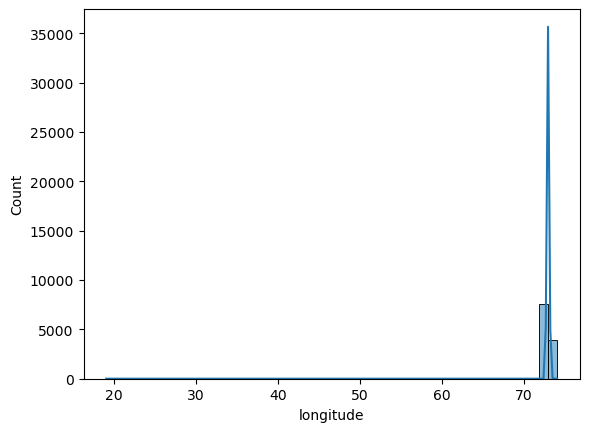

In [244]:
sns.histplot(df['longitude'],kde=True,bins=50)

### observation 
- Majority of longitude values are concentrated near 70.
- Sparse distribution of values below 70.
- Outliers or minimal data points in lower longitude ranges.

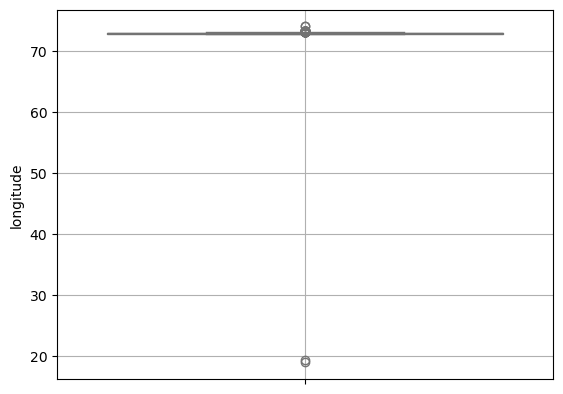

In [245]:
sns.boxplot(df['longitude'],color='lightgreen')
plt.grid()

### observation 
- Most longitude values lie within a narrow range near the upper end (around 70).
- A few outliers are present, significantly lower than the main cluster (around 20).

In [246]:
#skewness and kurtosis
skewness = df['longitude'].skew()
kurtosis = df['longitude'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -73.87961555425066
kurtosis : 5540.903540098382


### observation 
- Skewness (-73.89):  
  - The negative skewness indicates a strong left-skewed distribution.
  - This aligns with the presence of outliers at the lower longitude range, as seen in the boxplot.
- Kurtosis (5543.30):
  - The extremely high kurtosis value suggests the distribution has heavy tails and a sharp peak.
  - This indicates most of the data is tightly concentrated near the central value (around 70), with a few extreme outliers contributing to the heavy tails.
- Indicates the need for transformations (e.g., log, Box-Cox) or outlier treatment.

In [247]:
# Drop NaN values from the column
cleaned_data_longitude = df['longitude'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_longitude, 25)
Q3 = np.percentile(cleaned_data_longitude, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 72.8398088005091
Q3 (75th percentile): 72.96337375843945
IQR: 0.12356495793034128
Lower Whisker: 72.65446136361359
Upper Whisker: 73.14872119533496


# seller

In [248]:
df['seller'].head()

0       organization
1    realestateagent
2       organization
3       organization
4       organization
Name: seller, dtype: object

In [249]:
df['seller'].value_counts()

seller
realestateagent    8113
person             3417
organization        360
Name: count, dtype: int64

In [250]:
df['seller'].isna().sum()

0

<Axes: xlabel='seller'>

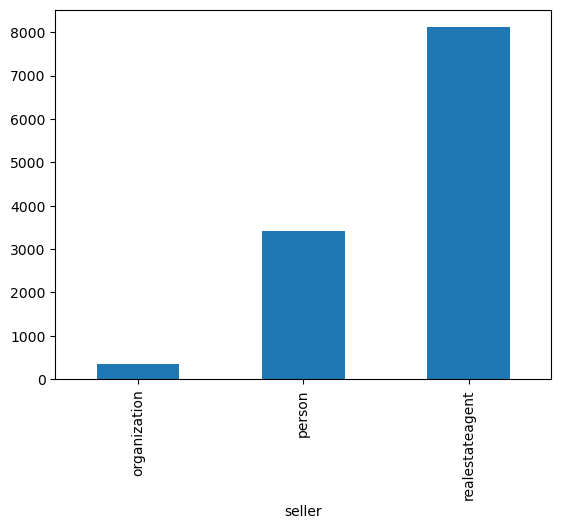

In [251]:
df['seller'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

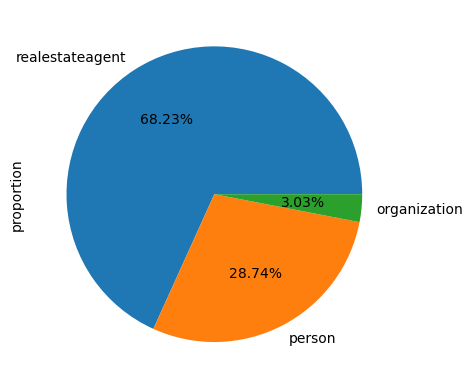

In [252]:
df['seller'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### Observations:
- The column represents the entity responsible for selling the property.  
- There are no missing values in this column.  
- 68.19% of properties are listed by estate agents acting as brokers to facilitate sales.  
- 28.79% of properties are being sold directly by individuals (could be owners or estate agents as well).  
- 3.03% of properties are listed for sale by organizations.  

# emi

In [253]:
df['emi'].head()

0    0.81
1    1.07
2    0.81
3    0.74
4    0.57
Name: emi, dtype: float64

In [254]:
df['emi'].value_counts()

emi
0.41000     173
0.50000     169
0.56000     165
0.32000     164
0.90000     162
0.45000     160
0.54000     152
0.63000     149
0.81000     145
1.13000     142
0.43000     142
0.68000     137
0.34000     135
0.79000     133
0.27000     130
0.52000     125
0.14000     124
0.59000     123
0.61000     120
0.36000     120
0.77000     120
1.04000     119
0.72000     119
0.86000     118
0.83000     117
0.29000     117
0.38000     117
1.01000     116
0.18000     114
0.95000     111
1.35000     110
1.58000     108
0.16000     108
0.47000     107
0.74000     106
0.20000     104
0.23000     101
0.25000      98
0.65000      95
0.31000      91
1.24000      91
0.28000      91
0.70000      90
1.80000      88
0.88000      87
0.99000      85
0.40000      81
1.47000      78
0.44000      77
0.97000      77
2.03000      77
1.08000      76
1.26000      75
0.19000      75
1.06000      74
1.22000      73
1.17000      73
0.37000      66
2.93000      62
1.40000      61
0.11000      60
0.17000      60
2.48

In [255]:
df['emi'].isna().sum()

2

In [256]:
df['emi'].describe()

count    11888.000000
mean         1.311344
std          1.909994
min          0.007450
25%          0.430000
50%          0.800000
75%          1.440000
max         36.080000
Name: emi, dtype: float64

### observation 
- EMI values for flat purchases, measured in lakhs.
- 2 missing values
- EMIs range from ₹745 (min) to ₹36.08 lakh (max).
- Mean EMI is ₹1.31 lakh; median is ₹0.80 lakh.
- 75% of borrowers have an EMI of ₹1.44 lakh (₹1,44,000) or less.
- High standard deviation (₹1.91 lakh) indicates wide variation.
- Data is right-skewed, with some very high EMIs.

<Axes: xlabel='emi', ylabel='Count'>

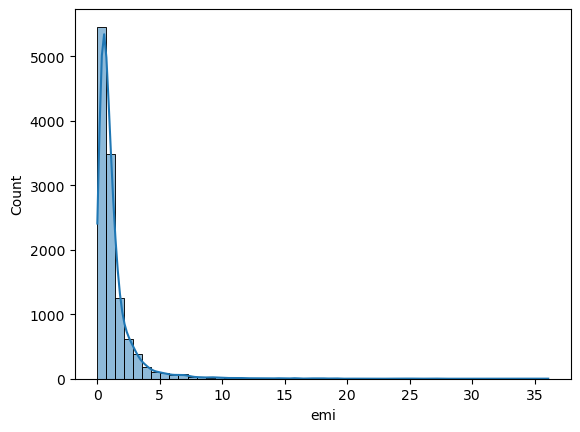

In [257]:
sns.histplot(df['emi'],kde=True,bins=50)

### observation
- Most borrowers pay lower EMIs, likely below ₹2 lakh.
- The tail includes outliers, such as the maximum EMI of ₹36.08 lakh.
- A log transformation or outlier handling might be useful for further analysis.

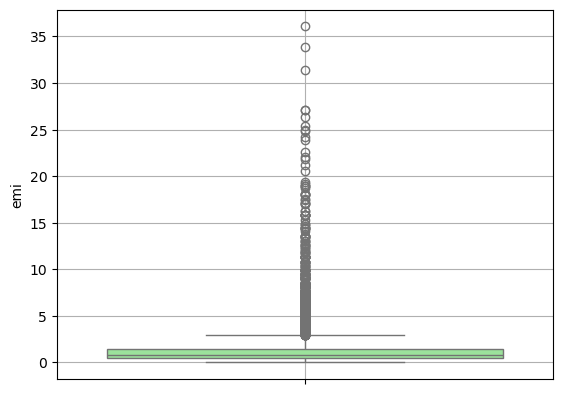

In [258]:
sns.boxplot(df['emi'],color='lightgreen')
plt.grid()

### observation 
- significant right skewness in the data.
- outliers are beyond the upper whisker, including extreme values like ₹36.08 lakh.
- The box (IQR) is narrow, indicating that the middle 50% of data points (25th to 75th percentile) are tightly packed between ₹0.43 lakh and ₹1.44 lakh.
- median EMI (₹0.80 lakh) lies closer to the lower quartile, reflecting the skewed distribution.

In [259]:
#skewness and kurtosis
skewness = df['emi'].skew()
kurtosis = df['emi'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 6.204434306436193
kurtosis : 61.10009798986476


### observation 
- Skewness (6.21): Highly right-skewed distribution with a long tail of high EMI values.
- Kurtosis (61.13): Leptokurtic distribution with a sharp peak and heavy tails, indicating many outliers.

In [260]:
# Drop NaN values from the column
cleaned_data_emi = df['emi'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_emi, 25)
Q3 = np.percentile(cleaned_data_emi, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 0.43
Q3 (75th percentile): 1.44
IQR: 1.01
Lower Whisker: -1.0850000000000002
Upper Whisker: 2.955


In [261]:
# Quantile Analysis
quantiles = df['emi'].quantile([0.10,0.75,0.80,0.90,0.95,0.98,0.99,1.00])

quantiles

0.10     0.24
0.75     1.44
0.80     1.69
0.90     2.71
0.95     3.95
0.98     6.73
0.99     9.47
1.00    36.08
Name: emi, dtype: float64

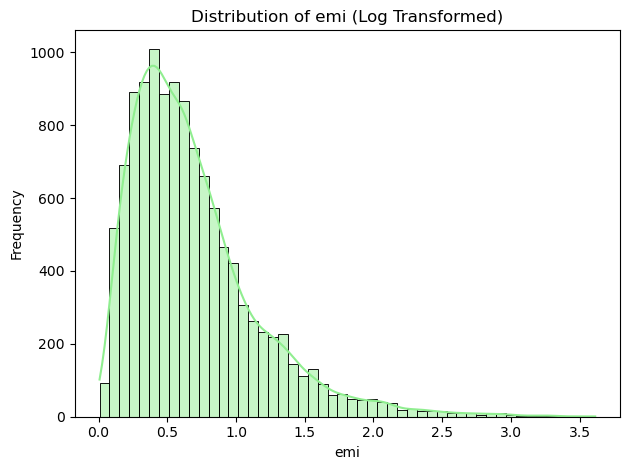

In [262]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['emi']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of emi (Log Transformed)')
plt.xlabel('emi')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
- After applying a log transformation, the EMI distribution becomes closer to normal, reducing skewness.
- The transformed data shows a more balanced spread, with fewer extreme values dominating the tail.

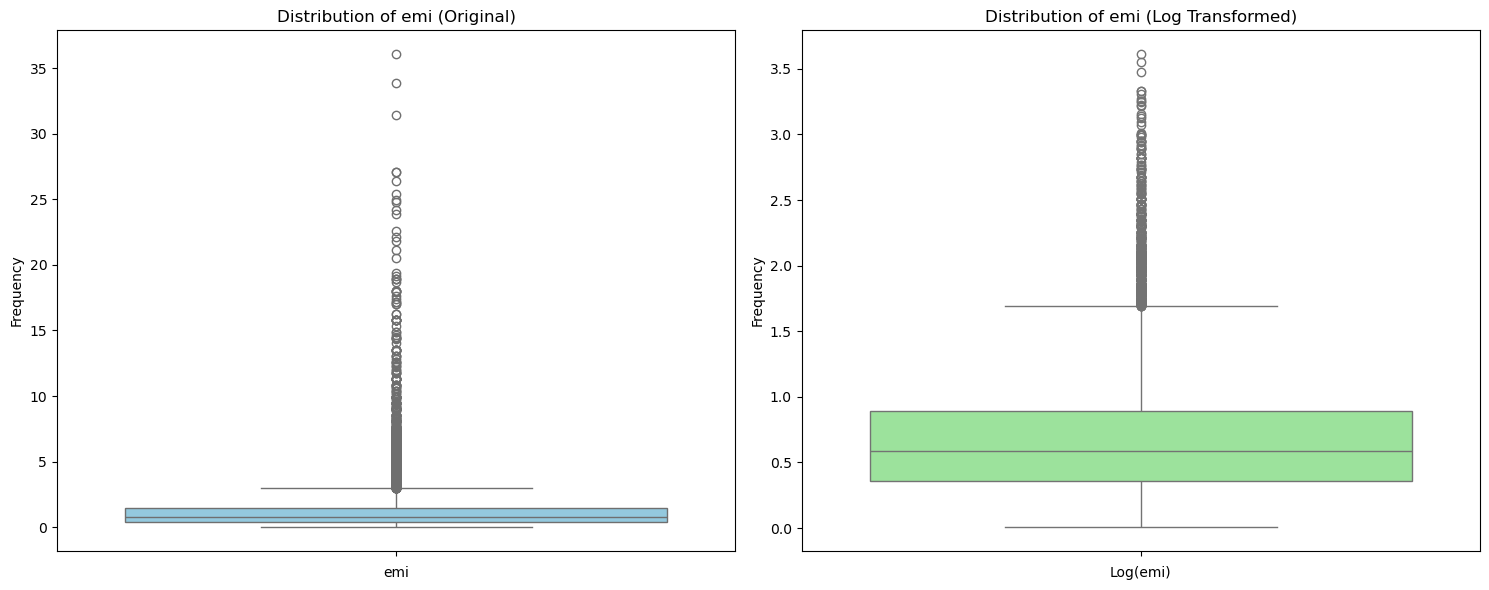

In [263]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['emi'], color='skyblue')
plt.title('Distribution of emi (Original)')
plt.xlabel('emi')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['emi']), color='lightgreen')
plt.title('Distribution of emi (Log Transformed)')
plt.xlabel('Log(emi)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
Bottom Left: Original EMI Boxplot  
- The original EMI data exhibits significant skewness with many outliers beyond the upper whisker.  
- Extreme values like ₹36.08 lakh are visible as outliers, affecting the overall distribution.  
Bottom Right: Log-Transformed EMI Boxplot  
- The log transformation reduces the number of visible outliers, compressing the scale of high EMI values.  
- The median and IQR are now more representative of the data, providing a clearer picture of central tendency and variability.  

In [264]:
skewness = np.log1p(df['emi']).skew()
kurtosis = np.log1p(df['emi']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.5749085521805417
kurtosis : 3.556317270640631


### observation 
- Skewness (1.58): Reduced after log transformation, now moderately right-skewed.
- Kurtosis (3.56): Close to normal distribution, with reduced outlier influence.

# project_in_acres

In [265]:
df['project_in_acres'].head()

0     1.3006
1    17.0000
2     1.0000
3     1.0000
4     2.0000
Name: project_in_acres, dtype: float64

In [266]:
df['project_in_acres'].value_counts()

project_in_acres
1.0000        1288
2.0000         788
3.0000         516
4.0000         418
6.0000         284
5.0000         282
8.0000         212
7.0000         204
27.0000        133
40.0000        122
18.0000        114
10.0000        103
12.0000         92
32.0000         90
17.0000         87
14.0000         71
250.0000        62
36.0000         60
9.0000          59
16.0000         48
22.0000         44
105.0000        41
25.0000         39
15.0000         39
0.2617          36
30.0000         34
3.0493          31
11.0000         29
20.0000         27
68.0000         26
1.1246          25
13.0000         25
0.0000          25
0.3049          19
0.5807          19
23.0000         19
0.2400          17
0.5141          15
125.0000        14
50.0000         14
1.3006          14
1.2009          13
0.3459          13
1093.0000       12
0.7413          11
0.3800          11
19.0000         11
0.2298          10
7.7425          10
19.9394         10
2.5252          10
49.0000       

In [267]:
df['project_in_acres'].isna().sum()

5750

In [268]:
df['project_in_acres'].describe()

count     6140.000000
mean        27.380905
std        729.023908
min          0.000000
25%          1.000000
50%          3.000000
75%          8.499900
max      55000.000000
Name: project_in_acres, dtype: float64

### observation 
- project built on the land in acres
- 5758 missing values
- ranges from 0 to 55000
- mean is 27.38 acre and median is 3 acre
- 75% properties have built on land 8.49acre or less
- high std-dev indicates high variation
- data is right skewed with extreme high acres values 

<Axes: xlabel='project_in_acres', ylabel='Count'>

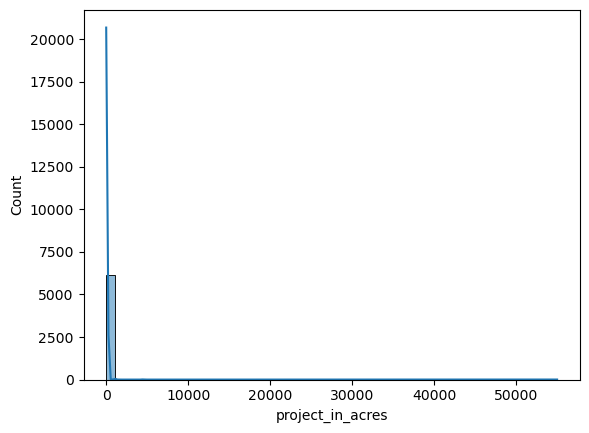

In [269]:
sns.histplot(df['project_in_acres'],kde=True,bins=50)

### observation 
- Highly right-skewed.  
  Most projects have small acre land.  
- few projects with extremely high acre land (>10,000 acres).  
- Large variation in project sizes.

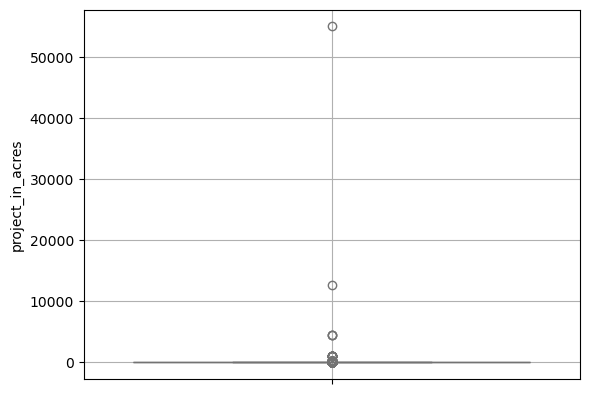

In [270]:
sns.boxplot(df['project_in_acres'],color='lightgreen')
plt.grid()

### observation 
- Extreme values above 10,000 acres 
- most data concentrated near lower values.  
- High range with a few projects occupying vast land.

In [271]:
#skewness and kurtosis
skewness = df['project_in_acres'].skew()
kurtosis = df['project_in_acres'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 70.82665031040976
kurtosis : 5283.908363367851


### observation 
- Skewness: 70.83, highly right-skewed distribution.  
- Kurtosis: 5283.91, sharp peaks and heavy tails due to outliers.  
- Data has extreme outliers, requiring transformation or outlier handling.  

In [272]:
# Drop NaN values from the column
cleaned_data_project_in_acres = df['project_in_acres'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_project_in_acres, 25)
Q3 = np.percentile(cleaned_data_project_in_acres, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 1.0
Q3 (75th percentile): 8.4999
IQR: 7.4999
Lower Whisker: -10.24985
Upper Whisker: 19.74975


In [273]:
# Quantile Analysis
quantiles = df['project_in_acres'].quantile([0.10,0.75,0.80,0.90,0.95,0.98,0.99,1.00])

quantiles

0.10        1.0000
0.75        8.4999
0.80       13.0000
0.90       27.0000
0.95       40.0000
0.98      125.0000
0.99      250.0000
1.00    55000.0000
Name: project_in_acres, dtype: float64

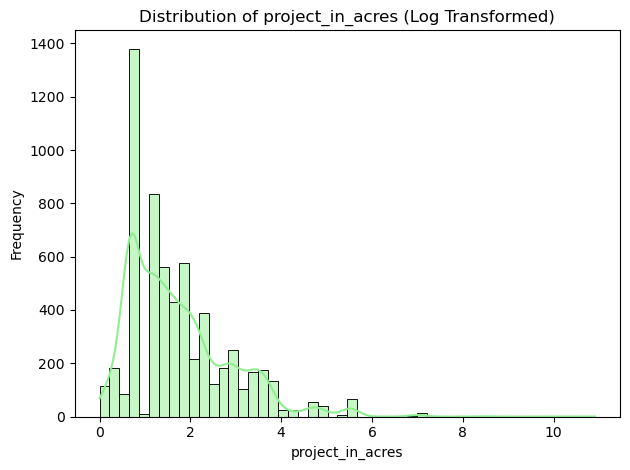

In [274]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['project_in_acres']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of project_in_acres (Log Transformed)')
plt.xlabel('project_in_acres')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
- Reduces skewness, making distribution more normal-like.  
- Majority of projects fall in lower acreage categories after transformation.  

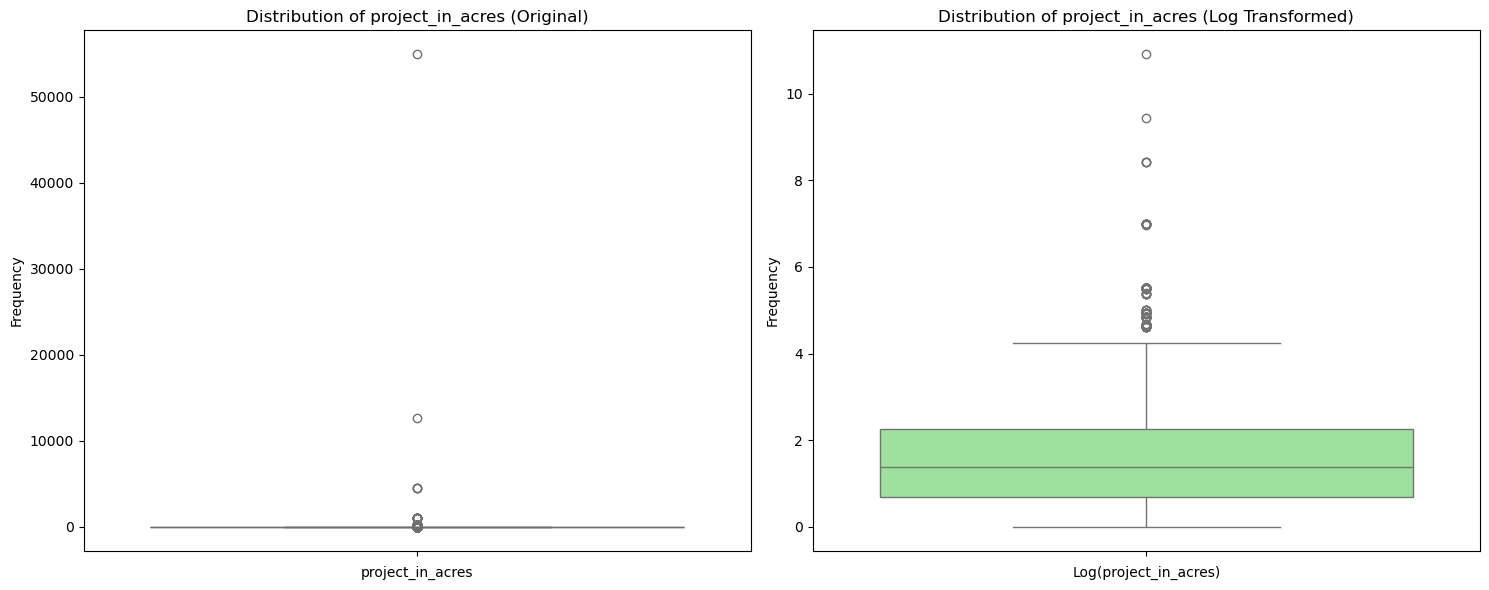

In [275]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['project_in_acres'], color='skyblue')
plt.title('Distribution of project_in_acres (Original)')
plt.xlabel('project_in_acres')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['project_in_acres']), color='lightgreen')
plt.title('Distribution of project_in_acres (Log Transformed)')
plt.xlabel('Log(project_in_acres)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
Box Plot - Log Transformed Data:
- Reduced outlier impact after log transformation.  
- More compact distribution with fewer extreme deviations.  

In [276]:
skewness = np.log1p(df['project_in_acres']).skew()
kurtosis = np.log1p(df['project_in_acres']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.3299878457213872
kurtosis : 2.7972090766944686


### observation 
- Skewness: 1.33, moderately right-skewed.  
- Kurtosis: 2.80, near normal distribution (mesokurtic).  
- Log transformation significantly reduces skewness and tail effects, improving distribution.  

# flooring_cluster

In [277]:
df['flooring_cluster'].head()

0    3
1    0
2    1
3    3
4    3
Name: flooring_cluster, dtype: object

In [278]:
df['flooring_cluster'].value_counts()

flooring_cluster
3    4545
1    4445
2    2009
0     463
4     428
Name: count, dtype: int64

In [279]:
df['flooring_cluster'].isna().sum()

0

In [280]:
df[df['flooring_cluster'] == 0].shape

(0, 49)

<Axes: xlabel='flooring_cluster'>

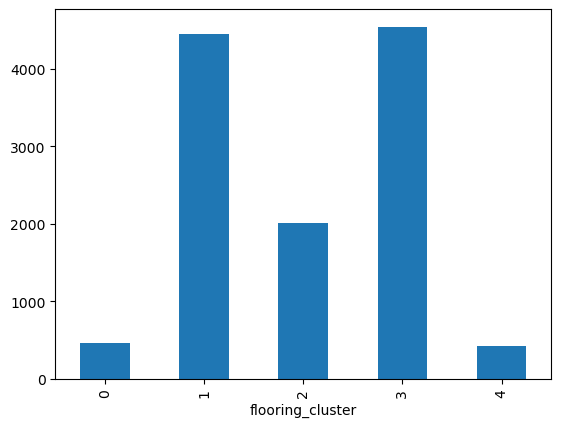

In [281]:
df['flooring_cluster'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

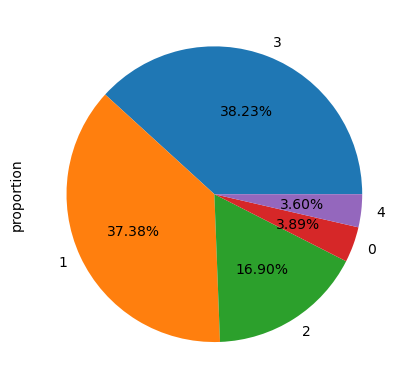

In [282]:
df['flooring_cluster'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [283]:
df['flooring_cluster'].value_counts(normalize=True).cumsum()

flooring_cluster
3    0.382254
1    0.756098
2    0.925063
0    0.964003
4    1.000000
Name: proportion, dtype: float64

### observation 
- The flooring cluster indicates the types of flooring used in a room. The types of flooring include: ['ceramic tiles', 'granite', 'marble', 'marbonite', 'mosaic', 'normal tiles/kotah stone', 'unknown', 'vitrified', 'wooden'].   
- A value of 1 (38.60%) means it can represent either a single flooring type or a combination of several types from the list. For example, flooring_cluster = 1 could mean just 'ceramic tiles' or a mix like ['ceramic tiles', 'granite']. The same applies to values 2 and 3, as the grouping was done during data cleaning.

# flooring_score

In [284]:
df['assigned_flooring_score'].head()

0     7.0
1    21.0
2     NaN
3     7.0
4     7.0
Name: assigned_flooring_score, dtype: float64

In [285]:
df['assigned_flooring_score'].value_counts()

assigned_flooring_score
7.0     3679
10.0     698
6.0      329
15.0     279
17.0     257
16.0     227
13.0     212
26.0     170
25.0     143
56.0     134
18.0     114
22.0     107
4.0       94
9.0       79
23.0      74
8.0       66
19.0      63
32.0      62
27.0      60
21.0      60
24.0      50
11.0      46
30.0      45
34.0      40
40.0      39
48.0      39
29.0      36
31.0      31
44.0      31
52.0      30
33.0      28
14.0      24
20.0      20
36.0      14
38.0      11
41.0       9
42.0       8
28.0       7
12.0       5
37.0       4
39.0       4
43.0       4
45.0       4
46.0       3
35.0       3
49.0       3
Name: count, dtype: int64

In [286]:
df['assigned_flooring_score'].value_counts(normalize=True).cumsum()

assigned_flooring_score
7.0     0.494157
10.0    0.587911
6.0     0.632102
15.0    0.669577
17.0    0.704097
16.0    0.734587
13.0    0.763062
26.0    0.785897
25.0    0.805104
56.0    0.823103
18.0    0.838415
22.0    0.852787
4.0     0.865413
9.0     0.876024
23.0    0.885964
8.0     0.894829
19.0    0.903291
32.0    0.911619
27.0    0.919678
21.0    0.927737
24.0    0.934453
11.0    0.940631
30.0    0.946676
34.0    0.952048
40.0    0.957287
48.0    0.962525
29.0    0.967361
31.0    0.971525
44.0    0.975688
52.0    0.979718
33.0    0.983479
14.0    0.986702
20.0    0.989389
36.0    0.991269
38.0    0.992747
41.0    0.993956
42.0    0.995030
28.0    0.995970
12.0    0.996642
37.0    0.997179
39.0    0.997717
43.0    0.998254
45.0    0.998791
46.0    0.999194
35.0    0.999597
49.0    1.000000
Name: proportion, dtype: float64

In [287]:
df['assigned_flooring_score'].isna().sum()

4445

In [288]:
df['assigned_flooring_score'].describe()

count    7445.000000
mean       12.934587
std        10.365403
min         4.000000
25%         7.000000
50%         7.000000
75%        16.000000
max        56.000000
Name: assigned_flooring_score, dtype: float64

### observation 
- work on the flooring column again this time define the weightage for each flooring type
- A lower flooring score indicates fewer and less expensive flooring, while a higher score suggests variety of flooring, potentially at a higher cost.
- 4453 missing values
- Average weightage is 12.93.
- High variability (10.36).
- Outlier at 56.
- flooring score ranges from 4 to 56
- 90% of the data have flooring score is this 4,6,7,8,9,10,13,15,,16,17,18,19,22,23,25,26,56

<Axes: xlabel='assigned_flooring_score', ylabel='Count'>

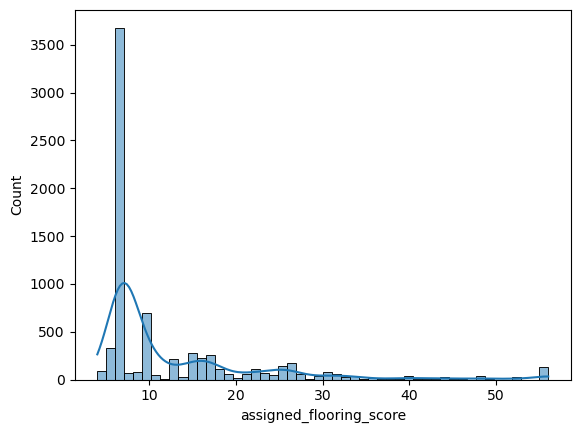

In [289]:
sns.histplot(df['assigned_flooring_score'],kde=True,bins=50)

### observation
- The flooring scores are highly skewed, with most values concentrated around 7.
- Significant peaks at 7 reflect the popular flooring choices (e.g. vitrified). 
- A few higher scores (above 20) indicate outliers.

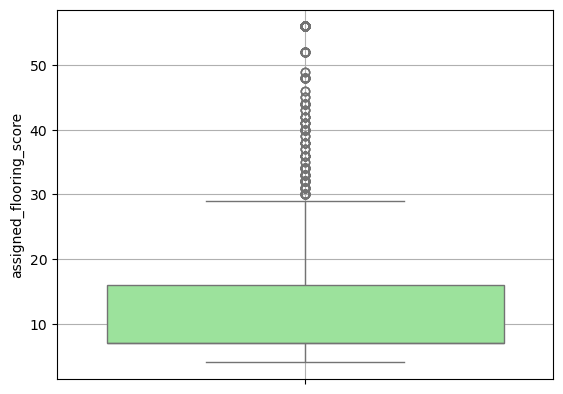

In [290]:
sns.boxplot(df['assigned_flooring_score'],color='lightgreen')
plt.grid()

### observation
- Flooring score is centered at 7
- Most data falls between 6 and 10, indicating these are the most common scores.
- A significant number of outliers exist above the upper whisker, with the maximum value reaching 56.
- The presence of many outliers suggests a right-skewed distribution.

In [291]:
#skewness and kurtosis
skewness = df['assigned_flooring_score'].skew()
kurtosis = df['assigned_flooring_score'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 2.293828210982139
kurtosis : 5.487333729612933


### observation 
- Skewness (2.29): Indicates a highly positively skewed distribution with a long right tail.  
- Kurtosis (5.48): Suggests a leptokurtic distribution with heavy tails and a sharp peak.  
- Data is concentrated on the left with extreme values in the right tail.

In [292]:
# Drop NaN values from the column
cleaned_data_assigned_flooring_score = df['assigned_flooring_score'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_assigned_flooring_score, 25)
Q3 = np.percentile(cleaned_data_assigned_flooring_score, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 7.0
Q3 (75th percentile): 16.0
IQR: 9.0
Lower Whisker: -6.5
Upper Whisker: 29.5


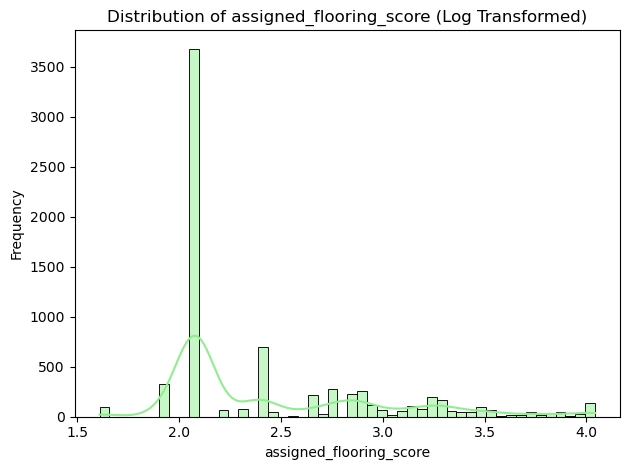

In [293]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['assigned_flooring_score']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of assigned_flooring_score (Log Transformed)')
plt.xlabel('assigned_flooring_score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
- The logarithmic transformation has effectively compressed the data range, reducing the impact of extreme values.
- The distribution is still skewed to the right but appears more normalized compared to the original data.

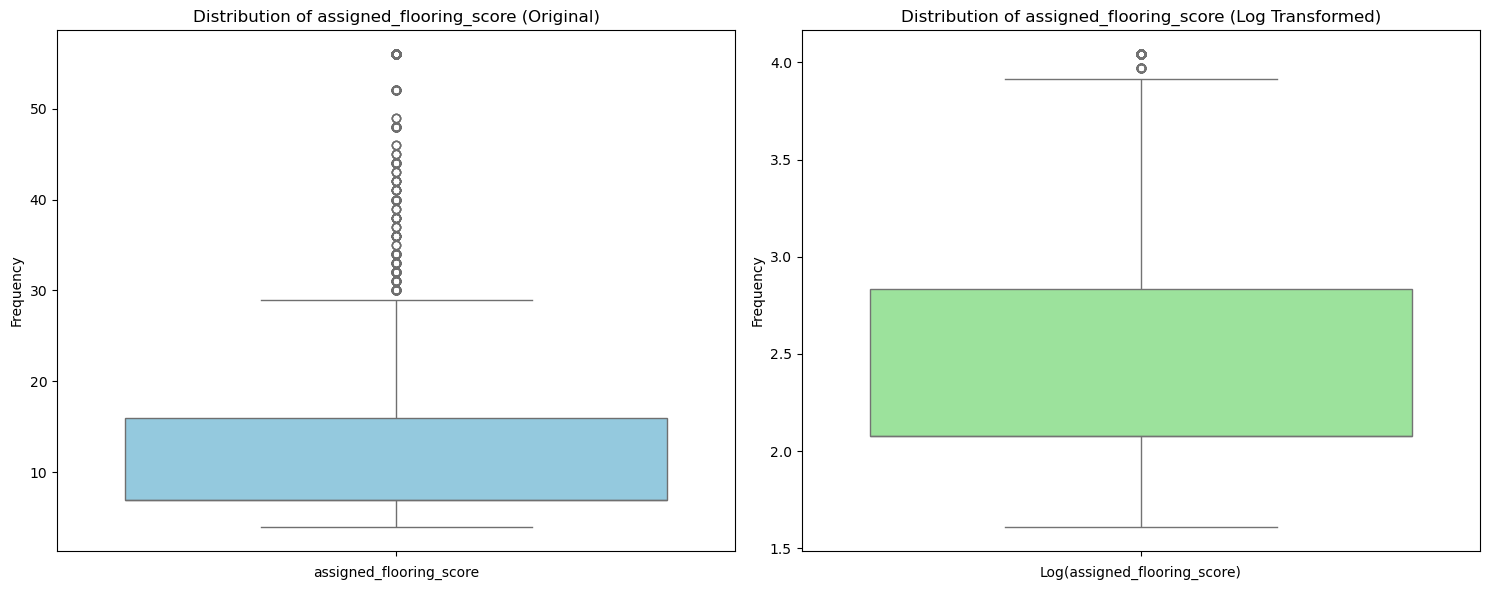

In [294]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['assigned_flooring_score'], color='skyblue')
plt.title('Distribution of assigned_flooring_score (Original)')
plt.xlabel('assigned_flooring_score')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['assigned_flooring_score']), color='lightgreen')
plt.title('Distribution of assigned_flooring_score (Log Transformed)')
plt.xlabel('Log(assigned_flooring_score)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation  
Log-Transformed Distribution:
- After applying a logarithmic transformation, the data distribution appears more normalized and symmetric.
- The transformation reduces the effect of outliers, as they are now within a more acceptable range.
- The spread of the data is more balanced compared to the original distribution.

In [295]:
skewness = np.log1p(df['assigned_flooring_score']).skew()
kurtosis = np.log1p(df['assigned_flooring_score']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.159002455071885
kurtosis : 0.3955217985234696


### observation 
- Skewness reduced to 1.16, indicating moderate positive skewness remains.
- Kurtosis decreased to 0.40, showing reduced outliers and a more normal-like distribution.
- Log transformation effectively brought the data closer to normality but slight skewness persists.

In [296]:
df.groupby("flooring_cluster")["assigned_flooring_score"].mean()

flooring_cluster
0    21.509719
1          NaN
2    13.735192
3     8.748735
4    44.350467
Name: assigned_flooring_score, dtype: float64

<Axes: xlabel='flooring_cluster', ylabel='assigned_flooring_score'>

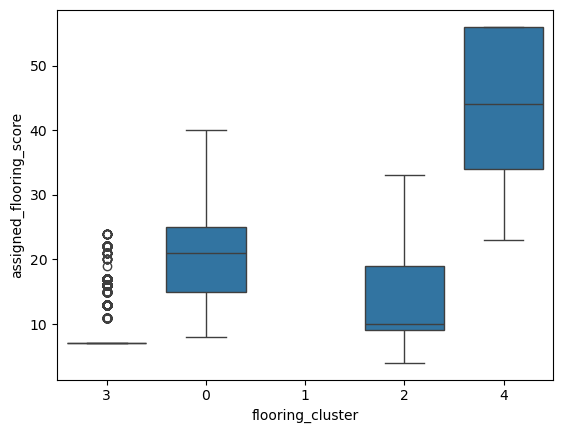

In [297]:
import seaborn as sns  
sns.boxplot(x=df["flooring_cluster"], y=df["assigned_flooring_score"])


### observation 
- Cluster 0 → No flooring (unknown).
- Cluster 1 → Low-scoring flooring, many outliers.
- Cluster 2 → Mid-range flooring, balanced spread.
- Cluster 3 → High-end flooring, wide variance.
- Clear separation → K-Means captured flooring patterns well.ll.

# assigned_amenities_score

In [298]:
df['assigned_amenities_score'].head()

0    321.0
1    410.0
2     84.0
3    119.0
4     72.0
Name: assigned_amenities_score, dtype: float64

In [299]:
df['assigned_amenities_score'].value_counts()

assigned_amenities_score
88.0     123
282.0    112
271.0    112
100.0    104
60.0     100
70.0      94
216.0     84
76.0      80
59.0      78
119.0     75
62.0      75
298.0     74
81.0      71
101.0     69
182.0     68
313.0     65
63.0      62
90.0      62
71.0      61
68.0      61
58.0      59
321.0     59
83.0      58
362.0     57
181.0     56
61.0      52
444.0     51
107.0     51
78.0      49
207.0     48
69.0      47
49.0      46
92.0      45
66.0      44
77.0      44
110.0     44
109.0     44
23.0      43
72.0      43
137.0     43
136.0     43
105.0     42
112.0     42
46.0      40
51.0      40
86.0      39
39.0      39
121.0     39
122.0     39
236.0     39
37.0      38
74.0      37
140.0     36
87.0      36
128.0     35
302.0     35
38.0      35
102.0     34
148.0     34
26.0      33
44.0      33
30.0      33
31.0      32
85.0      32
143.0     32
149.0     32
64.0      32
141.0     32
146.0     32
111.0     32
56.0      32
376.0     32
231.0     31
153.0     31
250.0     31


In [300]:
df['assigned_amenities_score'].isna().sum()

5100

In [301]:
df[df['assigned_amenities_score'] == 0].shape

(0, 49)

In [302]:
df['assigned_amenities_score'].describe()

count    6790.000000
mean      145.907953
std       100.527027
min         5.000000
25%        70.000000
50%       113.000000
75%       207.000000
max       635.000000
Name: assigned_amenities_score, dtype: float64


### Observations:
- 5108 missing vaelu
- A lower amenities score indicates fewer and less expensive amenities, while a higher score suggests more amenities, potentially at a lower cost.es.
- The mean (145.91) is higher than the median (113), indicating a right-skewed distribution.
- High variability with a standard deviation of 100.52.
- The maximum score is much higher than the 75th percentile, indicating the presence of outliers in the data.
- Amenities scores range from 5 er cost.

<Axes: xlabel='assigned_amenities_score', ylabel='Count'>

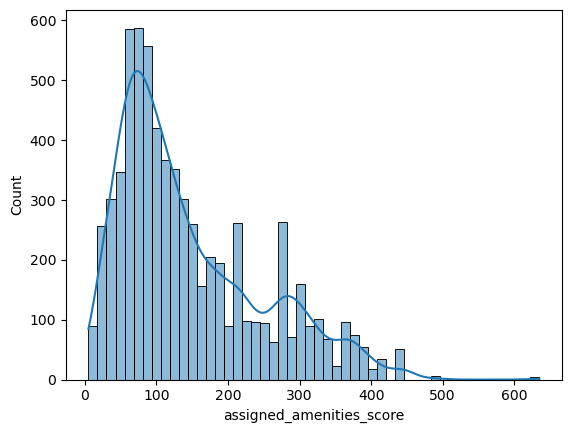

In [303]:
sns.histplot(df['assigned_amenities_score'],kde=True,bins=50)

### Observations:
- The histogram confirms a right-skewed distribution, with most values concentrated at lower scores.
- The highest frequency is observed around 50–100 amenities score.
- Sparse values are seen beyond 400, indicating potential outliers.
- The Kernel Density Estimate (KDE) aligns with the histogram, further highlighting the skewness and the presence of a long tail.

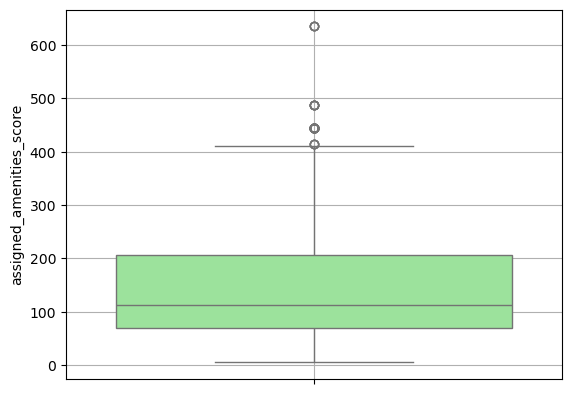

In [304]:
sns.boxplot(df['assigned_amenities_score'],color='lightgreen')
plt.grid()

### Observations:
- IQR ranges from 70 (25th percentile) to 207 (75th percentile).
- The median (113) is closer to the lower quartile, indicating skewness.
- Outliers above 400.
- Whiskers extend from 5 to just above 400.

In [305]:
#skewness and kurtosis
skewness = df['assigned_amenities_score'].skew()
kurtosis = df['assigned_amenities_score'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.0123661620400723
kurtosis : 0.3490607364350189


### observation 
- Skewness 1.01, indicating a moderately right-skewed distribution.  
- Kurtosis 0.35, suggesting the distribution is light-tailed compared to a normal distribution.  

In [306]:
# Drop NaN values from the column
cleaned_data_assigned_amenities_score = df['assigned_amenities_score'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_assigned_amenities_score, 25)
Q3 = np.percentile(cleaned_data_assigned_amenities_score, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 70.0
Q3 (75th percentile): 207.0
IQR: 137.0
Lower Whisker: -135.5
Upper Whisker: 412.5


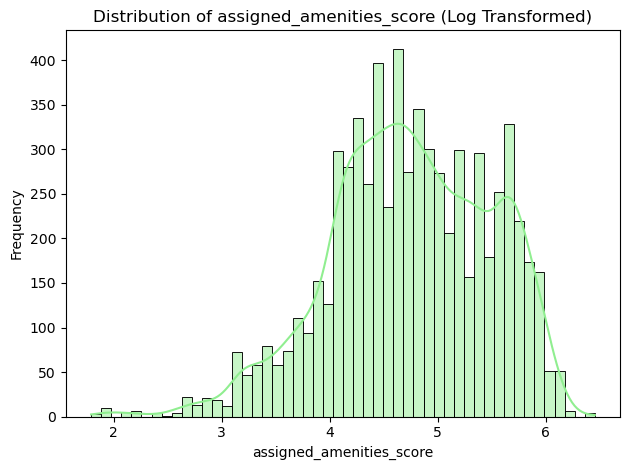

In [307]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['assigned_amenities_score']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of assigned_amenities_score (Log Transformed)')
plt.xlabel('assigned_amenities_score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation 
- The distribution is approximately normal, with a peak (highest frequency) around a score of 5.  
- There is a left skew, indicating some lower scores are less frequent.  
- The data appears smoothed using a kernel density estimation curve, matching the general shape of the histogram.  

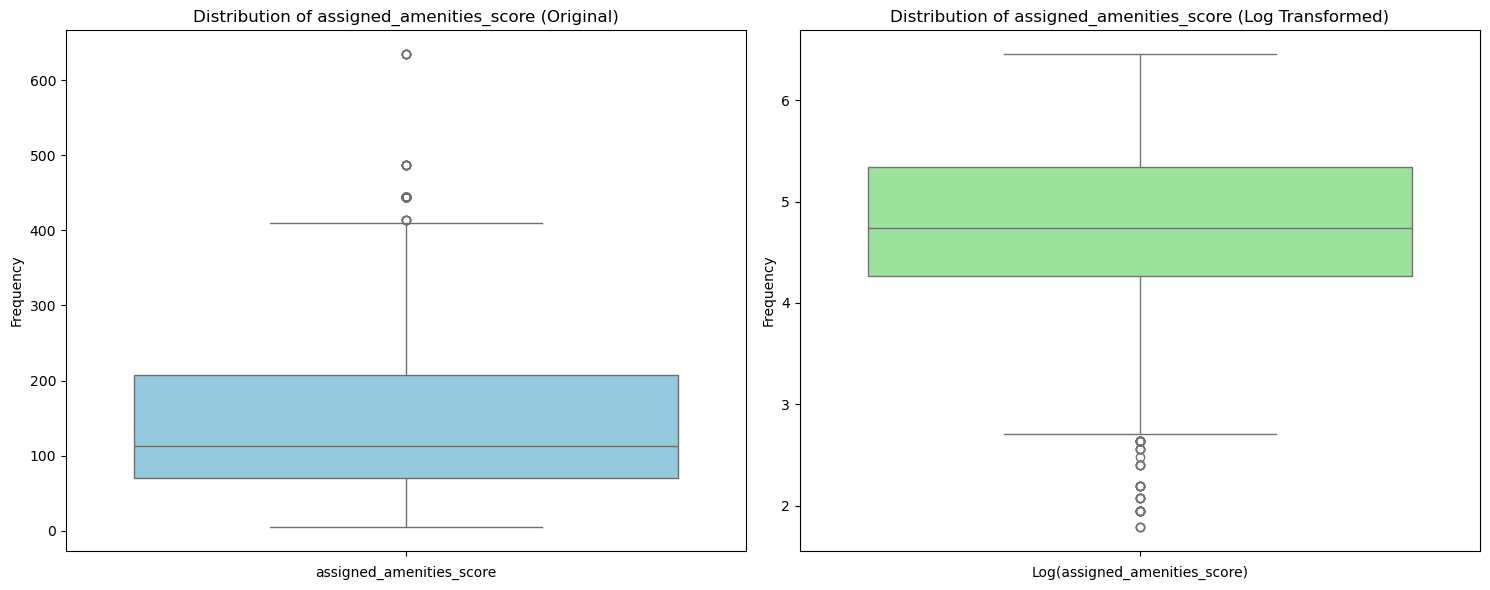

In [308]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['assigned_amenities_score'], color='skyblue')
plt.title('Distribution of assigned_amenities_score (Original)')
plt.xlabel('assigned_amenities_score')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['assigned_amenities_score']), color='lightgreen')
plt.title('Distribution of assigned_amenities_score (Log Transformed)')
plt.xlabel('Log(assigned_amenities_score)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation

- Original Data (Left) The "assigned_amenities_score" has a right-skewed distribution with several outliers above the upper whisker.  
- Log-Transformed Data (Right) The log transformation reduces skewness, making the distribution more symmetric and minimizing the impact of outliers.

In [309]:
skewness = np.log1p(df['assigned_amenities_score']).skew()
kurtosis = np.log1p(df['assigned_amenities_score']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -0.40344003664360284
kurtosis : 0.04390468424413996


### observation
- Skewness (-0.403): The log-transformed data is slightly left-skewed but close to symmetric (a perfectly symmetric distribution has a skewness of 0).    
- Kurtosis (0.044): The distribution has a kurtosis close to 0, indicating it is similar to a normal distribution in terms of tail behavior and peakedness.  

# education 

In [310]:
df['education'].head(10)

0                                                                                                                                                  anmol vidya mandir(2.3 km), little flower high school(1.2 km), vasant vihar high school(2.0 km)
1    institute for technology & management(3.6 km), national institute of fashion technology (nift)(4.0 km), convent of jesus & mary high school & junior college(1.1 km), dav international school(3.7 km), the gokhale education society(2.8 km)
2                                                                                                        somiaya vidyavihar(20.3 km), universal high school(1.3 km), ryan international school(7.7 km), lexicon global school dahisar east(0.8 km)
3                                                                                                                                                                                                                                              NaN
4                           

### observation 
- Extract the list of distances for each property and then apply log1p (the logarithm of 1 + value) to the distances and then calculate the average

In [311]:
# Function to extract numerical values before 'km'
def extract_km_values(row):
    if pd.isnull(row):
        return None
    return [float(val) for val in re.findall(r'(\d+\.\d+)\s*km', row)]

# Function to compute log1p of distances and then take the average
def log1p_and_average(distances):
    if distances is None or len(distances) == 0:
        return None
    log1p_distances = [np.log1p(d) for d in distances]
    return np.mean(log1p_distances)

# Apply the function to extract km values and calculate the log1p and average
df['education_extracted_km'] = df['education'].apply(extract_km_values)
df['education_log1p_avg_km'] = df['education_extracted_km'].apply(log1p_and_average)

In [312]:
df['education_extracted_km'].head(20)

0               [2.3, 1.2, 2.0]
1     [3.6, 4.0, 1.1, 3.7, 2.8]
2         [20.3, 1.3, 7.7, 0.8]
3                          None
4     [2.8, 3.4, 1.3, 1.6, 1.2]
5          [3.3, 7.5, 5.7, 4.9]
6     [1.1, 2.0, 2.0, 1.5, 1.1]
7                 [121.5, 11.2]
8          [2.1, 1.6, 0.5, 1.7]
9     [8.7, 8.5, 0.7, 0.6, 0.9]
10    [3.6, 4.0, 1.1, 3.7, 2.8]
11                         None
12                   [0.4, 9.8]
13    [7.6, 2.8, 3.1, 3.0, 3.0]
14    [8.7, 8.5, 0.7, 0.6, 0.9]
15    [7.6, 8.0, 1.2, 1.0, 2.2]
16                   [0.4, 0.8]
17    [1.1, 2.0, 2.0, 1.5, 1.1]
18    [1.1, 2.0, 2.0, 1.5, 1.1]
19        [20.3, 1.3, 7.7, 0.8]
Name: education_extracted_km, dtype: object

In [313]:
df['education_log1p_avg_km'].head(20) 

0     1.026997
1     1.351999
2     1.660681
3          NaN
4     1.078697
5     1.818935
6     0.919478
7     3.654773
8     0.871408
9     1.233181
10    1.351999
11         NaN
12    1.358009
13    1.534068
14    1.233181
15    1.398748
16    0.462129
17    0.919478
18    0.919478
19    1.660681
Name: education_log1p_avg_km, dtype: float64

In [314]:
df['education_log1p_avg_km'].isna().sum()

4258

In [315]:
df['education_log1p_avg_km'].describe()

count    7632.000000
mean        1.371866
std         0.685845
min         0.095310
25%         0.948999
50%         1.272373
75%         1.627988
max         5.811251
Name: education_log1p_avg_km, dtype: float64

In [316]:
df[df['education_log1p_avg_km'] <= 0.5].shape

(159, 51)

In [317]:
df[df['education_log1p_avg_km'] < 1].shape

(2489, 51)

### observation 
- There are 4,266 missing values.
- A value close to 0 indicates that the school or college is near the flat, while a higher value means it is farther away from the flat.
- 0.69, showing moderate variability

<Axes: xlabel='education_log1p_avg_km', ylabel='Count'>

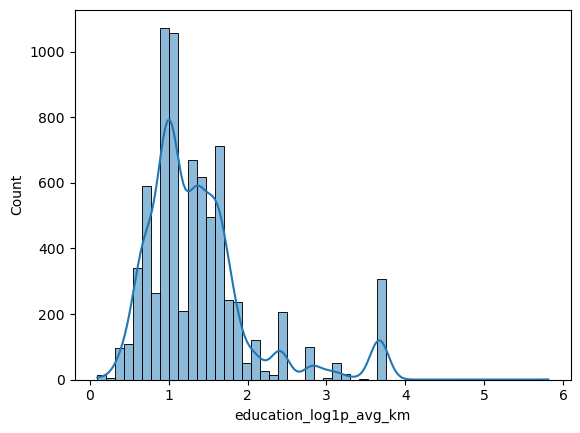

In [318]:
sns.histplot(df['education_log1p_avg_km'],kde=True,bins=50)

### observation 
- histogram confirms a right-skewed distribution, with most values concentrated at lower log1p distances. 
- The highest frequency is observed around 1.0–1.5 education_log1p_avg_km, indicating that most distances fall within this range
- Sparse values are seen beyond 3.0 education_log1p_avg_km, suggesting potential outliers

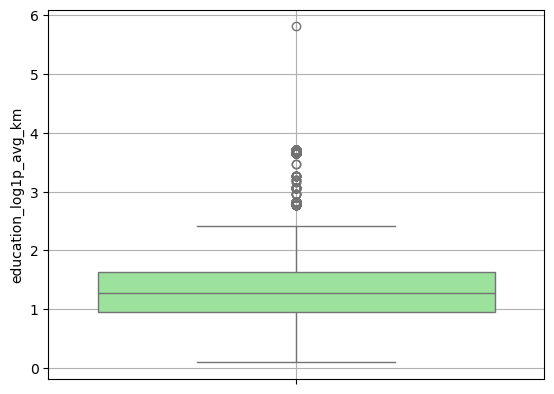

In [319]:
sns.boxplot(df['education_log1p_avg_km'],color='lightgreen')
plt.grid()

### observation 
- IQR ranges from 0.95 (25th percentile) to 1.63 (75th percentile).
- Outliers are present above 2.6 education_log1p_avg_km.

In [320]:
#skewness and kurtosis
skewness = df['education_log1p_avg_km'].skew()
kurtosis = df['education_log1p_avg_km'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.7197550903673062
kurtosis : 3.46837884542307


### observation 
- Skewness: 1.72, indicating a right-skewed distribution.
- 
Kurtosis: 3.47, suggesting thleptokurtic e distribution has heavier tails and is more peaked compared to a normal distribution.

In [321]:
# Drop NaN values from the column
cleaned_data_education_log1p_avg_km = df['education_log1p_avg_km'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_education_log1p_avg_km, 25)
Q3 = np.percentile(cleaned_data_education_log1p_avg_km, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 0.9489986687761693
Q3 (75th percentile): 1.6279875999025457
IQR: 0.6789889311263764
Lower Whisker: -0.06948472791339522
Upper Whisker: 2.64647099659211


# transport

In [322]:
df['transport'].head()

0                                                                           thane railway station(3.0 km), upcoming kasarvadavali metro station(7.1 km)
1    pethpada metro station(1.9 km), raghunath metro station(2.9 km), sector 14(4.4 km), nearest- kharghar railway station(2.3 km), shilp chowk(2.3 km)
2                  various stations on the chembur-sant gadge maharaj monorail network(30.4 km), dahisar check naka(0.2 km), dahisar check naka(0.2 km)
3                                                                                                                                                   NaN
4                                                                                                                      mankhurd railway station(1.2 km)
Name: transport, dtype: object

### observation 
- Extract the list of distances for each property and then apply log1p (the logarithm of 1 + value) to the distances and then calculate the average

In [323]:
# Function to extract numerical values before 'km'
def extract_km_values(row):
    if pd.isnull(row):
        return None
    return [float(val) for val in re.findall(r'(\d+\.\d+)\s*km', row)]

# Function to compute log1p of distances and then take the average
def log1p_and_average(distances):
    if distances is None or len(distances) == 0:
        return None
    log1p_distances = [np.log1p(d) for d in distances]
    return np.mean(log1p_distances)

# Apply the function to extract km values and calculate the log1p and average
df['transport_extracted_km'] = df['transport'].apply(extract_km_values)
df['transport_log1p_avg_km'] = df['transport_extracted_km'].apply(log1p_and_average)

In [324]:
df['transport_extracted_km'].head(20)

0                    [3.0, 7.1]
1     [1.9, 2.9, 4.4, 2.3, 2.3]
2              [30.4, 0.2, 0.2]
3                          None
4                         [1.2]
5                         [4.4]
6                    [0.4, 0.5]
7                          None
8                    [4.6, 2.5]
9                    [0.8, 5.9]
10    [1.9, 2.9, 4.4, 2.3, 2.3]
11                        [5.3]
12                  [10.3, 1.7]
13    [3.2, 3.8, 3.8, 3.3, 1.2]
14                   [0.8, 5.9]
15       [10.0, 10.1, 1.4, 0.0]
16                        [0.8]
17                   [0.4, 0.5]
18                   [0.4, 0.5]
19             [30.4, 0.2, 0.2]
Name: transport_extracted_km, dtype: object

In [325]:
df['transport_log1p_avg_km'].head(20) 

0     1.739079
1     1.299986
2     1.270484
3          NaN
4     0.788457
5     1.686399
6     0.370969
7          NaN
8     1.487765
9     1.259654
10    1.299986
11    1.840550
12    1.709027
13    1.363878
14    1.259654
15    1.420077
16    0.587787
17    0.370969
18    0.370969
19    1.270484
Name: transport_log1p_avg_km, dtype: float64

In [326]:
df['transport_log1p_avg_km'].isna().sum()

6252

In [327]:
df['transport_log1p_avg_km'].describe()

count    5638.000000
mean        1.181872
std         0.672602
min         0.000000
25%         0.875469
50%         1.208849
75%         1.420077
max         6.747821
Name: transport_log1p_avg_km, dtype: float64

In [328]:
df[df['transport_log1p_avg_km'] <= 0.5].shape

(933, 53)

In [329]:
df[df['transport_log1p_avg_km'] < 1].shape

(2085, 53)

### observation 
- There are 6260 missing values.
- A value close to 0 indicates that the transport facility is near the flat, while a higher value means it is farther away from the flat.
- 0.67, showing moderate variability

<Axes: xlabel='transport_log1p_avg_km', ylabel='Count'>

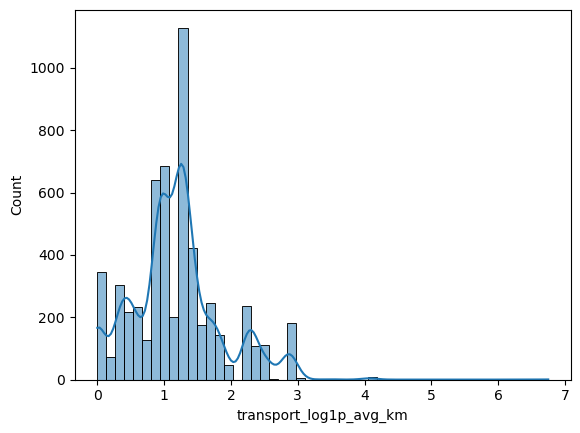

In [330]:
sns.histplot(df['transport_log1p_avg_km'],kde=True,bins=50)

### observation 
- histogram confirms a right-skewed distribution, with most values concentrated at lower log1p distances. 
- The highest frequency is observed around 0.8–1.4 transport_log1p_avg_km, indicating that most distances fall within this range
- Sparse values are seen beyond 2.5 transport_log1p_avg_km, suggesting potential outliers

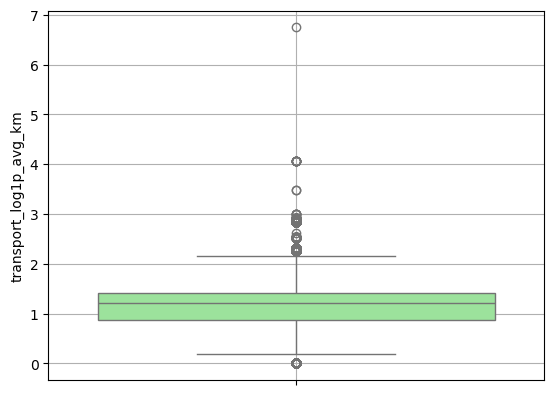

In [331]:
sns.boxplot(df['transport_log1p_avg_km'],color='lightgreen')
plt.grid()

### observation 
- IQR ranges from 0.87 (25th percentile) to 1.42 (75th percentile).
- Outliers are present above 2.23 transport_log1p_avg_km.

In [332]:
#skewness and kurtosis
skewness = df['transport_log1p_avg_km'].skew()
kurtosis = df['transport_log1p_avg_km'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 0.6928957265160498
kurtosis : 1.4402585765139224


### observation 
- Skewness: 0.69, data is slightly skewed to the right
- Kurtosis: 1.44, data has light tails (fewer extreme values).

In [333]:
# Drop NaN values from the column
cleaned_data_transport_log1p_avg_km = df['transport_log1p_avg_km'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_transport_log1p_avg_km, 25)
Q3 = np.percentile(cleaned_data_transport_log1p_avg_km, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)

Q1 (25th percentile): 0.8754687373538999
Q3 (75th percentile): 1.4200772796176397
IQR: 0.5446085422637399
Lower Whisker: 0.05855592395829001
Upper Whisker: 2.2369900930132496


# shopping_centre

In [334]:
df['shopping_centre'].head()

0                    amrapali shopping center(2.1 km), shiv shilpa shopping centre(2.2 km), emerald plaza(2.6 km), kadamba 4vasant vihar(2.1 km)
1    little world mall(4.0 km), zudio(2.3 km), inox glomax mall kharghar(3.9 km), little world mall(3.9 km), seawoods grand central mall(6.5 km)
2                                 thakur mall(0.2 km), thakur mall(0.2 km), thakur mall(0.2 km), orchid ozone mall(25.0 km), star bazaar(1.3 km)
3                                                                                                                                            NaN
4                                                 r odeon mall(3.1 km), phoenix marketcity mall(5.0 km), r city mall(5.0 km), cubic mall(2.3 km)
Name: shopping_centre, dtype: object

### observation 
- Extract the list of distances for each property and then apply log1p (the logarithm of 1 + value) to the distances and then calculate the average

In [335]:
# Function to extract numerical values before 'km'
def extract_km_values(row):
    if pd.isnull(row):
        return None
    return [float(val) for val in re.findall(r'(\d+\.\d+)\s*km', row)]

# Function to compute log1p of distances and then take the average
def log1p_and_average(distances):
    if distances is None or len(distances) == 0:
        return None
    log1p_distances = [np.log1p(d) for d in distances]
    return np.mean(log1p_distances)

# Apply the function to extract km values and calculate the log1p and average
df['shopping_centre_extracted_km'] = df['shopping_centre'].apply(extract_km_values)
df['shopping_centre_log1p_avg_km'] = df['shopping_centre_extracted_km'].apply(log1p_and_average)

In [336]:
df['shopping_centre_extracted_km'].head(20)

0            [2.1, 2.2, 2.6, 2.1]
1       [4.0, 2.3, 3.9, 3.9, 6.5]
2      [0.2, 0.2, 0.2, 25.0, 1.3]
3                            None
4            [3.1, 5.0, 5.0, 2.3]
5                [11.4, 6.3, 4.4]
6      [2.4, 0.4, 0.5, 0.5, 11.0]
7     [5.4, 1.9, 13.7, 11.2, 2.5]
8                           [3.9]
9                 [0.6, 0.6, 0.2]
10      [4.0, 2.3, 3.9, 3.9, 6.5]
11                     [2.7, 4.4]
12                     [7.9, 0.9]
13     [7.3, 6.6, 12.0, 7.3, 6.6]
14                [0.6, 0.6, 0.2]
15      [7.8, 0.0, 1.3, 0.9, 1.3]
16                [2.8, 4.0, 0.6]
17     [2.4, 0.4, 0.5, 0.5, 11.0]
18     [2.4, 0.4, 0.5, 0.5, 11.0]
19     [0.2, 0.2, 0.2, 25.0, 1.3]
Name: shopping_centre_extracted_km, dtype: object

In [337]:
df['shopping_centre_log1p_avg_km'].head(20) 

0     1.176722
1     1.599347
2     0.927594
3          NaN
4     1.547107
5     2.063990
6     0.971217
7     1.872611
8     1.589235
9     0.374110
10    1.599347
11    1.497366
12    1.413953
13    2.170751
14    0.374110
15    0.896485
16    1.138148
17    0.971217
18    0.971217
19    0.927594
Name: shopping_centre_log1p_avg_km, dtype: float64

In [338]:
df['shopping_centre_log1p_avg_km'].isna().sum()

3879

In [339]:
df['shopping_centre_log1p_avg_km'].describe()

count    8011.000000
mean        1.151818
std         0.529761
min         0.095310
25%         0.791697
50%         0.973335
75%         1.551802
max         3.645450
Name: shopping_centre_log1p_avg_km, dtype: float64

In [340]:
df[df['shopping_centre_log1p_avg_km'] <= 0.5].shape

(706, 55)

In [341]:
df[df['shopping_centre_log1p_avg_km'] < 1].shape

(4170, 55)

### observation 
- There are 3887 missing values.
- A value close to 0 indicates that the shopping centre is near the flat, while a higher value means it is farther away from the flat.
- 0.52, showing moderate variability

<Axes: xlabel='shopping_centre_log1p_avg_km', ylabel='Count'>

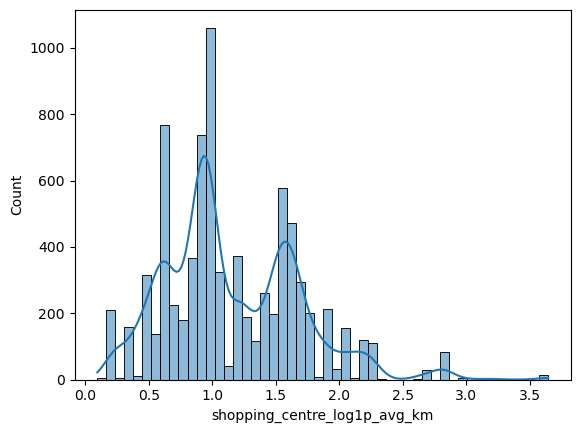

In [342]:
sns.histplot(df['shopping_centre_log1p_avg_km'],kde=True,bins=50)

### observation 
- histogram confirms a right-skewed distribution, with most values concentrated at lower log1p distances. 
- The highest frequency is observed around 0.8–1.55 shopping_centre_log1p_avg_km, indicating that most distances fall within this range
- Sparse values are seen beyond 2.7 shopping_centre_log1p_avg_km, suggesting potential outliers

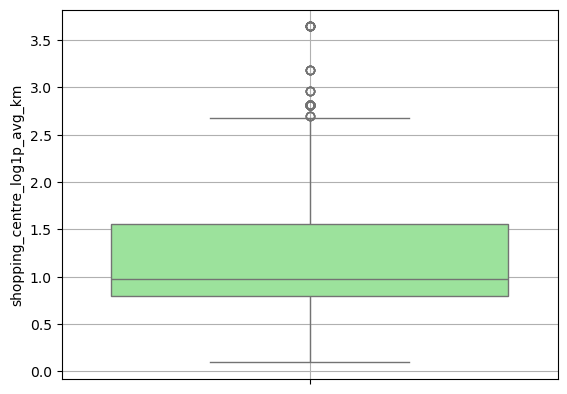

In [343]:
sns.boxplot(df['shopping_centre_log1p_avg_km'],color='lightgreen')
plt.grid()

### observation 
- IQR ranges from 0.8 (25th percentile) to 1.55 (75th percentile).
- The median (0.97) is closer to the lower quartile, indicating right skewness.
- Outliers are present above 2.7 shopping_centre_log1p_avg_km.

In [344]:
#skewness and kurtosis
skewness = df['shopping_centre_log1p_avg_km'].skew()
kurtosis = df['shopping_centre_log1p_avg_km'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 0.7769849533835176
kurtosis : 0.9664570914217978


### observation 
- Skewness: 0.77, indicating a moderate right-skewed distribution.
- Kurtosis: 0.96, suggests that the distribution is slightly more peaked and has heavier tails compared to a normal distribution.

In [345]:
# Drop NaN values from the column
cleaned_data_shopping_centre_log1p_avg_km = df['shopping_centre_log1p_avg_km'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_shopping_centre_log1p_avg_km, 25)
Q3 = np.percentile(cleaned_data_shopping_centre_log1p_avg_km, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 0.7916972612602645
Q3 (75th percentile): 1.5518023074716012
IQR: 0.7601050462113367
Lower Whisker: -0.34846030805674044
Upper Whisker: 2.691959876788606


# commercial_hub

In [346]:
df['commercial_hub'].head(10)

0                                                                                                                                                                    NaN
1                                   reliance corporate park(8.8 km), cidco park sector 20(2.3 km), international infotech park(6.4 km), millennium business park(6.5 km)
2                                                                                                         godrej one(18.6 km), godrej and boyce industry estate(18.4 km)
3                                                                                                                                                                    NaN
4                                                                                                                                                                    NaN
5                                                                                                                raheja arcade(4.8 km), reliance corporate 

### observation 
- Extract the list of distances for each property and then apply log1p (the logarithm of 1 + value) to the distances and then calculate the average

In [347]:
# Function to extract numerical values before 'km'
def extract_km_values(row):
    if pd.isnull(row):
        return None
    return [float(val) for val in re.findall(r'(\d+\.\d+)\s*km', row)]

# Function to compute log1p of distances and then take the average
def log1p_and_average(distances):
    if distances is None or len(distances) == 0:
        return None
    log1p_distances = [np.log1p(d) for d in distances]
    return np.mean(log1p_distances)

# Apply the function to extract km values and calculate the log1p and average
df['commercial_hub_extracted_km'] = df['commercial_hub'].apply(extract_km_values)
df['commercial_hub_log1p_avg_km'] = df['commercial_hub_extracted_km'].apply(log1p_and_average)

In [348]:
df['commercial_hub_extracted_km'].head(20)

0                            None
1            [8.8, 2.3, 6.4, 6.5]
2                    [18.6, 18.4]
3                            None
4                            None
5                     [4.8, 17.6]
6                     [25.9, 7.8]
7      [14.4, 0.8, 1.0, 1.3, 1.3]
8     [1.3, 2.1, 6.0, 12.2, 14.3]
9           [3.1, 13.4, 6.0, 9.2]
10           [8.8, 2.3, 6.4, 6.5]
11             [40.2, 29.5, 25.8]
12          [6.0, 10.5, 7.9, 8.2]
13       [13.0, 12.4, 12.6, 12.6]
14          [3.1, 13.4, 6.0, 9.2]
15      [6.5, 9.5, 9.7, 1.9, 1.5]
16           [0.6, 2.6, 6.4, 1.2]
17                    [25.9, 7.8]
18                    [25.9, 7.8]
19                   [18.6, 18.4]
Name: commercial_hub_extracted_km, dtype: object

In [349]:
df['commercial_hub_log1p_avg_km'].head(20) 

0          NaN
1     1.873172
2     2.970401
3          NaN
4          NaN
5     2.340510
6     2.733439
7     1.136224
8     1.843658
9     2.086628
10    1.873172
11    3.474856
12    2.198378
13    2.613613
14    2.086628
15    1.743505
16    1.135219
17    2.733439
18    2.733439
19    2.970401
Name: commercial_hub_log1p_avg_km, dtype: float64

In [350]:
df['commercial_hub_log1p_avg_km'].isna().sum()

5141

In [351]:
df['commercial_hub_log1p_avg_km'].describe()

count    6749.000000
mean        1.700334
std         0.725190
min         0.095310
25%         1.136224
50%         1.602186
75%         2.067979
max         5.773606
Name: commercial_hub_log1p_avg_km, dtype: float64

In [352]:
df[df['commercial_hub_log1p_avg_km'] <= 0.5].shape

(150, 57)

In [353]:
df[df['commercial_hub_log1p_avg_km'] < 1].shape

(1227, 57)

### observation 
- There are 5149 missing values.
- A value close to 0 indicates that the commercial_hub is near the flat, while a higher value means it is farther away from the flat.
- 0.72, showing moderate variability

<Axes: xlabel='commercial_hub_log1p_avg_km', ylabel='Count'>

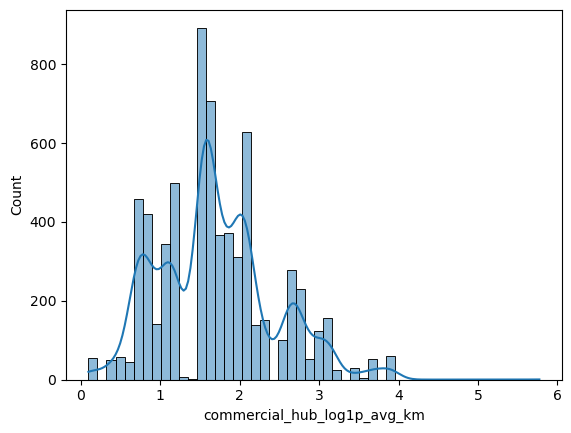

In [354]:
sns.histplot(df['commercial_hub_log1p_avg_km'],kde=True,bins=50)

### observation 
- histogram confirms a right-skewed distribution, with most values concentrated at lower log1p distances. 
- The highest frequency is observed around 1.13–2.0 commercial_hub_log1p_avg_km, indicating that most distances fall within this range
- Sparse values are seen beyond 3.4 commercial_hub_log1p_avg_km, suggesting potential outliers

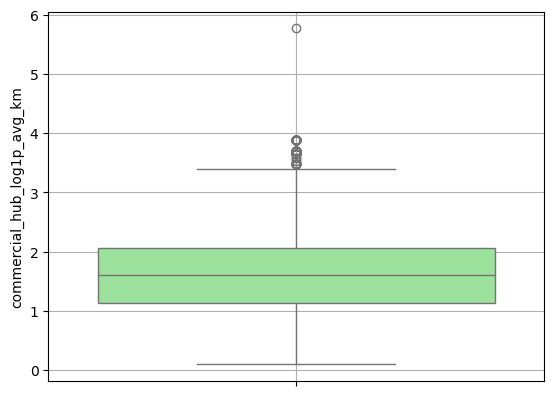

In [355]:
sns.boxplot(df['commercial_hub_log1p_avg_km'],color='lightgreen')
plt.grid()

### observation 
- IQR ranges from 1.13 (25th percentile) to 2.0 (75th percentile).
- Outliers are present above 3.4 commercial_hub_log1p_avg_km.

In [356]:
#skewness and kurtosis
skewness = df['commercial_hub_log1p_avg_km'].skew()
kurtosis = df['commercial_hub_log1p_avg_km'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 0.5082933306306544
kurtosis : 0.23083396985681404


### observation 
- Skewness: 0.50, indicating a moderate right-skewed distribution.
- Kurtosis: 0.23, suggests that the distribution is slightly more peaked and has slightly heavier tails compared to a normal distribution.

In [357]:
# Drop NaN values from the column
cleaned_data_commercial_hub_log1p_avg_km = df['commercial_hub_log1p_avg_km'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_commercial_hub_log1p_avg_km, 25)
Q3 = np.percentile(cleaned_data_commercial_hub_log1p_avg_km, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 1.136223920150371
Q3 (75th percentile): 2.0679794379205374
IQR: 0.9317555177701664
Lower Whisker: -0.26140935650487873
Upper Whisker: 3.465612714575787


# hospital

In [358]:
df['hospital'].head(10)

0                                                                                NaN
1                                                                                NaN
2                                                                                NaN
3                                                                                NaN
4                                                                                NaN
5                                                                    balaji hospital
6                               prachin healthcare multi-speciality hospital(1.3 km)
7    sevenhills hospital(0.7 km), lt hospital(0.9 km), carewell nursing home(2.7 km)
8                                                                                NaN
9                               kamdar nursing home(0.5 km), parakh hospital(0.6 km)
Name: hospital, dtype: object

### observation 
- Extract the list of distances for each property and then apply log1p (the logarithm of 1 + value) to the distances and then calculate the average

In [359]:
# Function to extract numerical values before 'km'
def extract_km_values(row):
    if pd.isnull(row):
        return None
    return [float(val) for val in re.findall(r'(\d+\.\d+)\s*km', row)]

# Function to compute log1p of distances and then take the average
def log1p_and_average(distances):
    if distances is None or len(distances) == 0:
        return None
    log1p_distances = [np.log1p(d) for d in distances]
    return np.mean(log1p_distances)

# Apply the function to extract km values and calculate the log1p and average
df['hospital_extracted_km'] = df['hospital'].apply(extract_km_values)
df['hospital_log1p_avg_km'] = df['hospital_extracted_km'].apply(log1p_and_average)

In [360]:
df['hospital_extracted_km'].head(20)

0                None
1                None
2                None
3                None
4                None
5                  []
6               [1.3]
7     [0.7, 0.9, 2.7]
8                None
9          [0.5, 0.6]
10               None
11              [3.6]
12              [0.7]
13               None
14         [0.5, 0.6]
15               None
16              [1.3]
17              [1.3]
18              [1.3]
19               None
Name: hospital_extracted_km, dtype: object

In [361]:
df['hospital_log1p_avg_km'].head(20) 

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     0.832909
7     0.826938
8          NaN
9     0.437734
10         NaN
11    1.526056
12    0.530628
13         NaN
14    0.437734
15         NaN
16    0.832909
17    0.832909
18    0.832909
19         NaN
Name: hospital_log1p_avg_km, dtype: float64

In [362]:
df['hospital_log1p_avg_km'].isna().sum()

8700

In [363]:
df['hospital_log1p_avg_km'].describe()

count    3190.000000
mean        0.686913
std         0.255861
min         0.150995
25%         0.530628
50%         0.723459
75%         0.832909
max         1.526056
Name: hospital_log1p_avg_km, dtype: float64

In [364]:
df[df['hospital_log1p_avg_km'] <= 0.5].shape

(632, 59)

In [365]:
df[df['hospital_log1p_avg_km'] < 1].shape

(2813, 59)

### observation 
- There are 8708 missing values.
- A value close to 0 indicates that the hospital is near the flat, while a higher value means it is farther away from the flat.
- 0.25, showing moderate variability

<Axes: xlabel='hospital_log1p_avg_km', ylabel='Count'>

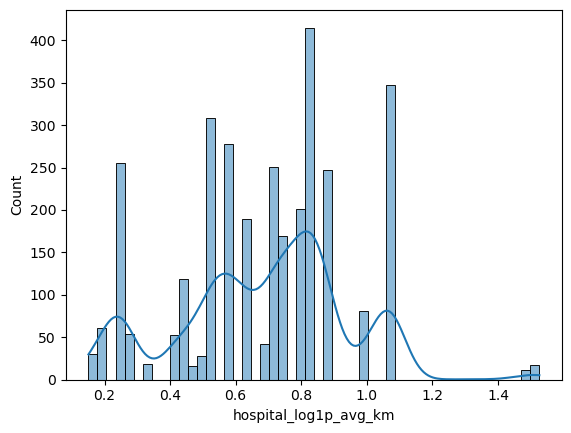

In [366]:
sns.histplot(df['hospital_log1p_avg_km'],kde=True,bins=50)

### observation 
- histogram confirms a right-skewed distribution, with most values concentrated at lower log1p distances. 
- The highest frequency is observed around 0.53–0.83 hospital_log1p_avg_km, indicating that most distances fall within this range
- fewer observations as the values increase beyond 0.8.

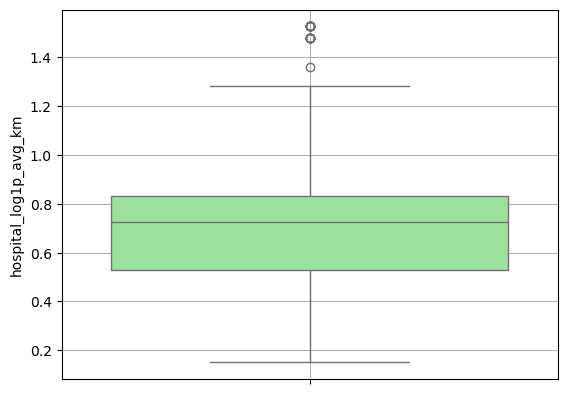

In [367]:
sns.boxplot(df['hospital_log1p_avg_km'],color='lightgreen')
plt.grid()

### observation 
- IQR ranges from 0.53 (25th percentile) to 0.83 (75th percentile).
- Outliers are present above 1.28 hospital_log1p_avg_km.

In [368]:
#skewness and kurtosis
skewness = df['hospital_log1p_avg_km'].skew()
kurtosis = df['hospital_log1p_avg_km'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -0.07550910121009836
kurtosis : 0.011394151235887051


### observation
- Skewness(-0.075): The data is slightly negatively skewed (close to symmetric).  
- Kurtosis(0.011): The data has nearly zero excess kurtosis, indicating a shape close to a normal distribution.

In [369]:
# Drop NaN values from the column
cleaned_data_hospital_log1p_avg_km = df['hospital_log1p_avg_km'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_hospital_log1p_avg_km, 25)
Q3 = np.percentile(cleaned_data_hospital_log1p_avg_km, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 0.5306282510621704
Q3 (75th percentile): 0.832909122935104
IQR: 0.3022808718729336
Lower Whisker: 0.07720694325276994
Upper Whisker: 1.2863304307445045


# tourist

In [370]:
df['tourist'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: tourist, dtype: object

### observation 
- Extract the list of distances for each property and then apply log1p (the logarithm of 1 + value) to the distances and then calculate the average

In [371]:
# Function to extract numerical values before 'km'
def extract_km_values(row):
    if pd.isnull(row):
        return None
    return [float(val) for val in re.findall(r'(\d+\.\d+)\s*km', row)]

# Function to compute log1p of distances and then take the average
def log1p_and_average(distances):
    if distances is None or len(distances) == 0:
        return None
    log1p_distances = [np.log1p(d) for d in distances]
    return np.mean(log1p_distances)

# Apply the function to extract km values and calculate the log1p and average
df['tourist_extracted_km'] = df['tourist'].apply(extract_km_values)
df['tourist_log1p_avg_km'] = df['tourist_extracted_km'].apply(log1p_and_average)

In [372]:
df['tourist_extracted_km'].head(20)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11    [0.8]
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
Name: tourist_extracted_km, dtype: object

In [373]:
df['tourist_log1p_avg_km'].head(20) 

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.587787
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
Name: tourist_log1p_avg_km, dtype: float64

In [374]:
df['tourist_log1p_avg_km'].isna().sum()

10388

In [375]:
df['tourist_log1p_avg_km'].describe()

count    1502.000000
mean        0.696911
std         0.144829
min         0.095310
25%         0.641854
50%         0.720268
75%         0.731628
max         0.916291
Name: tourist_log1p_avg_km, dtype: float64

In [376]:
df[df['tourist_log1p_avg_km'] <= 0.5].shape

(95, 61)

In [377]:
df[df['tourist_log1p_avg_km'] < 1].shape

(1502, 61)

### observation 
- There are 10396 missing values.
- A value close to 0 indicates that the tourist place is near the flat, while a higher value means it is farther away from the flat.
- 0.14, showing moderate variability

<Axes: xlabel='tourist_log1p_avg_km', ylabel='Count'>

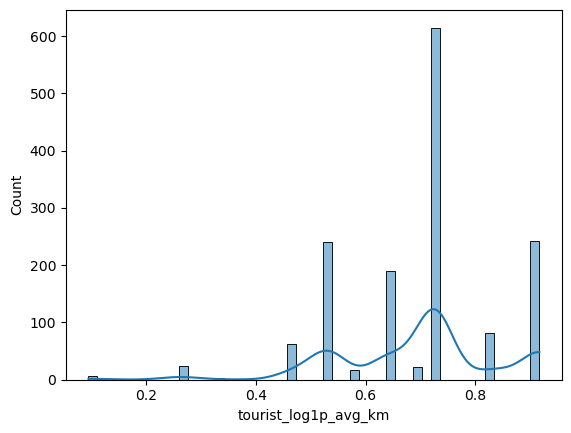

In [378]:
sns.histplot(df['tourist_log1p_avg_km'],kde=True,bins=50)

### observation 
- histogram confirms a left-skewed distribution, with most values concentrated at higher log1p distances. 
- The highest frequency is observed around 0.6–0.7 tourist_log1p_avg_km, indicating that most distances fall within this range

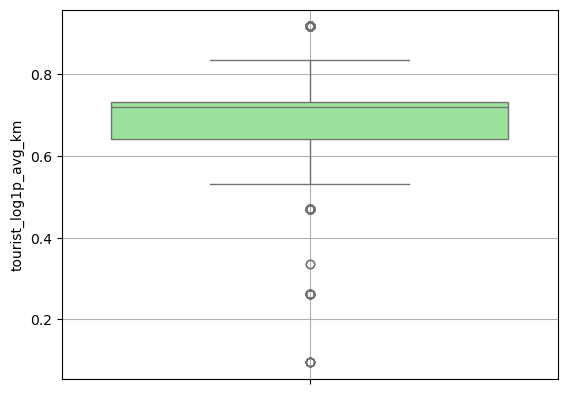

In [379]:
sns.boxplot(df['tourist_log1p_avg_km'],color='lightgreen')
plt.grid()

### observation 
- IQR ranges from 0.64 (25th percentile) to 0.73 (75th percentile).
- The median (0.72) is closer to the upper quartile, indicating left skewness.
- Outliers are present below 0.50 tourist_log1p_avg_km and above 0.86.

In [380]:
#skewness and kurtosis
skewness = df['tourist_log1p_avg_km'].skew()
kurtosis = df['tourist_log1p_avg_km'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -0.5771113339429722
kurtosis : 1.121608114984821


### observation 

- Skewness (-0.577): The data is moderately negatively skewed.  
- Kurtosis(1.121) : The data has positive kurtosis, indicating a slightly heavier-tailed distribution compared to a normal distribution.

In [381]:
# Drop NaN values from the column
cleaned_data_tourist_log1p_avg_km = df['tourist_log1p_avg_km'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_tourist_log1p_avg_km, 25)
Q3 = np.percentile(cleaned_data_tourist_log1p_avg_km, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)

Q1 (25th percentile): 0.6418538861723948
Q3 (75th percentile): 0.7316277011280095
IQR: 0.08977381495561465
Lower Whisker: 0.5071931637389728
Upper Whisker: 0.8662884235614314


In [382]:
df = df.drop(['education','education_extracted_km', 'transport','transport_extracted_km', 'shopping_centre','shopping_centre_extracted_km', 'commercial_hub','commercial_hub_extracted_km', 'hospital','hospital_extracted_km', 'tourist','tourist_extracted_km'],axis=1)

In [383]:
#df.to_csv('mg_eda_univariate_analysis_dataset.csv',index=False)

In [384]:
df.to_excel('univariate_analysis_dataset.xlsx',index=False)